# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)

estado_valvula_co2_1 =  np.array([])
estado_valvula_compost_1 = np.array([])
estado_valvula_co2_2 =  np.array([])
estado_valvula_compost_2 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_3 =  np.array([])
estado_valvula_compost_3 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_4 =  np.array([])
estado_valvula_compost_4 = np.array([])
temp_suncho = np.array([])

temp_suncho = np.array([])

temp_compost_1 = np.array([])
temp_compost_2 = np.array([])
temp_compost_3 = np.array([])
temp_compost_4 = np.array([])

estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = f"./measurements/full-x4"

DATE= f'2022-04-22_08-23-06'

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/{DATE}/figuras"):
    os.makedirs(f"{PATH}/{DATE}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/{DATE}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2_1,Estado_Valvula_Compost_1,Estado_Valvula_CO2_2,Estado_Valvula_Compost_2,Estado_Valvula_CO2_3,Estado_Valvula_Compost_3,Estado_Valvula_CO2_4,Estado_Valvula_Compost_4,Temp_Compost_1,Temp_Compost_2,Temp_Compost_3,Temp_Compost_4,Temp_Suncho,Estado_Suncho
0,22/04/2022_08:23:09,552,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,51.00,44.94,59.56,54.94,42.69,Prendido
1,22/04/2022_08:23:14,551,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,50.94,44.94,59.56,54.88,42.63,Prendido
2,22/04/2022_08:23:20,551,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,50.94,44.94,59.56,54.81,42.63,Prendido
3,22/04/2022_08:23:26,551,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,50.94,44.94,59.56,54.75,42.63,Prendido
4,22/04/2022_08:23:32,552,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,51.00,44.88,59.56,54.75,42.63,Prendido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,22/04/2022_08:32:26,559,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,51.06,44.81,59.63,54.69,42.56,Prendido
96,22/04/2022_08:32:32,558,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,51.00,44.75,59.69,54.56,42.63,Prendido
97,22/04/2022_08:32:38,559,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,51.06,44.75,59.63,54.44,42.56,Prendido
98,22/04/2022_08:32:43,558,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,51.06,44.75,59.63,54.38,42.56,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    print(t)
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)

22/04/2022_08:23:09


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(f'{PATH}/{DATE}'):
    if file.endswith(".csv"):
        n += 1

print(n)

685


In [7]:
# Llenemos las listas con los datos
for i in range(n):
    i=i
    df = pd.read_csv(f"{PATH}/{DATE}/data_{i}.csv")

    # CO2
    
    # Con este loop cambiamos cualquier tipo de error en la medicion de co2 a -1
    co2_column = df["CO2"].to_numpy()
    for i in range(len(co2_column)):
        # Chequeamos que la celda sea un str y que sea mas larga que 4, ya que el sensor solo mide hasta 5000
        if type(co2_column[i]) is str and len(co2_column[i]) > 4:
            co2_column[i] = -1

    co2 = np.concatenate((co2, np.transpose(co2_column)))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost_1 = np.concatenate((temp_compost_1, np.transpose(df["Temp_Compost_1"].to_numpy())))
    temp_compost_2 = np.concatenate((temp_compost_2, np.transpose(df["Temp_Compost_2"].to_numpy())))
    temp_compost_3 = np.concatenate((temp_compost_3, np.transpose(df["Temp_Compost_3"].to_numpy())))
    temp_compost_4 = np.concatenate((temp_compost_4, np.transpose(df["Temp_Compost_4"].to_numpy())))
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([1])))
        else:
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([1])))
        else:
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_CO2_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([1])))
        else:
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([1])))
        else:
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([0])))

    for e in np.transpose(df["Estado_Valvula_CO2_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([1])))
        else:
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([1])))
        else:
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([0])))
       
    for e in np.transpose(df["Estado_Valvula_CO2_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([1])))
        else:
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([1])))
        else:
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([0])))   
    
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

22/04/2022_08:23:09
22/04/2022_08:23:14
22/04/2022_08:23:20
22/04/2022_08:23:26
22/04/2022_08:23:32
22/04/2022_08:23:38
22/04/2022_08:23:44
22/04/2022_08:23:50
22/04/2022_08:23:56
22/04/2022_08:24:01
22/04/2022_08:24:07
22/04/2022_08:24:13
22/04/2022_08:24:19
22/04/2022_08:24:25
22/04/2022_08:24:31
22/04/2022_08:24:37
22/04/2022_08:24:42
22/04/2022_08:24:48
22/04/2022_08:24:54
22/04/2022_08:25:00
22/04/2022_08:25:06
22/04/2022_08:25:12
22/04/2022_08:25:18
22/04/2022_08:25:23
22/04/2022_08:25:29
22/04/2022_08:25:35
22/04/2022_08:25:41
22/04/2022_08:25:47
22/04/2022_08:25:53
22/04/2022_08:25:59
22/04/2022_08:26:05
22/04/2022_08:26:10
22/04/2022_08:26:16
22/04/2022_08:26:22
22/04/2022_08:26:28
22/04/2022_08:26:34
22/04/2022_08:26:40
22/04/2022_08:26:46
22/04/2022_08:26:51
22/04/2022_08:26:57
22/04/2022_08:27:03
22/04/2022_08:27:09
22/04/2022_08:27:15
22/04/2022_08:27:21
22/04/2022_08:27:27
22/04/2022_08:27:33
22/04/2022_08:27:38
22/04/2022_08:27:44
22/04/2022_08:27:50
22/04/2022_08:27:56


22/04/2022_09:15:15
22/04/2022_09:15:21
22/04/2022_09:15:26
22/04/2022_09:15:32
22/04/2022_09:15:38
22/04/2022_09:15:44
22/04/2022_09:15:50
22/04/2022_09:15:56
22/04/2022_09:16:02
22/04/2022_09:16:08
22/04/2022_09:16:13
22/04/2022_09:16:19
22/04/2022_09:16:25
22/04/2022_09:16:31
22/04/2022_09:16:37
22/04/2022_09:16:43
22/04/2022_09:16:49
22/04/2022_09:16:54
22/04/2022_09:17:00
22/04/2022_09:17:06
22/04/2022_09:17:12
22/04/2022_09:17:18
22/04/2022_09:17:24
22/04/2022_09:17:30
22/04/2022_09:17:36
22/04/2022_09:17:41
22/04/2022_09:17:47
22/04/2022_09:17:53
22/04/2022_09:17:59
22/04/2022_09:18:05
22/04/2022_09:18:11
22/04/2022_09:18:17
22/04/2022_09:18:22
22/04/2022_09:18:28
22/04/2022_09:18:34
22/04/2022_09:18:40
22/04/2022_09:18:46
22/04/2022_09:18:52
22/04/2022_09:18:58
22/04/2022_09:19:03
22/04/2022_09:19:09
22/04/2022_09:19:15
22/04/2022_09:19:21
22/04/2022_09:19:27
22/04/2022_09:19:33
22/04/2022_09:19:39
22/04/2022_09:19:45
22/04/2022_09:19:50
22/04/2022_09:19:56
22/04/2022_09:20:02


22/04/2022_10:04:43
22/04/2022_10:04:48
22/04/2022_10:04:54
22/04/2022_10:05:00
22/04/2022_10:05:06
22/04/2022_10:05:12
22/04/2022_10:05:18
22/04/2022_10:05:24
22/04/2022_10:05:30
22/04/2022_10:05:35
22/04/2022_10:05:41
22/04/2022_10:05:47
22/04/2022_10:05:53
22/04/2022_10:05:59
22/04/2022_10:06:05
22/04/2022_10:06:11
22/04/2022_10:06:16
22/04/2022_10:06:22
22/04/2022_10:06:28
22/04/2022_10:06:34
22/04/2022_10:06:40
22/04/2022_10:06:46
22/04/2022_10:06:52
22/04/2022_10:06:58
22/04/2022_10:07:03
22/04/2022_10:07:09
22/04/2022_10:07:15
22/04/2022_10:07:21
22/04/2022_10:07:27
22/04/2022_10:07:33
22/04/2022_10:07:39
22/04/2022_10:07:44
22/04/2022_10:07:50
22/04/2022_10:07:56
22/04/2022_10:08:02
22/04/2022_10:08:08
22/04/2022_10:08:14
22/04/2022_10:08:20
22/04/2022_10:08:25
22/04/2022_10:08:31
22/04/2022_10:08:37
22/04/2022_10:08:43
22/04/2022_10:08:49
22/04/2022_10:08:55
22/04/2022_10:09:01
22/04/2022_10:09:07
22/04/2022_10:09:12
22/04/2022_10:09:18
22/04/2022_10:09:24
22/04/2022_10:09:30


22/04/2022_10:52:54
22/04/2022_10:53:00
22/04/2022_10:53:06
22/04/2022_10:53:12
22/04/2022_10:53:18
22/04/2022_10:53:24
22/04/2022_10:53:30
22/04/2022_10:53:35
22/04/2022_10:53:41
22/04/2022_10:53:47
22/04/2022_10:53:53
22/04/2022_10:53:59
22/04/2022_10:54:05
22/04/2022_10:54:11
22/04/2022_10:54:16
22/04/2022_10:54:22
22/04/2022_10:54:28
22/04/2022_10:54:34
22/04/2022_10:54:40
22/04/2022_10:54:46
22/04/2022_10:54:52
22/04/2022_10:54:58
22/04/2022_10:55:03
22/04/2022_10:55:09
22/04/2022_10:55:15
22/04/2022_10:55:21
22/04/2022_10:55:27
22/04/2022_10:55:33
22/04/2022_10:55:39
22/04/2022_10:55:44
22/04/2022_10:55:50
22/04/2022_10:55:56
22/04/2022_10:56:02
22/04/2022_10:56:08
22/04/2022_10:56:14
22/04/2022_10:56:20
22/04/2022_10:56:26
22/04/2022_10:56:31
22/04/2022_10:56:37
22/04/2022_10:56:43
22/04/2022_10:56:49
22/04/2022_10:56:55
22/04/2022_10:57:01
22/04/2022_10:57:07
22/04/2022_10:57:12
22/04/2022_10:57:18
22/04/2022_10:57:24
22/04/2022_10:57:30
22/04/2022_10:57:36
22/04/2022_10:57:42


22/04/2022_11:45:01
22/04/2022_11:45:07
22/04/2022_11:45:12
22/04/2022_11:45:18
22/04/2022_11:45:24
22/04/2022_11:45:30
22/04/2022_11:45:36
22/04/2022_11:45:42
22/04/2022_11:45:48
22/04/2022_11:45:53
22/04/2022_11:45:59
22/04/2022_11:46:05
22/04/2022_11:46:11
22/04/2022_11:46:17
22/04/2022_11:46:23
22/04/2022_11:46:29
22/04/2022_11:46:35
22/04/2022_11:46:40
22/04/2022_11:46:46
22/04/2022_11:46:52
22/04/2022_11:46:58
22/04/2022_11:47:04
22/04/2022_11:47:10
22/04/2022_11:47:16
22/04/2022_11:47:21
22/04/2022_11:47:27
22/04/2022_11:47:33
22/04/2022_11:47:39
22/04/2022_11:47:45
22/04/2022_11:47:51
22/04/2022_11:47:57
22/04/2022_11:48:02
22/04/2022_11:48:08
22/04/2022_11:48:14
22/04/2022_11:48:20
22/04/2022_11:48:26
22/04/2022_11:48:32
22/04/2022_11:48:38
22/04/2022_11:48:44
22/04/2022_11:48:49
22/04/2022_11:48:55
22/04/2022_11:49:01
22/04/2022_11:49:07
22/04/2022_11:49:13
22/04/2022_11:49:19
22/04/2022_11:49:25
22/04/2022_11:49:30
22/04/2022_11:49:36
22/04/2022_11:49:42
22/04/2022_11:49:48


22/04/2022_12:30:40
22/04/2022_12:30:46
22/04/2022_12:30:52
22/04/2022_12:30:58
22/04/2022_12:31:03
22/04/2022_12:31:09
22/04/2022_12:31:15
22/04/2022_12:31:21
22/04/2022_12:31:27
22/04/2022_12:31:33
22/04/2022_12:31:39
22/04/2022_12:31:44
22/04/2022_12:31:50
22/04/2022_12:31:56
22/04/2022_12:32:02
22/04/2022_12:32:08
22/04/2022_12:32:14
22/04/2022_12:32:20
22/04/2022_12:32:25
22/04/2022_12:32:31
22/04/2022_12:32:37
22/04/2022_12:32:43
22/04/2022_12:32:49
22/04/2022_12:32:55
22/04/2022_12:33:01
22/04/2022_12:33:07
22/04/2022_12:33:12
22/04/2022_12:33:18
22/04/2022_12:33:24
22/04/2022_12:33:30
22/04/2022_12:33:36
22/04/2022_12:33:42
22/04/2022_12:33:48
22/04/2022_12:33:53
22/04/2022_12:33:59
22/04/2022_12:34:05
22/04/2022_12:34:11
22/04/2022_12:34:17
22/04/2022_12:34:23
22/04/2022_12:34:29
22/04/2022_12:34:35
22/04/2022_12:34:40
22/04/2022_12:34:46
22/04/2022_12:34:52
22/04/2022_12:34:58
22/04/2022_12:35:04
22/04/2022_12:35:10
22/04/2022_12:35:16
22/04/2022_12:35:21
22/04/2022_12:35:27


22/04/2022_13:15:03
22/04/2022_13:15:09
22/04/2022_13:15:15
22/04/2022_13:15:20
22/04/2022_13:15:26
22/04/2022_13:15:32
22/04/2022_13:15:38
22/04/2022_13:15:44
22/04/2022_13:15:50
22/04/2022_13:15:56
22/04/2022_13:16:02
22/04/2022_13:16:07
22/04/2022_13:16:13
22/04/2022_13:16:19
22/04/2022_13:16:25
22/04/2022_13:16:31
22/04/2022_13:16:37
22/04/2022_13:16:43
22/04/2022_13:16:48
22/04/2022_13:16:54
22/04/2022_13:17:00
22/04/2022_13:17:06
22/04/2022_13:17:12
22/04/2022_13:17:18
22/04/2022_13:17:24
22/04/2022_13:17:30
22/04/2022_13:17:35
22/04/2022_13:17:41
22/04/2022_13:17:47
22/04/2022_13:17:53
22/04/2022_13:17:59
22/04/2022_13:18:05
22/04/2022_13:18:11
22/04/2022_13:18:16
22/04/2022_13:18:22
22/04/2022_13:18:28
22/04/2022_13:18:34
22/04/2022_13:18:40
22/04/2022_13:18:46
22/04/2022_13:18:52
22/04/2022_13:18:58
22/04/2022_13:19:03
22/04/2022_13:19:09
22/04/2022_13:19:15
22/04/2022_13:19:21
22/04/2022_13:19:27
22/04/2022_13:19:33
22/04/2022_13:19:39
22/04/2022_13:19:44
22/04/2022_13:19:50


22/04/2022_14:01:06
22/04/2022_14:01:11
22/04/2022_14:01:17
22/04/2022_14:01:23
22/04/2022_14:01:29
22/04/2022_14:01:35
22/04/2022_14:01:41
22/04/2022_14:01:47
22/04/2022_14:01:53
22/04/2022_14:01:58
22/04/2022_14:02:04
22/04/2022_14:02:10
22/04/2022_14:02:16
22/04/2022_14:02:22
22/04/2022_14:02:28
22/04/2022_14:02:34
22/04/2022_14:02:39
22/04/2022_14:02:45
22/04/2022_14:02:51
22/04/2022_14:02:57
22/04/2022_14:03:03
22/04/2022_14:03:09
22/04/2022_14:03:15
22/04/2022_14:03:20
22/04/2022_14:03:26
22/04/2022_14:03:32
22/04/2022_14:03:38
22/04/2022_14:03:44
22/04/2022_14:03:50
22/04/2022_14:03:56
22/04/2022_14:04:02
22/04/2022_14:04:07
22/04/2022_14:04:13
22/04/2022_14:04:19
22/04/2022_14:04:25
22/04/2022_14:04:31
22/04/2022_14:04:37
22/04/2022_14:04:43
22/04/2022_14:04:48
22/04/2022_14:04:54
22/04/2022_14:05:00
22/04/2022_14:05:06
22/04/2022_14:05:12
22/04/2022_14:05:18
22/04/2022_14:05:24
22/04/2022_14:05:30
22/04/2022_14:05:35
22/04/2022_14:05:41
22/04/2022_14:05:47
22/04/2022_14:05:53


22/04/2022_14:44:24
22/04/2022_14:44:30
22/04/2022_14:44:36
22/04/2022_14:44:42
22/04/2022_14:44:47
22/04/2022_14:44:53
22/04/2022_14:44:59
22/04/2022_14:45:05
22/04/2022_14:45:11
22/04/2022_14:45:17
22/04/2022_14:45:23
22/04/2022_14:45:29
22/04/2022_14:45:34
22/04/2022_14:45:40
22/04/2022_14:45:46
22/04/2022_14:45:52
22/04/2022_14:45:58
22/04/2022_14:46:04
22/04/2022_14:46:10
22/04/2022_14:46:15
22/04/2022_14:46:21
22/04/2022_14:46:27
22/04/2022_14:46:33
22/04/2022_14:46:39
22/04/2022_14:46:45
22/04/2022_14:46:51
22/04/2022_14:46:57
22/04/2022_14:47:02
22/04/2022_14:47:08
22/04/2022_14:47:14
22/04/2022_14:47:20
22/04/2022_14:47:26
22/04/2022_14:47:32
22/04/2022_14:47:38
22/04/2022_14:47:43
22/04/2022_14:47:49
22/04/2022_14:47:55
22/04/2022_14:48:01
22/04/2022_14:48:07
22/04/2022_14:48:13
22/04/2022_14:48:19
22/04/2022_14:48:25
22/04/2022_14:48:30
22/04/2022_14:48:36
22/04/2022_14:48:42
22/04/2022_14:48:48
22/04/2022_14:48:54
22/04/2022_14:49:00
22/04/2022_14:49:06
22/04/2022_14:49:11


22/04/2022_15:33:17
22/04/2022_15:33:23
22/04/2022_15:33:29
22/04/2022_15:33:34
22/04/2022_15:33:40
22/04/2022_15:33:46
22/04/2022_15:33:52
22/04/2022_15:33:58
22/04/2022_15:34:04
22/04/2022_15:34:10
22/04/2022_15:34:15
22/04/2022_15:34:21
22/04/2022_15:34:27
22/04/2022_15:34:33
22/04/2022_15:34:39
22/04/2022_15:34:45
22/04/2022_15:34:51
22/04/2022_15:34:57
22/04/2022_15:35:02
22/04/2022_15:35:08
22/04/2022_15:35:14
22/04/2022_15:35:20
22/04/2022_15:35:26
22/04/2022_15:35:32
22/04/2022_15:35:38
22/04/2022_15:35:43
22/04/2022_15:35:49
22/04/2022_15:35:55
22/04/2022_15:36:01
22/04/2022_15:36:07
22/04/2022_15:36:13
22/04/2022_15:36:19
22/04/2022_15:36:24
22/04/2022_15:36:30
22/04/2022_15:36:36
22/04/2022_15:36:42
22/04/2022_15:36:48
22/04/2022_15:36:54
22/04/2022_15:37:00
22/04/2022_15:37:06
22/04/2022_15:37:11
22/04/2022_15:37:17
22/04/2022_15:37:23
22/04/2022_15:37:29
22/04/2022_15:37:35
22/04/2022_15:37:41
22/04/2022_15:37:47
22/04/2022_15:37:52
22/04/2022_15:37:58
22/04/2022_15:38:04


22/04/2022_16:19:31
22/04/2022_16:19:37
22/04/2022_16:19:42
22/04/2022_16:19:48
22/04/2022_16:19:54
22/04/2022_16:20:00
22/04/2022_16:20:06
22/04/2022_16:20:12
22/04/2022_16:20:18
22/04/2022_16:20:23
22/04/2022_16:20:29
22/04/2022_16:20:35
22/04/2022_16:20:41
22/04/2022_16:20:47
22/04/2022_16:20:53
22/04/2022_16:20:59
22/04/2022_16:21:05
22/04/2022_16:21:10
22/04/2022_16:21:16
22/04/2022_16:21:22
22/04/2022_16:21:28
22/04/2022_16:21:34
22/04/2022_16:21:40
22/04/2022_16:21:46
22/04/2022_16:21:51
22/04/2022_16:21:57
22/04/2022_16:22:03
22/04/2022_16:22:09
22/04/2022_16:22:15
22/04/2022_16:22:21
22/04/2022_16:22:27
22/04/2022_16:22:33
22/04/2022_16:22:38
22/04/2022_16:22:44
22/04/2022_16:22:50
22/04/2022_16:22:56
22/04/2022_16:23:02
22/04/2022_16:23:08
22/04/2022_16:23:14
22/04/2022_16:23:19
22/04/2022_16:23:25
22/04/2022_16:23:31
22/04/2022_16:23:37
22/04/2022_16:23:43
22/04/2022_16:23:49
22/04/2022_16:23:55
22/04/2022_16:24:01
22/04/2022_16:24:06
22/04/2022_16:24:12
22/04/2022_16:24:18


22/04/2022_17:10:27
22/04/2022_17:10:33
22/04/2022_17:10:38
22/04/2022_17:10:44
22/04/2022_17:10:50
22/04/2022_17:10:56
22/04/2022_17:11:02
22/04/2022_17:11:08
22/04/2022_17:11:14
22/04/2022_17:11:19
22/04/2022_17:11:25
22/04/2022_17:11:31
22/04/2022_17:11:37
22/04/2022_17:11:43
22/04/2022_17:11:49
22/04/2022_17:11:55
22/04/2022_17:12:00
22/04/2022_17:12:06
22/04/2022_17:12:12
22/04/2022_17:12:18
22/04/2022_17:12:24
22/04/2022_17:12:30
22/04/2022_17:12:36
22/04/2022_17:12:42
22/04/2022_17:12:47
22/04/2022_17:12:53
22/04/2022_17:12:59
22/04/2022_17:13:05
22/04/2022_17:13:11
22/04/2022_17:13:17
22/04/2022_17:13:23
22/04/2022_17:13:28
22/04/2022_17:13:34
22/04/2022_17:13:40
22/04/2022_17:13:46
22/04/2022_17:13:52
22/04/2022_17:13:58
22/04/2022_17:14:04
22/04/2022_17:14:10
22/04/2022_17:14:15
22/04/2022_17:14:21
22/04/2022_17:14:27
22/04/2022_17:14:33
22/04/2022_17:14:39
22/04/2022_17:14:45
22/04/2022_17:14:51
22/04/2022_17:14:56
22/04/2022_17:15:02
22/04/2022_17:15:08
22/04/2022_17:15:14


22/04/2022_18:09:41
22/04/2022_18:09:46
22/04/2022_18:09:52
22/04/2022_18:09:58
22/04/2022_18:10:04
22/04/2022_18:10:10
22/04/2022_18:10:16
22/04/2022_18:10:22
22/04/2022_18:10:28
22/04/2022_18:10:33
22/04/2022_18:10:39
22/04/2022_18:10:45
22/04/2022_18:10:51
22/04/2022_18:10:57
22/04/2022_18:11:03
22/04/2022_18:11:09
22/04/2022_18:11:14
22/04/2022_18:11:20
22/04/2022_18:11:26
22/04/2022_18:11:32
22/04/2022_18:11:38
22/04/2022_18:11:44
22/04/2022_18:11:50
22/04/2022_18:11:56
22/04/2022_18:12:01
22/04/2022_18:12:07
22/04/2022_18:12:13
22/04/2022_18:12:19
22/04/2022_18:12:25
22/04/2022_18:12:31
22/04/2022_18:12:37
22/04/2022_18:12:42
22/04/2022_18:12:48
22/04/2022_18:12:54
22/04/2022_18:13:00
22/04/2022_18:13:06
22/04/2022_18:13:12
22/04/2022_18:13:18
22/04/2022_18:13:24
22/04/2022_18:13:29
22/04/2022_18:13:35
22/04/2022_18:13:41
22/04/2022_18:13:47
22/04/2022_18:13:53
22/04/2022_18:13:59
22/04/2022_18:14:05
22/04/2022_18:14:10
22/04/2022_18:14:16
22/04/2022_18:14:22
22/04/2022_18:14:28


22/04/2022_18:59:55
22/04/2022_19:00:01
22/04/2022_19:00:07
22/04/2022_19:00:13
22/04/2022_19:00:19
22/04/2022_19:00:24
22/04/2022_19:00:30
22/04/2022_19:00:36
22/04/2022_19:00:42
22/04/2022_19:00:48
22/04/2022_19:00:54
22/04/2022_19:01:00
22/04/2022_19:01:05
22/04/2022_19:01:11
22/04/2022_19:01:17
22/04/2022_19:01:23
22/04/2022_19:01:29
22/04/2022_19:01:35
22/04/2022_19:01:41
22/04/2022_19:01:47
22/04/2022_19:01:52
22/04/2022_19:01:58
22/04/2022_19:02:04
22/04/2022_19:02:10
22/04/2022_19:02:16
22/04/2022_19:02:22
22/04/2022_19:02:28
22/04/2022_19:02:33
22/04/2022_19:02:39
22/04/2022_19:02:45
22/04/2022_19:02:51
22/04/2022_19:02:57
22/04/2022_19:03:03
22/04/2022_19:03:09
22/04/2022_19:03:14
22/04/2022_19:03:20
22/04/2022_19:03:26
22/04/2022_19:03:32
22/04/2022_19:03:38
22/04/2022_19:03:44
22/04/2022_19:03:50
22/04/2022_19:03:56
22/04/2022_19:04:01
22/04/2022_19:04:07
22/04/2022_19:04:13
22/04/2022_19:04:19
22/04/2022_19:04:25
22/04/2022_19:04:31
22/04/2022_19:04:37
22/04/2022_19:04:42


22/04/2022_19:47:26
22/04/2022_19:47:32
22/04/2022_19:47:38
22/04/2022_19:47:43
22/04/2022_19:47:49
22/04/2022_19:47:55
22/04/2022_19:48:01
22/04/2022_19:48:07
22/04/2022_19:48:13
22/04/2022_19:48:19
22/04/2022_19:48:24
22/04/2022_19:48:30
22/04/2022_19:48:36
22/04/2022_19:48:42
22/04/2022_19:48:48
22/04/2022_19:48:54
22/04/2022_19:49:00
22/04/2022_19:49:06
22/04/2022_19:49:11
22/04/2022_19:49:17
22/04/2022_19:49:23
22/04/2022_19:49:29
22/04/2022_19:49:35
22/04/2022_19:49:41
22/04/2022_19:49:47
22/04/2022_19:49:52
22/04/2022_19:49:58
22/04/2022_19:50:04
22/04/2022_19:50:10
22/04/2022_19:50:16
22/04/2022_19:50:22
22/04/2022_19:50:28
22/04/2022_19:50:34
22/04/2022_19:50:39
22/04/2022_19:50:45
22/04/2022_19:50:51
22/04/2022_19:50:57
22/04/2022_19:51:03
22/04/2022_19:51:09
22/04/2022_19:51:15
22/04/2022_19:51:20
22/04/2022_19:51:26
22/04/2022_19:51:32
22/04/2022_19:51:38
22/04/2022_19:51:44
22/04/2022_19:51:50
22/04/2022_19:51:56
22/04/2022_19:52:02
22/04/2022_19:52:07
22/04/2022_19:52:13


22/04/2022_20:32:23
22/04/2022_20:32:29
22/04/2022_20:32:35
22/04/2022_20:32:41
22/04/2022_20:32:47
22/04/2022_20:32:53
22/04/2022_20:32:59
22/04/2022_20:33:05
22/04/2022_20:33:10
22/04/2022_20:33:16
22/04/2022_20:33:22
22/04/2022_20:33:28
22/04/2022_20:33:34
22/04/2022_20:33:40
22/04/2022_20:33:46
22/04/2022_20:33:51
22/04/2022_20:33:57
22/04/2022_20:34:03
22/04/2022_20:34:09
22/04/2022_20:34:15
22/04/2022_20:34:21
22/04/2022_20:34:27
22/04/2022_20:34:33
22/04/2022_20:34:38
22/04/2022_20:34:44
22/04/2022_20:34:50
22/04/2022_20:34:56
22/04/2022_20:35:02
22/04/2022_20:35:08
22/04/2022_20:35:14
22/04/2022_20:35:19
22/04/2022_20:35:25
22/04/2022_20:35:31
22/04/2022_20:35:37
22/04/2022_20:35:43
22/04/2022_20:35:49
22/04/2022_20:35:55
22/04/2022_20:36:01
22/04/2022_20:36:06
22/04/2022_20:36:12
22/04/2022_20:36:18
22/04/2022_20:36:24
22/04/2022_20:36:30
22/04/2022_20:36:36
22/04/2022_20:36:42
22/04/2022_20:36:47
22/04/2022_20:36:53
22/04/2022_20:36:59
22/04/2022_20:37:05
22/04/2022_20:37:11


22/04/2022_21:18:55
22/04/2022_21:19:01
22/04/2022_21:19:07
22/04/2022_21:19:13
22/04/2022_21:19:19
22/04/2022_21:19:25
22/04/2022_21:19:30
22/04/2022_21:19:36
22/04/2022_21:19:42
22/04/2022_21:19:48
22/04/2022_21:19:54
22/04/2022_21:20:00
22/04/2022_21:20:06
22/04/2022_21:20:12
22/04/2022_21:20:17
22/04/2022_21:20:23
22/04/2022_21:20:29
22/04/2022_21:20:35
22/04/2022_21:20:41
22/04/2022_21:20:47
22/04/2022_21:20:53
22/04/2022_21:20:58
22/04/2022_21:21:04
22/04/2022_21:21:10
22/04/2022_21:21:16
22/04/2022_21:21:22
22/04/2022_21:21:28
22/04/2022_21:21:34
22/04/2022_21:21:39
22/04/2022_21:21:45
22/04/2022_21:21:51
22/04/2022_21:21:57
22/04/2022_21:22:03
22/04/2022_21:22:09
22/04/2022_21:22:15
22/04/2022_21:22:21
22/04/2022_21:22:26
22/04/2022_21:22:32
22/04/2022_21:22:38
22/04/2022_21:22:44
22/04/2022_21:22:50
22/04/2022_21:22:56
22/04/2022_21:23:02
22/04/2022_21:23:07
22/04/2022_21:23:13
22/04/2022_21:23:19
22/04/2022_21:23:25
22/04/2022_21:23:31
22/04/2022_21:23:37
22/04/2022_21:23:43


22/04/2022_22:01:50
22/04/2022_22:01:56
22/04/2022_22:02:02
22/04/2022_22:02:08
22/04/2022_22:02:14
22/04/2022_22:02:20
22/04/2022_22:02:26
22/04/2022_22:02:31
22/04/2022_22:02:37
22/04/2022_22:02:43
22/04/2022_22:02:49
22/04/2022_22:02:55
22/04/2022_22:03:01
22/04/2022_22:03:07
22/04/2022_22:03:12
22/04/2022_22:03:18
22/04/2022_22:03:24
22/04/2022_22:03:30
22/04/2022_22:03:36
22/04/2022_22:03:42
22/04/2022_22:03:48
22/04/2022_22:03:54
22/04/2022_22:03:59
22/04/2022_22:04:05
22/04/2022_22:04:11
22/04/2022_22:04:17
22/04/2022_22:04:23
22/04/2022_22:04:29
22/04/2022_22:04:35
22/04/2022_22:04:40
22/04/2022_22:04:46
22/04/2022_22:04:52
22/04/2022_22:04:58
22/04/2022_22:05:04
22/04/2022_22:05:10
22/04/2022_22:05:16
22/04/2022_22:05:22
22/04/2022_22:05:27
22/04/2022_22:05:33
22/04/2022_22:05:39
22/04/2022_22:05:45
22/04/2022_22:05:51
22/04/2022_22:05:57
22/04/2022_22:06:03
22/04/2022_22:06:08
22/04/2022_22:06:14
22/04/2022_22:06:20
22/04/2022_22:06:26
22/04/2022_22:06:32
22/04/2022_22:06:38


22/04/2022_23:00:13
22/04/2022_23:00:18
22/04/2022_23:00:24
22/04/2022_23:00:30
22/04/2022_23:00:36
22/04/2022_23:00:42
22/04/2022_23:00:48
22/04/2022_23:00:54
22/04/2022_23:00:59
22/04/2022_23:01:05
22/04/2022_23:01:11
22/04/2022_23:01:17
22/04/2022_23:01:23
22/04/2022_23:01:29
22/04/2022_23:01:35
22/04/2022_23:01:41
22/04/2022_23:01:46
22/04/2022_23:01:52
22/04/2022_23:01:58
22/04/2022_23:02:04
22/04/2022_23:02:10
22/04/2022_23:02:16
22/04/2022_23:02:22
22/04/2022_23:02:27
22/04/2022_23:02:33
22/04/2022_23:02:39
22/04/2022_23:02:45
22/04/2022_23:02:51
22/04/2022_23:02:57
22/04/2022_23:03:03
22/04/2022_23:03:09
22/04/2022_23:03:14
22/04/2022_23:03:20
22/04/2022_23:03:26
22/04/2022_23:03:32
22/04/2022_23:03:38
22/04/2022_23:03:44
22/04/2022_23:03:50
22/04/2022_23:03:55
22/04/2022_23:04:01
22/04/2022_23:04:07
22/04/2022_23:04:13
22/04/2022_23:04:19
22/04/2022_23:04:25
22/04/2022_23:04:31
22/04/2022_23:04:37
22/04/2022_23:04:42
22/04/2022_23:04:48
22/04/2022_23:04:54
22/04/2022_23:05:00


22/04/2022_23:46:45
22/04/2022_23:46:51
22/04/2022_23:46:57
22/04/2022_23:47:02
22/04/2022_23:47:08
22/04/2022_23:47:14
22/04/2022_23:47:20
22/04/2022_23:47:26
22/04/2022_23:47:32
22/04/2022_23:47:38
22/04/2022_23:47:43
22/04/2022_23:47:49
22/04/2022_23:47:55
22/04/2022_23:48:01
22/04/2022_23:48:07
22/04/2022_23:48:13
22/04/2022_23:48:19
22/04/2022_23:48:25
22/04/2022_23:48:30
22/04/2022_23:48:36
22/04/2022_23:48:42
22/04/2022_23:48:48
22/04/2022_23:48:54
22/04/2022_23:49:00
22/04/2022_23:49:06
22/04/2022_23:49:11
22/04/2022_23:49:17
22/04/2022_23:49:23
22/04/2022_23:49:29
22/04/2022_23:49:35
22/04/2022_23:49:41
22/04/2022_23:49:47
22/04/2022_23:49:53
22/04/2022_23:49:58
22/04/2022_23:50:04
22/04/2022_23:50:10
22/04/2022_23:50:16
22/04/2022_23:50:22
22/04/2022_23:50:28
22/04/2022_23:50:34
22/04/2022_23:50:39
22/04/2022_23:50:45
22/04/2022_23:50:51
22/04/2022_23:50:57
22/04/2022_23:51:03
22/04/2022_23:51:09
22/04/2022_23:51:15
22/04/2022_23:51:21
22/04/2022_23:51:26
22/04/2022_23:51:32


23/04/2022_00:30:56
23/04/2022_00:31:02
23/04/2022_00:31:08
23/04/2022_00:31:14
23/04/2022_00:31:20
23/04/2022_00:31:26
23/04/2022_00:31:31
23/04/2022_00:31:37
23/04/2022_00:31:43
23/04/2022_00:31:49
23/04/2022_00:31:55
23/04/2022_00:32:01
23/04/2022_00:32:07
23/04/2022_00:32:12
23/04/2022_00:32:18
23/04/2022_00:32:24
23/04/2022_00:32:30
23/04/2022_00:32:36
23/04/2022_00:32:42
23/04/2022_00:32:48
23/04/2022_00:32:53
23/04/2022_00:32:59
23/04/2022_00:33:05
23/04/2022_00:33:11
23/04/2022_00:33:17
23/04/2022_00:33:23
23/04/2022_00:33:29
23/04/2022_00:33:35
23/04/2022_00:33:40
23/04/2022_00:33:46
23/04/2022_00:33:52
23/04/2022_00:33:58
23/04/2022_00:34:04
23/04/2022_00:34:10
23/04/2022_00:34:16
23/04/2022_00:34:21
23/04/2022_00:34:27
23/04/2022_00:34:33
23/04/2022_00:34:39
23/04/2022_00:34:45
23/04/2022_00:34:51
23/04/2022_00:34:57
23/04/2022_00:35:03
23/04/2022_00:35:08
23/04/2022_00:35:14
23/04/2022_00:35:20
23/04/2022_00:35:26
23/04/2022_00:35:32
23/04/2022_00:35:38
23/04/2022_00:35:44


23/04/2022_01:19:49
23/04/2022_01:19:55
23/04/2022_01:20:01
23/04/2022_01:20:06
23/04/2022_01:20:12
23/04/2022_01:20:18
23/04/2022_01:20:24
23/04/2022_01:20:30
23/04/2022_01:20:36
23/04/2022_01:20:42
23/04/2022_01:20:47
23/04/2022_01:20:53
23/04/2022_01:20:59
23/04/2022_01:21:05
23/04/2022_01:21:11
23/04/2022_01:21:17
23/04/2022_01:21:23
23/04/2022_01:21:29
23/04/2022_01:21:34
23/04/2022_01:21:40
23/04/2022_01:21:46
23/04/2022_01:21:52
23/04/2022_01:21:58
23/04/2022_01:22:04
23/04/2022_01:22:10
23/04/2022_01:22:15
23/04/2022_01:22:21
23/04/2022_01:22:27
23/04/2022_01:22:33
23/04/2022_01:22:39
23/04/2022_01:22:45
23/04/2022_01:22:51
23/04/2022_01:22:57
23/04/2022_01:23:02
23/04/2022_01:23:08
23/04/2022_01:23:14
23/04/2022_01:23:20
23/04/2022_01:23:26
23/04/2022_01:23:32
23/04/2022_01:23:38
23/04/2022_01:23:43
23/04/2022_01:23:49
23/04/2022_01:23:55
23/04/2022_01:24:01
23/04/2022_01:24:07
23/04/2022_01:24:13
23/04/2022_01:24:19
23/04/2022_01:24:25
23/04/2022_01:24:30
23/04/2022_01:24:36


23/04/2022_02:18:29
23/04/2022_02:18:35
23/04/2022_02:18:41
23/04/2022_02:18:46
23/04/2022_02:18:52
23/04/2022_02:18:58
23/04/2022_02:19:04
23/04/2022_02:19:10
23/04/2022_02:19:16
23/04/2022_02:19:22
23/04/2022_02:19:28
23/04/2022_02:19:33
23/04/2022_02:19:39
23/04/2022_02:19:45
23/04/2022_02:19:51
23/04/2022_02:19:57
23/04/2022_02:20:03
23/04/2022_02:20:09
23/04/2022_02:20:14
23/04/2022_02:20:20
23/04/2022_02:20:26
23/04/2022_02:20:32
23/04/2022_02:20:38
23/04/2022_02:20:44
23/04/2022_02:20:50
23/04/2022_02:20:56
23/04/2022_02:21:01
23/04/2022_02:21:07
23/04/2022_02:21:13
23/04/2022_02:21:19
23/04/2022_02:21:25
23/04/2022_02:21:31
23/04/2022_02:21:37
23/04/2022_02:21:42
23/04/2022_02:21:48
23/04/2022_02:21:54
23/04/2022_02:22:00
23/04/2022_02:22:06
23/04/2022_02:22:12
23/04/2022_02:22:18
23/04/2022_02:22:23
23/04/2022_02:22:29
23/04/2022_02:22:35
23/04/2022_02:22:41
23/04/2022_02:22:47
23/04/2022_02:22:53
23/04/2022_02:22:59
23/04/2022_02:23:05
23/04/2022_02:23:10
23/04/2022_02:23:16


23/04/2022_03:17:32
23/04/2022_03:17:38
23/04/2022_03:17:44
23/04/2022_03:17:49
23/04/2022_03:17:55
23/04/2022_03:18:01
23/04/2022_03:18:07
23/04/2022_03:18:13
23/04/2022_03:18:19
23/04/2022_03:18:25
23/04/2022_03:18:30
23/04/2022_03:18:36
23/04/2022_03:18:42
23/04/2022_03:18:48
23/04/2022_03:18:54
23/04/2022_03:19:00
23/04/2022_03:19:06
23/04/2022_03:19:12
23/04/2022_03:19:17
23/04/2022_03:19:23
23/04/2022_03:19:29
23/04/2022_03:19:35
23/04/2022_03:19:41
23/04/2022_03:19:47
23/04/2022_03:19:53
23/04/2022_03:19:58
23/04/2022_03:20:04
23/04/2022_03:20:10
23/04/2022_03:20:16
23/04/2022_03:20:22
23/04/2022_03:20:28
23/04/2022_03:20:34
23/04/2022_03:20:40
23/04/2022_03:20:45
23/04/2022_03:20:51
23/04/2022_03:20:57
23/04/2022_03:21:03
23/04/2022_03:21:09
23/04/2022_03:21:15
23/04/2022_03:21:21
23/04/2022_03:21:26
23/04/2022_03:21:32
23/04/2022_03:21:38
23/04/2022_03:21:44
23/04/2022_03:21:50
23/04/2022_03:21:56
23/04/2022_03:22:02
23/04/2022_03:22:08
23/04/2022_03:22:13
23/04/2022_03:22:19


23/04/2022_03:58:30
23/04/2022_03:58:36
23/04/2022_03:58:42
23/04/2022_03:58:47
23/04/2022_03:58:53
23/04/2022_03:58:59
23/04/2022_03:59:05
23/04/2022_03:59:11
23/04/2022_03:59:17
23/04/2022_03:59:23
23/04/2022_03:59:29
23/04/2022_03:59:34
23/04/2022_03:59:40
23/04/2022_03:59:46
23/04/2022_03:59:52
23/04/2022_03:59:58
23/04/2022_04:00:04
23/04/2022_04:00:10
23/04/2022_04:00:15
23/04/2022_04:00:21
23/04/2022_04:00:27
23/04/2022_04:00:33
23/04/2022_04:00:39
23/04/2022_04:00:45
23/04/2022_04:00:51
23/04/2022_04:00:57
23/04/2022_04:01:02
23/04/2022_04:01:08
23/04/2022_04:01:14
23/04/2022_04:01:20
23/04/2022_04:01:26
23/04/2022_04:01:32
23/04/2022_04:01:38
23/04/2022_04:01:43
23/04/2022_04:01:49
23/04/2022_04:01:55
23/04/2022_04:02:01
23/04/2022_04:02:07
23/04/2022_04:02:13
23/04/2022_04:02:19
23/04/2022_04:02:25
23/04/2022_04:02:30
23/04/2022_04:02:36
23/04/2022_04:02:42
23/04/2022_04:02:48
23/04/2022_04:02:54
23/04/2022_04:03:00
23/04/2022_04:03:06
23/04/2022_04:03:11
23/04/2022_04:03:17


23/04/2022_04:51:41
23/04/2022_04:51:47
23/04/2022_04:51:53
23/04/2022_04:51:59
23/04/2022_04:52:05
23/04/2022_04:52:11
23/04/2022_04:52:17
23/04/2022_04:52:22
23/04/2022_04:52:28
23/04/2022_04:52:34
23/04/2022_04:52:40
23/04/2022_04:52:46
23/04/2022_04:52:52
23/04/2022_04:52:58
23/04/2022_04:53:04
23/04/2022_04:53:09
23/04/2022_04:53:15
23/04/2022_04:53:21
23/04/2022_04:53:27
23/04/2022_04:53:33
23/04/2022_04:53:38
23/04/2022_04:53:44
23/04/2022_04:53:50
23/04/2022_04:53:56
23/04/2022_04:54:02
23/04/2022_04:54:08
23/04/2022_04:54:13
23/04/2022_04:54:19
23/04/2022_04:54:25
23/04/2022_04:54:31
23/04/2022_04:54:37
23/04/2022_04:54:43
23/04/2022_04:54:49
23/04/2022_04:54:55
23/04/2022_04:55:00
23/04/2022_04:55:06
23/04/2022_04:55:12
23/04/2022_04:55:18
23/04/2022_04:55:24
23/04/2022_04:55:30
23/04/2022_04:55:36
23/04/2022_04:55:41
23/04/2022_04:55:47
23/04/2022_04:55:53
23/04/2022_04:55:59
23/04/2022_04:56:05
23/04/2022_04:56:11
23/04/2022_04:56:17
23/04/2022_04:56:23
23/04/2022_04:56:28


23/04/2022_05:50:33
23/04/2022_05:50:39
23/04/2022_05:50:44
23/04/2022_05:50:50
23/04/2022_05:50:56
23/04/2022_05:51:02
23/04/2022_05:51:08
23/04/2022_05:51:14
23/04/2022_05:51:20
23/04/2022_05:51:26
23/04/2022_05:51:31
23/04/2022_05:51:37
23/04/2022_05:51:43
23/04/2022_05:51:49
23/04/2022_05:51:55
23/04/2022_05:52:01
23/04/2022_05:52:07
23/04/2022_05:52:12
23/04/2022_05:52:18
23/04/2022_05:52:24
23/04/2022_05:52:30
23/04/2022_05:52:36
23/04/2022_05:52:42
23/04/2022_05:52:48
23/04/2022_05:52:54
23/04/2022_05:52:59
23/04/2022_05:53:05
23/04/2022_05:53:11
23/04/2022_05:53:17
23/04/2022_05:53:23
23/04/2022_05:53:29
23/04/2022_05:53:35
23/04/2022_05:53:40
23/04/2022_05:53:46
23/04/2022_05:53:52
23/04/2022_05:53:58
23/04/2022_05:54:04
23/04/2022_05:54:10
23/04/2022_05:54:16
23/04/2022_05:54:22
23/04/2022_05:54:27
23/04/2022_05:54:33
23/04/2022_05:54:39
23/04/2022_05:54:45
23/04/2022_05:54:51
23/04/2022_05:54:57
23/04/2022_05:55:03
23/04/2022_05:55:08
23/04/2022_05:55:14
23/04/2022_05:55:20


23/04/2022_06:42:28
23/04/2022_06:42:34
23/04/2022_06:42:40
23/04/2022_06:42:46
23/04/2022_06:42:51
23/04/2022_06:42:57
23/04/2022_06:43:03
23/04/2022_06:43:09
23/04/2022_06:43:15
23/04/2022_06:43:21
23/04/2022_06:43:27
23/04/2022_06:43:33
23/04/2022_06:43:38
23/04/2022_06:43:44
23/04/2022_06:43:50
23/04/2022_06:43:56
23/04/2022_06:44:02
23/04/2022_06:44:08
23/04/2022_06:44:14
23/04/2022_06:44:19
23/04/2022_06:44:25
23/04/2022_06:44:31
23/04/2022_06:44:37
23/04/2022_06:44:43
23/04/2022_06:44:49
23/04/2022_06:44:55
23/04/2022_06:45:01
23/04/2022_06:45:06
23/04/2022_06:45:12
23/04/2022_06:45:18
23/04/2022_06:45:24
23/04/2022_06:45:30
23/04/2022_06:45:36
23/04/2022_06:45:42
23/04/2022_06:45:47
23/04/2022_06:45:53
23/04/2022_06:45:59
23/04/2022_06:46:05
23/04/2022_06:46:11
23/04/2022_06:46:17
23/04/2022_06:46:23
23/04/2022_06:46:29
23/04/2022_06:46:34
23/04/2022_06:46:40
23/04/2022_06:46:46
23/04/2022_06:46:52
23/04/2022_06:46:58
23/04/2022_06:47:04
23/04/2022_06:47:10
23/04/2022_06:47:15


23/04/2022_07:31:21
23/04/2022_07:31:27
23/04/2022_07:31:33
23/04/2022_07:31:39
23/04/2022_07:31:45
23/04/2022_07:31:51
23/04/2022_07:31:57
23/04/2022_07:32:03
23/04/2022_07:32:08
23/04/2022_07:32:14
23/04/2022_07:32:20
23/04/2022_07:32:26
23/04/2022_07:32:32
23/04/2022_07:32:38
23/04/2022_07:32:44
23/04/2022_07:32:49
23/04/2022_07:32:55
23/04/2022_07:33:01
23/04/2022_07:33:07
23/04/2022_07:33:13
23/04/2022_07:33:19
23/04/2022_07:33:25
23/04/2022_07:33:31
23/04/2022_07:33:36
23/04/2022_07:33:42
23/04/2022_07:33:48
23/04/2022_07:33:54
23/04/2022_07:34:00
23/04/2022_07:34:06
23/04/2022_07:34:12
23/04/2022_07:34:17
23/04/2022_07:34:23
23/04/2022_07:34:29
23/04/2022_07:34:35
23/04/2022_07:34:41
23/04/2022_07:34:47
23/04/2022_07:34:53
23/04/2022_07:34:59
23/04/2022_07:35:04
23/04/2022_07:35:10
23/04/2022_07:35:16
23/04/2022_07:35:22
23/04/2022_07:35:28
23/04/2022_07:35:34
23/04/2022_07:35:40
23/04/2022_07:35:45
23/04/2022_07:35:51
23/04/2022_07:35:57
23/04/2022_07:36:03
23/04/2022_07:36:09


23/04/2022_08:20:14
23/04/2022_08:20:20
23/04/2022_08:20:26
23/04/2022_08:20:32
23/04/2022_08:20:38
23/04/2022_08:20:44
23/04/2022_08:20:50
23/04/2022_08:20:55
23/04/2022_08:21:01
23/04/2022_08:21:07
23/04/2022_08:21:13
23/04/2022_08:21:19
23/04/2022_08:21:25
23/04/2022_08:21:31
23/04/2022_08:21:37
23/04/2022_08:21:42
23/04/2022_08:21:48
23/04/2022_08:21:54
23/04/2022_08:22:00
23/04/2022_08:22:06
23/04/2022_08:22:12
23/04/2022_08:22:18
23/04/2022_08:22:23
23/04/2022_08:22:29
23/04/2022_08:22:35
23/04/2022_08:22:41
23/04/2022_08:22:47
23/04/2022_08:22:53
23/04/2022_08:22:59
23/04/2022_08:23:05
23/04/2022_08:23:10
23/04/2022_08:23:16
23/04/2022_08:23:22
23/04/2022_08:23:28
23/04/2022_08:23:34
23/04/2022_08:23:40
23/04/2022_08:23:46
23/04/2022_08:23:51
23/04/2022_08:23:57
23/04/2022_08:24:03
23/04/2022_08:24:09
23/04/2022_08:24:15
23/04/2022_08:24:21
23/04/2022_08:24:27
23/04/2022_08:24:33
23/04/2022_08:24:38
23/04/2022_08:24:44
23/04/2022_08:24:50
23/04/2022_08:24:56
23/04/2022_08:25:02


23/04/2022_09:18:55
23/04/2022_09:19:00
23/04/2022_09:19:06
23/04/2022_09:19:12
23/04/2022_09:19:18
23/04/2022_09:19:24
23/04/2022_09:19:30
23/04/2022_09:19:36
23/04/2022_09:19:42
23/04/2022_09:19:47
23/04/2022_09:19:53
23/04/2022_09:19:59
23/04/2022_09:20:05
23/04/2022_09:20:11
23/04/2022_09:20:17
23/04/2022_09:20:23
23/04/2022_09:20:28
23/04/2022_09:20:34
23/04/2022_09:20:40
23/04/2022_09:20:46
23/04/2022_09:20:52
23/04/2022_09:20:58
23/04/2022_09:21:04
23/04/2022_09:21:10
23/04/2022_09:21:15
23/04/2022_09:21:21
23/04/2022_09:21:27
23/04/2022_09:21:33
23/04/2022_09:21:39
23/04/2022_09:21:45
23/04/2022_09:21:51
23/04/2022_09:21:56
23/04/2022_09:22:02
23/04/2022_09:22:08
23/04/2022_09:22:14
23/04/2022_09:22:20
23/04/2022_09:22:26
23/04/2022_09:22:32
23/04/2022_09:22:38
23/04/2022_09:22:43
23/04/2022_09:22:49
23/04/2022_09:22:55
23/04/2022_09:23:01
23/04/2022_09:23:07
23/04/2022_09:23:13
23/04/2022_09:23:19
23/04/2022_09:23:25
23/04/2022_09:23:30
23/04/2022_09:23:36
23/04/2022_09:23:42


23/04/2022_10:17:35
23/04/2022_10:17:41
23/04/2022_10:17:46
23/04/2022_10:17:52
23/04/2022_10:17:58
23/04/2022_10:18:04
23/04/2022_10:18:10
23/04/2022_10:18:16
23/04/2022_10:18:22
23/04/2022_10:18:28
23/04/2022_10:18:33
23/04/2022_10:18:39
23/04/2022_10:18:45
23/04/2022_10:18:51
23/04/2022_10:18:57
23/04/2022_10:19:03
23/04/2022_10:19:09
23/04/2022_10:19:14
23/04/2022_10:19:20
23/04/2022_10:19:26
23/04/2022_10:19:32
23/04/2022_10:19:38
23/04/2022_10:19:44
23/04/2022_10:19:50
23/04/2022_10:19:56
23/04/2022_10:20:01
23/04/2022_10:20:07
23/04/2022_10:20:13
23/04/2022_10:20:19
23/04/2022_10:20:25
23/04/2022_10:20:31
23/04/2022_10:20:37
23/04/2022_10:20:42
23/04/2022_10:20:48
23/04/2022_10:20:54
23/04/2022_10:21:00
23/04/2022_10:21:06
23/04/2022_10:21:12
23/04/2022_10:21:18
23/04/2022_10:21:24
23/04/2022_10:21:29
23/04/2022_10:21:35
23/04/2022_10:21:41
23/04/2022_10:21:47
23/04/2022_10:21:53
23/04/2022_10:21:59
23/04/2022_10:22:05
23/04/2022_10:22:10
23/04/2022_10:22:16
23/04/2022_10:22:22


23/04/2022_11:06:28
23/04/2022_11:06:34
23/04/2022_11:06:40
23/04/2022_11:06:45
23/04/2022_11:06:51
23/04/2022_11:06:57
23/04/2022_11:07:03
23/04/2022_11:07:09
23/04/2022_11:07:15
23/04/2022_11:07:21
23/04/2022_11:07:26
23/04/2022_11:07:32
23/04/2022_11:07:38
23/04/2022_11:07:44
23/04/2022_11:07:50
23/04/2022_11:07:56
23/04/2022_11:08:02
23/04/2022_11:08:08
23/04/2022_11:08:13
23/04/2022_11:08:19
23/04/2022_11:08:25
23/04/2022_11:08:31
23/04/2022_11:08:37
23/04/2022_11:08:43
23/04/2022_11:08:49
23/04/2022_11:08:54
23/04/2022_11:09:00
23/04/2022_11:09:06
23/04/2022_11:09:12
23/04/2022_11:09:18
23/04/2022_11:09:24
23/04/2022_11:09:30
23/04/2022_11:09:36
23/04/2022_11:09:41
23/04/2022_11:09:47
23/04/2022_11:09:53
23/04/2022_11:09:59
23/04/2022_11:10:05
23/04/2022_11:10:11
23/04/2022_11:10:17
23/04/2022_11:10:22
23/04/2022_11:10:28
23/04/2022_11:10:34
23/04/2022_11:10:40
23/04/2022_11:10:46
23/04/2022_11:10:52
23/04/2022_11:10:58
23/04/2022_11:11:04
23/04/2022_11:11:09
23/04/2022_11:11:15


23/04/2022_12:05:08
23/04/2022_12:05:14
23/04/2022_12:05:20
23/04/2022_12:05:26
23/04/2022_12:05:31
23/04/2022_12:05:37
23/04/2022_12:05:43
23/04/2022_12:05:49
23/04/2022_12:05:55
23/04/2022_12:06:01
23/04/2022_12:06:07
23/04/2022_12:06:13
23/04/2022_12:06:18
23/04/2022_12:06:24
23/04/2022_12:06:30
23/04/2022_12:06:36
23/04/2022_12:06:42
23/04/2022_12:06:48
23/04/2022_12:06:54
23/04/2022_12:07:00
23/04/2022_12:07:05
23/04/2022_12:07:11
23/04/2022_12:07:17
23/04/2022_12:07:23
23/04/2022_12:07:29
23/04/2022_12:07:35
23/04/2022_12:07:41
23/04/2022_12:07:46
23/04/2022_12:07:52
23/04/2022_12:07:58
23/04/2022_12:08:04
23/04/2022_12:08:10
23/04/2022_12:08:16
23/04/2022_12:08:22
23/04/2022_12:08:28
23/04/2022_12:08:33
23/04/2022_12:08:39
23/04/2022_12:08:45
23/04/2022_12:08:51
23/04/2022_12:08:57
23/04/2022_12:09:03
23/04/2022_12:09:09
23/04/2022_12:09:14
23/04/2022_12:09:20
23/04/2022_12:09:26
23/04/2022_12:09:32
23/04/2022_12:09:38
23/04/2022_12:09:44
23/04/2022_12:09:50
23/04/2022_12:09:56


23/04/2022_13:03:48
23/04/2022_13:03:54
23/04/2022_13:04:00
23/04/2022_13:04:06
23/04/2022_13:04:12
23/04/2022_13:04:18
23/04/2022_13:04:23
23/04/2022_13:04:29
23/04/2022_13:04:35
23/04/2022_13:04:41
23/04/2022_13:04:47
23/04/2022_13:04:53
23/04/2022_13:04:59
23/04/2022_13:05:05
23/04/2022_13:05:10
23/04/2022_13:05:16
23/04/2022_13:05:22
23/04/2022_13:05:28
23/04/2022_13:05:34
23/04/2022_13:05:40
23/04/2022_13:05:46
23/04/2022_13:05:51
23/04/2022_13:05:57
23/04/2022_13:06:03
23/04/2022_13:06:09
23/04/2022_13:06:15
23/04/2022_13:06:21
23/04/2022_13:06:27
23/04/2022_13:06:33
23/04/2022_13:06:38
23/04/2022_13:06:44
23/04/2022_13:06:50
23/04/2022_13:06:56
23/04/2022_13:07:02
23/04/2022_13:07:08
23/04/2022_13:07:14
23/04/2022_13:07:19
23/04/2022_13:07:25
23/04/2022_13:07:31
23/04/2022_13:07:37
23/04/2022_13:07:43
23/04/2022_13:07:49
23/04/2022_13:07:55
23/04/2022_13:08:01
23/04/2022_13:08:06
23/04/2022_13:08:12
23/04/2022_13:08:18
23/04/2022_13:08:24
23/04/2022_13:08:30
23/04/2022_13:08:36


23/04/2022_14:02:28
23/04/2022_14:02:34
23/04/2022_14:02:40
23/04/2022_14:02:46
23/04/2022_14:02:52
23/04/2022_14:02:58
23/04/2022_14:03:04
23/04/2022_14:03:09
23/04/2022_14:03:15
23/04/2022_14:03:21
23/04/2022_14:03:27
23/04/2022_14:03:33
23/04/2022_14:03:39
23/04/2022_14:03:45
23/04/2022_14:03:51
23/04/2022_14:03:56
23/04/2022_14:04:02
23/04/2022_14:04:08
23/04/2022_14:04:14
23/04/2022_14:04:20
23/04/2022_14:04:26
23/04/2022_14:04:32
23/04/2022_14:04:37
23/04/2022_14:04:43
23/04/2022_14:04:49
23/04/2022_14:04:55
23/04/2022_14:05:01
23/04/2022_14:05:07
23/04/2022_14:05:13
23/04/2022_14:05:19
23/04/2022_14:05:24
23/04/2022_14:05:30
23/04/2022_14:05:36
23/04/2022_14:05:42
23/04/2022_14:05:48
23/04/2022_14:05:54
23/04/2022_14:06:00
23/04/2022_14:06:05
23/04/2022_14:06:11
23/04/2022_14:06:17
23/04/2022_14:06:23
23/04/2022_14:06:29
23/04/2022_14:06:35
23/04/2022_14:06:41
23/04/2022_14:06:47
23/04/2022_14:06:52
23/04/2022_14:06:58
23/04/2022_14:07:04
23/04/2022_14:07:10
23/04/2022_14:07:16


23/04/2022_15:01:08
23/04/2022_15:01:14
23/04/2022_15:01:20
23/04/2022_15:01:26
23/04/2022_15:01:32
23/04/2022_15:01:38
23/04/2022_15:01:44
23/04/2022_15:01:50
23/04/2022_15:01:55
23/04/2022_15:02:01
23/04/2022_15:02:07
23/04/2022_15:02:13
23/04/2022_15:02:19
23/04/2022_15:02:25
23/04/2022_15:02:31
23/04/2022_15:02:36
23/04/2022_15:02:42
23/04/2022_15:02:48
23/04/2022_15:02:54
23/04/2022_15:03:00
23/04/2022_15:03:06
23/04/2022_15:03:12
23/04/2022_15:03:18
23/04/2022_15:03:23
23/04/2022_15:03:29
23/04/2022_15:03:35
23/04/2022_15:03:41
23/04/2022_15:03:47
23/04/2022_15:03:53
23/04/2022_15:03:59
23/04/2022_15:04:04
23/04/2022_15:04:10
23/04/2022_15:04:16
23/04/2022_15:04:22
23/04/2022_15:04:28
23/04/2022_15:04:34
23/04/2022_15:04:40
23/04/2022_15:04:46
23/04/2022_15:04:51
23/04/2022_15:04:57
23/04/2022_15:05:03
23/04/2022_15:05:09
23/04/2022_15:05:15
23/04/2022_15:05:21
23/04/2022_15:05:27
23/04/2022_15:05:32
23/04/2022_15:05:38
23/04/2022_15:05:44
23/04/2022_15:05:50
23/04/2022_15:05:56


23/04/2022_15:59:48
23/04/2022_15:59:54
23/04/2022_16:00:00
23/04/2022_16:00:06
23/04/2022_16:00:12
23/04/2022_16:00:18
23/04/2022_16:00:24
23/04/2022_16:00:30
23/04/2022_16:00:35
23/04/2022_16:00:41
23/04/2022_16:00:47
23/04/2022_16:00:53
23/04/2022_16:00:59
23/04/2022_16:01:05
23/04/2022_16:01:11
23/04/2022_16:01:16
23/04/2022_16:01:22
23/04/2022_16:01:28
23/04/2022_16:01:34
23/04/2022_16:01:40
23/04/2022_16:01:46
23/04/2022_16:01:52
23/04/2022_16:01:58
23/04/2022_16:02:03
23/04/2022_16:02:09
23/04/2022_16:02:15
23/04/2022_16:02:21
23/04/2022_16:02:27
23/04/2022_16:02:33
23/04/2022_16:02:39
23/04/2022_16:02:45
23/04/2022_16:02:50
23/04/2022_16:02:56
23/04/2022_16:03:02
23/04/2022_16:03:08
23/04/2022_16:03:14
23/04/2022_16:03:20
23/04/2022_16:03:26
23/04/2022_16:03:31
23/04/2022_16:03:37
23/04/2022_16:03:43
23/04/2022_16:03:49
23/04/2022_16:03:55
23/04/2022_16:04:01
23/04/2022_16:04:07
23/04/2022_16:04:13
23/04/2022_16:04:18
23/04/2022_16:04:24
23/04/2022_16:04:30
23/04/2022_16:04:36


23/04/2022_16:58:29
23/04/2022_16:58:34
23/04/2022_16:58:40
23/04/2022_16:58:46
23/04/2022_16:58:52
23/04/2022_16:58:58
23/04/2022_16:59:04
23/04/2022_16:59:10
23/04/2022_16:59:16
23/04/2022_16:59:21
23/04/2022_16:59:27
23/04/2022_16:59:33
23/04/2022_16:59:39
23/04/2022_16:59:45
23/04/2022_16:59:51
23/04/2022_16:59:57
23/04/2022_17:00:02
23/04/2022_17:00:08
23/04/2022_17:00:14
23/04/2022_17:00:20
23/04/2022_17:00:26
23/04/2022_17:00:32
23/04/2022_17:00:38
23/04/2022_17:00:44
23/04/2022_17:00:49
23/04/2022_17:00:55
23/04/2022_17:01:01
23/04/2022_17:01:07
23/04/2022_17:01:13
23/04/2022_17:01:19
23/04/2022_17:01:25
23/04/2022_17:01:30
23/04/2022_17:01:36
23/04/2022_17:01:42
23/04/2022_17:01:48
23/04/2022_17:01:54
23/04/2022_17:02:00
23/04/2022_17:02:06
23/04/2022_17:02:12
23/04/2022_17:02:17
23/04/2022_17:02:23
23/04/2022_17:02:29
23/04/2022_17:02:35
23/04/2022_17:02:41
23/04/2022_17:02:47
23/04/2022_17:02:53
23/04/2022_17:02:58
23/04/2022_17:03:04
23/04/2022_17:03:10
23/04/2022_17:03:16


23/04/2022_17:48:44
23/04/2022_17:48:50
23/04/2022_17:48:55
23/04/2022_17:49:01
23/04/2022_17:49:07
23/04/2022_17:49:13
23/04/2022_17:49:19
23/04/2022_17:49:25
23/04/2022_17:49:31
23/04/2022_17:49:36
23/04/2022_17:49:42
23/04/2022_17:49:48
23/04/2022_17:49:54
23/04/2022_17:50:00
23/04/2022_17:50:06
23/04/2022_17:50:12
23/04/2022_17:50:18
23/04/2022_17:50:23
23/04/2022_17:50:29
23/04/2022_17:50:35
23/04/2022_17:50:41
23/04/2022_17:50:47
23/04/2022_17:50:53
23/04/2022_17:50:59
23/04/2022_17:51:04
23/04/2022_17:51:10
23/04/2022_17:51:16
23/04/2022_17:51:22
23/04/2022_17:51:28
23/04/2022_17:51:34
23/04/2022_17:51:40
23/04/2022_17:51:46
23/04/2022_17:51:51
23/04/2022_17:51:57
23/04/2022_17:52:03
23/04/2022_17:52:09
23/04/2022_17:52:15
23/04/2022_17:52:21
23/04/2022_17:52:27
23/04/2022_17:52:32
23/04/2022_17:52:38
23/04/2022_17:52:44
23/04/2022_17:52:50
23/04/2022_17:52:56
23/04/2022_17:53:02
23/04/2022_17:53:08
23/04/2022_17:53:14
23/04/2022_17:53:19
23/04/2022_17:53:25
23/04/2022_17:53:31


23/04/2022_18:43:53
23/04/2022_18:43:59
23/04/2022_18:44:04
23/04/2022_18:44:10
23/04/2022_18:44:16
23/04/2022_18:44:22
23/04/2022_18:44:28
23/04/2022_18:44:34
23/04/2022_18:44:40
23/04/2022_18:44:45
23/04/2022_18:44:51
23/04/2022_18:44:57
23/04/2022_18:45:03
23/04/2022_18:45:09
23/04/2022_18:45:15
23/04/2022_18:45:21
23/04/2022_18:45:27
23/04/2022_18:45:32
23/04/2022_18:45:38
23/04/2022_18:45:44
23/04/2022_18:45:50
23/04/2022_18:45:56
23/04/2022_18:46:02
23/04/2022_18:46:08
23/04/2022_18:46:13
23/04/2022_18:46:19
23/04/2022_18:46:25
23/04/2022_18:46:31
23/04/2022_18:46:37
23/04/2022_18:46:43
23/04/2022_18:46:49
23/04/2022_18:46:55
23/04/2022_18:47:00
23/04/2022_18:47:06
23/04/2022_18:47:12
23/04/2022_18:47:18
23/04/2022_18:47:24
23/04/2022_18:47:30
23/04/2022_18:47:36
23/04/2022_18:47:41
23/04/2022_18:47:47
23/04/2022_18:47:53
23/04/2022_18:47:59
23/04/2022_18:48:05
23/04/2022_18:48:11
23/04/2022_18:48:17
23/04/2022_18:48:23
23/04/2022_18:48:28
23/04/2022_18:48:34
23/04/2022_18:48:40


23/04/2022_19:34:55
23/04/2022_19:35:01
23/04/2022_19:35:07
23/04/2022_19:35:13
23/04/2022_19:35:19
23/04/2022_19:35:25
23/04/2022_19:35:30
23/04/2022_19:35:36
23/04/2022_19:35:42
23/04/2022_19:35:48
23/04/2022_19:35:54
23/04/2022_19:36:00
23/04/2022_19:36:06
23/04/2022_19:36:11
23/04/2022_19:36:17
23/04/2022_19:36:23
23/04/2022_19:36:29
23/04/2022_19:36:35
23/04/2022_19:36:41
23/04/2022_19:36:47
23/04/2022_19:36:53
23/04/2022_19:36:58
23/04/2022_19:37:04
23/04/2022_19:37:10
23/04/2022_19:37:16
23/04/2022_19:37:22
23/04/2022_19:37:28
23/04/2022_19:37:34
23/04/2022_19:37:39
23/04/2022_19:37:45
23/04/2022_19:37:51
23/04/2022_19:37:57
23/04/2022_19:38:03
23/04/2022_19:38:09
23/04/2022_19:38:15
23/04/2022_19:38:21
23/04/2022_19:38:26
23/04/2022_19:38:32
23/04/2022_19:38:38
23/04/2022_19:38:44
23/04/2022_19:38:50
23/04/2022_19:38:56
23/04/2022_19:39:02
23/04/2022_19:39:07
23/04/2022_19:39:13
23/04/2022_19:39:19
23/04/2022_19:39:25
23/04/2022_19:39:31
23/04/2022_19:39:37
23/04/2022_19:39:43


23/04/2022_20:17:51
23/04/2022_20:17:57
23/04/2022_20:18:03
23/04/2022_20:18:08
23/04/2022_20:18:14
23/04/2022_20:18:20
23/04/2022_20:18:26
23/04/2022_20:18:32
23/04/2022_20:18:38
23/04/2022_20:18:44
23/04/2022_20:18:49
23/04/2022_20:18:55
23/04/2022_20:19:01
23/04/2022_20:19:07
23/04/2022_20:19:13
23/04/2022_20:19:19
23/04/2022_20:19:25
23/04/2022_20:19:31
23/04/2022_20:19:36
23/04/2022_20:19:42
23/04/2022_20:19:48
23/04/2022_20:19:54
23/04/2022_20:20:00
23/04/2022_20:20:06
23/04/2022_20:20:12
23/04/2022_20:20:17
23/04/2022_20:20:23
23/04/2022_20:20:29
23/04/2022_20:20:35
23/04/2022_20:20:41
23/04/2022_20:20:47
23/04/2022_20:20:53
23/04/2022_20:20:59
23/04/2022_20:21:04
23/04/2022_20:21:10
23/04/2022_20:21:16
23/04/2022_20:21:22
23/04/2022_20:21:28
23/04/2022_20:21:34
23/04/2022_20:21:40
23/04/2022_20:21:45
23/04/2022_20:21:51
23/04/2022_20:21:57
23/04/2022_20:22:03
23/04/2022_20:22:09
23/04/2022_20:22:15
23/04/2022_20:22:21
23/04/2022_20:22:27
23/04/2022_20:22:32
23/04/2022_20:22:38


23/04/2022_21:02:55
23/04/2022_21:03:01
23/04/2022_21:03:07
23/04/2022_21:03:13
23/04/2022_21:03:19
23/04/2022_21:03:25
23/04/2022_21:03:31
23/04/2022_21:03:36
23/04/2022_21:03:42
23/04/2022_21:03:48
23/04/2022_21:03:54
23/04/2022_21:04:00
23/04/2022_21:04:06
23/04/2022_21:04:12
23/04/2022_21:04:18
23/04/2022_21:04:23
23/04/2022_21:04:29
23/04/2022_21:04:35
23/04/2022_21:04:41
23/04/2022_21:04:47
23/04/2022_21:04:53
23/04/2022_21:04:59
23/04/2022_21:05:04
23/04/2022_21:05:10
23/04/2022_21:05:16
23/04/2022_21:05:22
23/04/2022_21:05:28
23/04/2022_21:05:34
23/04/2022_21:05:40
23/04/2022_21:05:46
23/04/2022_21:05:51
23/04/2022_21:05:57
23/04/2022_21:06:03
23/04/2022_21:06:09
23/04/2022_21:06:15
23/04/2022_21:06:21
23/04/2022_21:06:27
23/04/2022_21:06:32
23/04/2022_21:06:38
23/04/2022_21:06:44
23/04/2022_21:06:50
23/04/2022_21:06:56
23/04/2022_21:07:01
23/04/2022_21:07:07
23/04/2022_21:07:13
23/04/2022_21:07:19
23/04/2022_21:07:25
23/04/2022_21:07:31
23/04/2022_21:07:37
23/04/2022_21:07:43


23/04/2022_21:48:40
23/04/2022_21:48:46
23/04/2022_21:48:52
23/04/2022_21:48:58
23/04/2022_21:49:03
23/04/2022_21:49:09
23/04/2022_21:49:15
23/04/2022_21:49:21
23/04/2022_21:49:27
23/04/2022_21:49:33
23/04/2022_21:49:39
23/04/2022_21:49:44
23/04/2022_21:49:50
23/04/2022_21:49:56
23/04/2022_21:50:02
23/04/2022_21:50:08
23/04/2022_21:50:14
23/04/2022_21:50:20
23/04/2022_21:50:25
23/04/2022_21:50:31
23/04/2022_21:50:37
23/04/2022_21:50:43
23/04/2022_21:50:49
23/04/2022_21:50:55
23/04/2022_21:51:01
23/04/2022_21:51:07
23/04/2022_21:51:12
23/04/2022_21:51:18
23/04/2022_21:51:24
23/04/2022_21:51:30
23/04/2022_21:51:36
23/04/2022_21:51:42
23/04/2022_21:51:48
23/04/2022_21:51:53
23/04/2022_21:51:59
23/04/2022_21:52:05
23/04/2022_21:52:11
23/04/2022_21:52:17
23/04/2022_21:52:23
23/04/2022_21:52:29
23/04/2022_21:52:35
23/04/2022_21:52:40
23/04/2022_21:52:46
23/04/2022_21:52:52
23/04/2022_21:52:58
23/04/2022_21:53:04
23/04/2022_21:53:10
23/04/2022_21:53:16
23/04/2022_21:53:21
23/04/2022_21:53:27


23/04/2022_22:30:07
23/04/2022_22:30:13
23/04/2022_22:30:18
23/04/2022_22:30:24
23/04/2022_22:30:30
23/04/2022_22:30:36
23/04/2022_22:30:42
23/04/2022_22:30:48
23/04/2022_22:30:54
23/04/2022_22:31:00
23/04/2022_22:31:05
23/04/2022_22:31:11
23/04/2022_22:31:17
23/04/2022_22:31:23
23/04/2022_22:31:29
23/04/2022_22:31:35
23/04/2022_22:31:41
23/04/2022_22:31:46
23/04/2022_22:31:52
23/04/2022_22:31:58
23/04/2022_22:32:04
23/04/2022_22:32:10
23/04/2022_22:32:16
23/04/2022_22:32:22
23/04/2022_22:32:28
23/04/2022_22:32:33
23/04/2022_22:32:39
23/04/2022_22:32:45
23/04/2022_22:32:51
23/04/2022_22:32:57
23/04/2022_22:33:03
23/04/2022_22:33:09
23/04/2022_22:33:14
23/04/2022_22:33:20
23/04/2022_22:33:26
23/04/2022_22:33:32
23/04/2022_22:33:38
23/04/2022_22:33:44
23/04/2022_22:33:50
23/04/2022_22:33:56
23/04/2022_22:34:01
23/04/2022_22:34:07
23/04/2022_22:34:13
23/04/2022_22:34:19
23/04/2022_22:34:25
23/04/2022_22:34:31
23/04/2022_22:34:37
23/04/2022_22:34:42
23/04/2022_22:34:48
23/04/2022_22:34:54


23/04/2022_23:29:33
23/04/2022_23:29:39
23/04/2022_23:29:45
23/04/2022_23:29:51
23/04/2022_23:29:57
23/04/2022_23:30:03
23/04/2022_23:30:08
23/04/2022_23:30:14
23/04/2022_23:30:20
23/04/2022_23:30:26
23/04/2022_23:30:32
23/04/2022_23:30:38
23/04/2022_23:30:44
23/04/2022_23:30:50
23/04/2022_23:30:55
23/04/2022_23:31:01
23/04/2022_23:31:07
23/04/2022_23:31:13
23/04/2022_23:31:19
23/04/2022_23:31:25
23/04/2022_23:31:31
23/04/2022_23:31:36
23/04/2022_23:31:42
23/04/2022_23:31:48
23/04/2022_23:31:54
23/04/2022_23:32:00
23/04/2022_23:32:06
23/04/2022_23:32:12
23/04/2022_23:32:18
23/04/2022_23:32:23
23/04/2022_23:32:29
23/04/2022_23:32:35
23/04/2022_23:32:41
23/04/2022_23:32:47
23/04/2022_23:32:53
23/04/2022_23:32:59
23/04/2022_23:33:04
23/04/2022_23:33:10
23/04/2022_23:33:16
23/04/2022_23:33:22
23/04/2022_23:33:28
23/04/2022_23:33:34
23/04/2022_23:33:40
23/04/2022_23:33:46
23/04/2022_23:33:51
23/04/2022_23:33:57
23/04/2022_23:34:03
23/04/2022_23:34:09
23/04/2022_23:34:15
23/04/2022_23:34:21


24/04/2022_00:19:25
24/04/2022_00:19:31
24/04/2022_00:19:37
24/04/2022_00:19:42
24/04/2022_00:19:48
24/04/2022_00:19:54
24/04/2022_00:20:00
24/04/2022_00:20:06
24/04/2022_00:20:12
24/04/2022_00:20:18
24/04/2022_00:20:24
24/04/2022_00:20:29
24/04/2022_00:20:35
24/04/2022_00:20:41
24/04/2022_00:20:47
24/04/2022_00:20:53
24/04/2022_00:20:59
24/04/2022_00:21:05
24/04/2022_00:21:10
24/04/2022_00:21:16
24/04/2022_00:21:22
24/04/2022_00:21:28
24/04/2022_00:21:34
24/04/2022_00:21:40
24/04/2022_00:21:46
24/04/2022_00:21:52
24/04/2022_00:21:57
24/04/2022_00:22:03
24/04/2022_00:22:09
24/04/2022_00:22:15
24/04/2022_00:22:21
24/04/2022_00:22:27
24/04/2022_00:22:33
24/04/2022_00:22:38
24/04/2022_00:22:44
24/04/2022_00:22:50
24/04/2022_00:22:56
24/04/2022_00:23:02
24/04/2022_00:23:08
24/04/2022_00:23:14
24/04/2022_00:23:20
24/04/2022_00:23:25
24/04/2022_00:23:31
24/04/2022_00:23:37
24/04/2022_00:23:43
24/04/2022_00:23:49
24/04/2022_00:23:55
24/04/2022_00:24:01
24/04/2022_00:24:06
24/04/2022_00:24:12


24/04/2022_01:10:39
24/04/2022_01:10:45
24/04/2022_01:10:50
24/04/2022_01:10:56
24/04/2022_01:11:02
24/04/2022_01:11:08
24/04/2022_01:11:14
24/04/2022_01:11:20
24/04/2022_01:11:26
24/04/2022_01:11:31
24/04/2022_01:11:37
24/04/2022_01:11:43
24/04/2022_01:11:49
24/04/2022_01:11:55
24/04/2022_01:12:01
24/04/2022_01:12:07
24/04/2022_01:12:13
24/04/2022_01:12:18
24/04/2022_01:12:24
24/04/2022_01:12:30
24/04/2022_01:12:36
24/04/2022_01:12:42
24/04/2022_01:12:48
24/04/2022_01:12:54
24/04/2022_01:12:59
24/04/2022_01:13:05
24/04/2022_01:13:11
24/04/2022_01:13:17
24/04/2022_01:13:23
24/04/2022_01:13:29
24/04/2022_01:13:35
24/04/2022_01:13:41
24/04/2022_01:13:46
24/04/2022_01:13:52
24/04/2022_01:13:58
24/04/2022_01:14:04
24/04/2022_01:14:10
24/04/2022_01:14:16
24/04/2022_01:14:22
24/04/2022_01:14:27
24/04/2022_01:14:33
24/04/2022_01:14:39
24/04/2022_01:14:45
24/04/2022_01:14:51
24/04/2022_01:14:57
24/04/2022_01:15:03
24/04/2022_01:15:09
24/04/2022_01:15:14
24/04/2022_01:15:20
24/04/2022_01:15:26


24/04/2022_01:58:21
24/04/2022_01:58:27
24/04/2022_01:58:33
24/04/2022_01:58:39
24/04/2022_01:58:44
24/04/2022_01:58:50
24/04/2022_01:58:56
24/04/2022_01:59:02
24/04/2022_01:59:08
24/04/2022_01:59:14
24/04/2022_01:59:20
24/04/2022_01:59:25
24/04/2022_01:59:31
24/04/2022_01:59:37
24/04/2022_01:59:43
24/04/2022_01:59:49
24/04/2022_01:59:55
24/04/2022_02:00:01
24/04/2022_02:00:07
24/04/2022_02:00:12
24/04/2022_02:00:18
24/04/2022_02:00:24
24/04/2022_02:00:30
24/04/2022_02:00:36
24/04/2022_02:00:42
24/04/2022_02:00:48
24/04/2022_02:00:53
24/04/2022_02:00:59
24/04/2022_02:01:05
24/04/2022_02:01:11
24/04/2022_02:01:17
24/04/2022_02:01:23
24/04/2022_02:01:29
24/04/2022_02:01:35
24/04/2022_02:01:40
24/04/2022_02:01:46
24/04/2022_02:01:52
24/04/2022_02:01:58
24/04/2022_02:02:04
24/04/2022_02:02:10
24/04/2022_02:02:16
24/04/2022_02:02:21
24/04/2022_02:02:27
24/04/2022_02:02:33
24/04/2022_02:02:39
24/04/2022_02:02:45
24/04/2022_02:02:51
24/04/2022_02:02:57
24/04/2022_02:03:03
24/04/2022_02:03:08


24/04/2022_02:45:05
24/04/2022_02:45:11
24/04/2022_02:45:16
24/04/2022_02:45:22
24/04/2022_02:45:28
24/04/2022_02:45:34
24/04/2022_02:45:40
24/04/2022_02:45:46
24/04/2022_02:45:52
24/04/2022_02:45:57
24/04/2022_02:46:03
24/04/2022_02:46:09
24/04/2022_02:46:15
24/04/2022_02:46:21
24/04/2022_02:46:27
24/04/2022_02:46:33
24/04/2022_02:46:39
24/04/2022_02:46:44
24/04/2022_02:46:50
24/04/2022_02:46:56
24/04/2022_02:47:02
24/04/2022_02:47:08
24/04/2022_02:47:14
24/04/2022_02:47:20
24/04/2022_02:47:25
24/04/2022_02:47:31
24/04/2022_02:47:37
24/04/2022_02:47:43
24/04/2022_02:47:49
24/04/2022_02:47:55
24/04/2022_02:48:01
24/04/2022_02:48:06
24/04/2022_02:48:12
24/04/2022_02:48:18
24/04/2022_02:48:24
24/04/2022_02:48:30
24/04/2022_02:48:36
24/04/2022_02:48:42
24/04/2022_02:48:48
24/04/2022_02:48:53
24/04/2022_02:48:59
24/04/2022_02:49:05
24/04/2022_02:49:11
24/04/2022_02:49:17
24/04/2022_02:49:23
24/04/2022_02:49:29
24/04/2022_02:49:34
24/04/2022_02:49:40
24/04/2022_02:49:46
24/04/2022_02:49:52


24/04/2022_03:33:46
24/04/2022_03:33:52
24/04/2022_03:33:58
24/04/2022_03:34:03
24/04/2022_03:34:09
24/04/2022_03:34:15
24/04/2022_03:34:21
24/04/2022_03:34:27
24/04/2022_03:34:33
24/04/2022_03:34:39
24/04/2022_03:34:44
24/04/2022_03:34:50
24/04/2022_03:34:56
24/04/2022_03:35:02
24/04/2022_03:35:08
24/04/2022_03:35:14
24/04/2022_03:35:20
24/04/2022_03:35:26
24/04/2022_03:35:31
24/04/2022_03:35:37
24/04/2022_03:35:43
24/04/2022_03:35:49
24/04/2022_03:35:55
24/04/2022_03:36:01
24/04/2022_03:36:07
24/04/2022_03:36:12
24/04/2022_03:36:18
24/04/2022_03:36:24
24/04/2022_03:36:30
24/04/2022_03:36:36
24/04/2022_03:36:42
24/04/2022_03:36:48
24/04/2022_03:36:54
24/04/2022_03:36:59
24/04/2022_03:37:05
24/04/2022_03:37:11
24/04/2022_03:37:17
24/04/2022_03:37:23
24/04/2022_03:37:29
24/04/2022_03:37:35
24/04/2022_03:37:40
24/04/2022_03:37:46
24/04/2022_03:37:52
24/04/2022_03:37:58
24/04/2022_03:38:04
24/04/2022_03:38:10
24/04/2022_03:38:16
24/04/2022_03:38:22
24/04/2022_03:38:27
24/04/2022_03:38:33


24/04/2022_04:21:22
24/04/2022_04:21:28
24/04/2022_04:21:34
24/04/2022_04:21:40
24/04/2022_04:21:46
24/04/2022_04:21:52
24/04/2022_04:21:58
24/04/2022_04:22:03
24/04/2022_04:22:09
24/04/2022_04:22:15
24/04/2022_04:22:21
24/04/2022_04:22:27
24/04/2022_04:22:33
24/04/2022_04:22:39
24/04/2022_04:22:44
24/04/2022_04:22:50
24/04/2022_04:22:56
24/04/2022_04:23:02
24/04/2022_04:23:08
24/04/2022_04:23:14
24/04/2022_04:23:20
24/04/2022_04:23:26
24/04/2022_04:23:31
24/04/2022_04:23:37
24/04/2022_04:23:43
24/04/2022_04:23:49
24/04/2022_04:23:55
24/04/2022_04:24:01
24/04/2022_04:24:07
24/04/2022_04:24:12
24/04/2022_04:24:18
24/04/2022_04:24:24
24/04/2022_04:24:30
24/04/2022_04:24:36
24/04/2022_04:24:42
24/04/2022_04:24:48
24/04/2022_04:24:54
24/04/2022_04:24:59
24/04/2022_04:25:05
24/04/2022_04:25:11
24/04/2022_04:25:17
24/04/2022_04:25:23
24/04/2022_04:25:29
24/04/2022_04:25:35
24/04/2022_04:25:40
24/04/2022_04:25:46
24/04/2022_04:25:52
24/04/2022_04:25:58
24/04/2022_04:26:04
24/04/2022_04:26:10


24/04/2022_05:09:17
24/04/2022_05:09:23
24/04/2022_05:09:29
24/04/2022_05:09:35
24/04/2022_05:09:40
24/04/2022_05:09:46
24/04/2022_05:09:52
24/04/2022_05:09:58
24/04/2022_05:10:04
24/04/2022_05:10:10
24/04/2022_05:10:16
24/04/2022_05:10:21
24/04/2022_05:10:27
24/04/2022_05:10:33
24/04/2022_05:10:39
24/04/2022_05:10:45
24/04/2022_05:10:51
24/04/2022_05:10:57
24/04/2022_05:11:03
24/04/2022_05:11:08
24/04/2022_05:11:14
24/04/2022_05:11:20
24/04/2022_05:11:26
24/04/2022_05:11:32
24/04/2022_05:11:38
24/04/2022_05:11:44
24/04/2022_05:11:49
24/04/2022_05:11:55
24/04/2022_05:12:01
24/04/2022_05:12:07
24/04/2022_05:12:13
24/04/2022_05:12:19
24/04/2022_05:12:25
24/04/2022_05:12:31
24/04/2022_05:12:36
24/04/2022_05:12:42
24/04/2022_05:12:48
24/04/2022_05:12:54
24/04/2022_05:13:00
24/04/2022_05:13:06
24/04/2022_05:13:12
24/04/2022_05:13:17
24/04/2022_05:13:23
24/04/2022_05:13:29
24/04/2022_05:13:35
24/04/2022_05:13:41
24/04/2022_05:13:47
24/04/2022_05:13:53
24/04/2022_05:13:59
24/04/2022_05:14:04


24/04/2022_05:49:16
24/04/2022_05:49:21
24/04/2022_05:49:27
24/04/2022_05:49:33
24/04/2022_05:49:39
24/04/2022_05:49:45
24/04/2022_05:49:51
24/04/2022_05:49:57
24/04/2022_05:50:03
24/04/2022_05:50:08
24/04/2022_05:50:14
24/04/2022_05:50:20
24/04/2022_05:50:26
24/04/2022_05:50:32
24/04/2022_05:50:38
24/04/2022_05:50:44
24/04/2022_05:50:49
24/04/2022_05:50:55
24/04/2022_05:51:01
24/04/2022_05:51:07
24/04/2022_05:51:13
24/04/2022_05:51:19
24/04/2022_05:51:25
24/04/2022_05:51:31
24/04/2022_05:51:36
24/04/2022_05:51:42
24/04/2022_05:51:48
24/04/2022_05:51:54
24/04/2022_05:52:00
24/04/2022_05:52:06
24/04/2022_05:52:12
24/04/2022_05:52:17
24/04/2022_05:52:23
24/04/2022_05:52:29
24/04/2022_05:52:35
24/04/2022_05:52:41
24/04/2022_05:52:47
24/04/2022_05:52:53
24/04/2022_05:52:59
24/04/2022_05:53:04
24/04/2022_05:53:10
24/04/2022_05:53:16
24/04/2022_05:53:22
24/04/2022_05:53:28
24/04/2022_05:53:34
24/04/2022_05:53:40
24/04/2022_05:53:45
24/04/2022_05:53:51
24/04/2022_05:53:57
24/04/2022_05:54:03


24/04/2022_06:39:43
24/04/2022_06:39:48
24/04/2022_06:39:54
24/04/2022_06:40:00
24/04/2022_06:40:06
24/04/2022_06:40:12
24/04/2022_06:40:18
24/04/2022_06:40:24
24/04/2022_06:40:30
24/04/2022_06:40:35
24/04/2022_06:40:41
24/04/2022_06:40:47
24/04/2022_06:40:53
24/04/2022_06:40:59
24/04/2022_06:41:05
24/04/2022_06:41:11
24/04/2022_06:41:16
24/04/2022_06:41:22
24/04/2022_06:41:28
24/04/2022_06:41:34
24/04/2022_06:41:40
24/04/2022_06:41:46
24/04/2022_06:41:52
24/04/2022_06:41:58
24/04/2022_06:42:03
24/04/2022_06:42:09
24/04/2022_06:42:15
24/04/2022_06:42:21
24/04/2022_06:42:27
24/04/2022_06:42:33
24/04/2022_06:42:39
24/04/2022_06:42:44
24/04/2022_06:42:50
24/04/2022_06:42:56
24/04/2022_06:43:02
24/04/2022_06:43:08
24/04/2022_06:43:14
24/04/2022_06:43:20
24/04/2022_06:43:26
24/04/2022_06:43:31
24/04/2022_06:43:37
24/04/2022_06:43:43
24/04/2022_06:43:49
24/04/2022_06:43:55
24/04/2022_06:44:01
24/04/2022_06:44:07
24/04/2022_06:44:12
24/04/2022_06:44:18
24/04/2022_06:44:24
24/04/2022_06:44:30


24/04/2022_07:26:56
24/04/2022_07:27:02
24/04/2022_07:27:08
24/04/2022_07:27:14
24/04/2022_07:27:19
24/04/2022_07:27:25
24/04/2022_07:27:31
24/04/2022_07:27:37
24/04/2022_07:27:43
24/04/2022_07:27:49
24/04/2022_07:27:55
24/04/2022_07:28:01
24/04/2022_07:28:06
24/04/2022_07:28:12
24/04/2022_07:28:18
24/04/2022_07:28:24
24/04/2022_07:28:30
24/04/2022_07:28:36
24/04/2022_07:28:42
24/04/2022_07:28:47
24/04/2022_07:28:53
24/04/2022_07:28:59
24/04/2022_07:29:05
24/04/2022_07:29:11
24/04/2022_07:29:17
24/04/2022_07:29:23
24/04/2022_07:29:29
24/04/2022_07:29:34
24/04/2022_07:29:40
24/04/2022_07:29:46
24/04/2022_07:29:52
24/04/2022_07:29:58
24/04/2022_07:30:04
24/04/2022_07:30:10
24/04/2022_07:30:15
24/04/2022_07:30:21
24/04/2022_07:30:27
24/04/2022_07:30:33
24/04/2022_07:30:39
24/04/2022_07:30:45
24/04/2022_07:30:51
24/04/2022_07:30:57
24/04/2022_07:31:02
24/04/2022_07:31:08
24/04/2022_07:31:14
24/04/2022_07:31:20
24/04/2022_07:31:26
24/04/2022_07:31:32
24/04/2022_07:31:38
24/04/2022_07:31:43


24/04/2022_08:14:44
24/04/2022_08:14:50
24/04/2022_08:14:56
24/04/2022_08:15:02
24/04/2022_08:15:08
24/04/2022_08:15:14
24/04/2022_08:15:19
24/04/2022_08:15:25
24/04/2022_08:15:31
24/04/2022_08:15:37
24/04/2022_08:15:43
24/04/2022_08:15:49
24/04/2022_08:15:55
24/04/2022_08:16:01
24/04/2022_08:16:06
24/04/2022_08:16:12
24/04/2022_08:16:18
24/04/2022_08:16:24
24/04/2022_08:16:30
24/04/2022_08:16:36
24/04/2022_08:16:42
24/04/2022_08:16:47
24/04/2022_08:16:53
24/04/2022_08:16:59
24/04/2022_08:17:05
24/04/2022_08:17:11
24/04/2022_08:17:17
24/04/2022_08:17:23
24/04/2022_08:17:29
24/04/2022_08:17:34
24/04/2022_08:17:40
24/04/2022_08:17:46
24/04/2022_08:17:52
24/04/2022_08:17:58
24/04/2022_08:18:04
24/04/2022_08:18:10
24/04/2022_08:18:15
24/04/2022_08:18:21
24/04/2022_08:18:27
24/04/2022_08:18:33
24/04/2022_08:18:39
24/04/2022_08:18:45
24/04/2022_08:18:51
24/04/2022_08:18:57
24/04/2022_08:19:02
24/04/2022_08:19:08
24/04/2022_08:19:14
24/04/2022_08:19:20
24/04/2022_08:19:26
24/04/2022_08:19:32


24/04/2022_09:04:01
24/04/2022_09:04:07
24/04/2022_09:04:13
24/04/2022_09:04:19
24/04/2022_09:04:25
24/04/2022_09:04:30
24/04/2022_09:04:36
24/04/2022_09:04:42
24/04/2022_09:04:48
24/04/2022_09:04:54
24/04/2022_09:05:00
24/04/2022_09:05:06
24/04/2022_09:05:12
24/04/2022_09:05:17
24/04/2022_09:05:23
24/04/2022_09:05:29
24/04/2022_09:05:35
24/04/2022_09:05:41
24/04/2022_09:05:47
24/04/2022_09:05:53
24/04/2022_09:05:58
24/04/2022_09:06:04
24/04/2022_09:06:10
24/04/2022_09:06:16
24/04/2022_09:06:22
24/04/2022_09:06:28
24/04/2022_09:06:34
24/04/2022_09:06:40
24/04/2022_09:06:45
24/04/2022_09:06:51
24/04/2022_09:06:57
24/04/2022_09:07:03
24/04/2022_09:07:09
24/04/2022_09:07:15
24/04/2022_09:07:21
24/04/2022_09:07:26
24/04/2022_09:07:32
24/04/2022_09:07:38
24/04/2022_09:07:44
24/04/2022_09:07:50
24/04/2022_09:07:56
24/04/2022_09:08:02
24/04/2022_09:08:08
24/04/2022_09:08:13
24/04/2022_09:08:19
24/04/2022_09:08:25
24/04/2022_09:08:31
24/04/2022_09:08:37
24/04/2022_09:08:43
24/04/2022_09:08:49


24/04/2022_09:49:35
24/04/2022_09:49:41
24/04/2022_09:49:47
24/04/2022_09:49:53
24/04/2022_09:49:58
24/04/2022_09:50:04
24/04/2022_09:50:10
24/04/2022_09:50:16
24/04/2022_09:50:22
24/04/2022_09:50:28
24/04/2022_09:50:34
24/04/2022_09:50:39
24/04/2022_09:50:45
24/04/2022_09:50:51
24/04/2022_09:50:57
24/04/2022_09:51:03
24/04/2022_09:51:09
24/04/2022_09:51:15
24/04/2022_09:51:21
24/04/2022_09:51:26
24/04/2022_09:51:32
24/04/2022_09:51:38
24/04/2022_09:51:44
24/04/2022_09:51:50
24/04/2022_09:51:56
24/04/2022_09:52:02
24/04/2022_09:52:07
24/04/2022_09:52:13
24/04/2022_09:52:19
24/04/2022_09:52:25
24/04/2022_09:52:31
24/04/2022_09:52:37
24/04/2022_09:52:43
24/04/2022_09:52:49
24/04/2022_09:52:54
24/04/2022_09:53:00
24/04/2022_09:53:06
24/04/2022_09:53:12
24/04/2022_09:53:18
24/04/2022_09:53:24
24/04/2022_09:53:30
24/04/2022_09:53:35
24/04/2022_09:53:41
24/04/2022_09:53:47
24/04/2022_09:53:53
24/04/2022_09:53:59
24/04/2022_09:54:05
24/04/2022_09:54:11
24/04/2022_09:54:17
24/04/2022_09:54:22


24/04/2022_10:33:35
24/04/2022_10:33:41
24/04/2022_10:33:47
24/04/2022_10:33:52
24/04/2022_10:33:58
24/04/2022_10:34:04
24/04/2022_10:34:10
24/04/2022_10:34:16
24/04/2022_10:34:22
24/04/2022_10:34:28
24/04/2022_10:34:34
24/04/2022_10:34:39
24/04/2022_10:34:45
24/04/2022_10:34:51
24/04/2022_10:34:57
24/04/2022_10:35:03
24/04/2022_10:35:09
24/04/2022_10:35:15
24/04/2022_10:35:20
24/04/2022_10:35:26
24/04/2022_10:35:32
24/04/2022_10:35:38
24/04/2022_10:35:44
24/04/2022_10:35:50
24/04/2022_10:35:56
24/04/2022_10:36:02
24/04/2022_10:36:07
24/04/2022_10:36:13
24/04/2022_10:36:19
24/04/2022_10:36:25
24/04/2022_10:36:31
24/04/2022_10:36:37
24/04/2022_10:36:43
24/04/2022_10:36:48
24/04/2022_10:36:54
24/04/2022_10:37:00
24/04/2022_10:37:06
24/04/2022_10:37:12
24/04/2022_10:37:18
24/04/2022_10:37:24
24/04/2022_10:37:30
24/04/2022_10:37:35
24/04/2022_10:37:41
24/04/2022_10:37:47
24/04/2022_10:37:53
24/04/2022_10:37:59
24/04/2022_10:38:05
24/04/2022_10:38:11
24/04/2022_10:38:16
24/04/2022_10:38:22


24/04/2022_11:14:56
24/04/2022_11:15:02
24/04/2022_11:15:08
24/04/2022_11:15:14
24/04/2022_11:15:20
24/04/2022_11:15:26
24/04/2022_11:15:32
24/04/2022_11:15:37
24/04/2022_11:15:43
24/04/2022_11:15:49
24/04/2022_11:15:55
24/04/2022_11:16:01
24/04/2022_11:16:07
24/04/2022_11:16:13
24/04/2022_11:16:19
24/04/2022_11:16:24
24/04/2022_11:16:30
24/04/2022_11:16:36
24/04/2022_11:16:42
24/04/2022_11:16:48
24/04/2022_11:16:54
24/04/2022_11:17:00
24/04/2022_11:17:05
24/04/2022_11:17:11
24/04/2022_11:17:17
24/04/2022_11:17:23
24/04/2022_11:17:29
24/04/2022_11:17:35
24/04/2022_11:17:41
24/04/2022_11:17:47
24/04/2022_11:17:52
24/04/2022_11:17:58
24/04/2022_11:18:04
24/04/2022_11:18:10
24/04/2022_11:18:16
24/04/2022_11:18:22
24/04/2022_11:18:28
24/04/2022_11:18:33
24/04/2022_11:18:39
24/04/2022_11:18:45
24/04/2022_11:18:51
24/04/2022_11:18:57
24/04/2022_11:19:03
24/04/2022_11:19:09
24/04/2022_11:19:15
24/04/2022_11:19:20
24/04/2022_11:19:26
24/04/2022_11:19:32
24/04/2022_11:19:38
24/04/2022_11:19:44


24/04/2022_12:04:25
24/04/2022_12:04:31
24/04/2022_12:04:36
24/04/2022_12:04:42
24/04/2022_12:04:48
24/04/2022_12:04:54
24/04/2022_12:05:00
24/04/2022_12:05:06
24/04/2022_12:05:12
24/04/2022_12:05:18
24/04/2022_12:05:23
24/04/2022_12:05:29
24/04/2022_12:05:35
24/04/2022_12:05:41
24/04/2022_12:05:47
24/04/2022_12:05:53
24/04/2022_12:05:59
24/04/2022_12:06:04
24/04/2022_12:06:10
24/04/2022_12:06:16
24/04/2022_12:06:22
24/04/2022_12:06:28
24/04/2022_12:06:34
24/04/2022_12:06:40
24/04/2022_12:06:46
24/04/2022_12:06:51
24/04/2022_12:06:57
24/04/2022_12:07:03
24/04/2022_12:07:09
24/04/2022_12:07:15
24/04/2022_12:07:21
24/04/2022_12:07:27
24/04/2022_12:07:32
24/04/2022_12:07:38
24/04/2022_12:07:44
24/04/2022_12:07:50
24/04/2022_12:07:56
24/04/2022_12:08:02
24/04/2022_12:08:08
24/04/2022_12:08:14
24/04/2022_12:08:19
24/04/2022_12:08:25
24/04/2022_12:08:31
24/04/2022_12:08:37
24/04/2022_12:08:43
24/04/2022_12:08:49
24/04/2022_12:08:55
24/04/2022_12:09:00
24/04/2022_12:09:06
24/04/2022_12:09:12


24/04/2022_12:51:15
24/04/2022_12:51:21
24/04/2022_12:51:27
24/04/2022_12:51:33
24/04/2022_12:51:38
24/04/2022_12:51:44
24/04/2022_12:51:50
24/04/2022_12:51:56
24/04/2022_12:52:02
24/04/2022_12:52:08
24/04/2022_12:52:14
24/04/2022_12:52:19
24/04/2022_12:52:25
24/04/2022_12:52:31
24/04/2022_12:52:37
24/04/2022_12:52:43
24/04/2022_12:52:49
24/04/2022_12:52:55
24/04/2022_12:53:01
24/04/2022_12:53:06
24/04/2022_12:53:12
24/04/2022_12:53:18
24/04/2022_12:53:24
24/04/2022_12:53:30
24/04/2022_12:53:36
24/04/2022_12:53:42
24/04/2022_12:53:47
24/04/2022_12:53:53
24/04/2022_12:53:59
24/04/2022_12:54:05
24/04/2022_12:54:11
24/04/2022_12:54:17
24/04/2022_12:54:23
24/04/2022_12:54:29
24/04/2022_12:54:34
24/04/2022_12:54:40
24/04/2022_12:54:46
24/04/2022_12:54:52
24/04/2022_12:54:58
24/04/2022_12:55:04
24/04/2022_12:55:10
24/04/2022_12:55:15
24/04/2022_12:55:21
24/04/2022_12:55:27
24/04/2022_12:55:33
24/04/2022_12:55:39
24/04/2022_12:55:45
24/04/2022_12:55:51
24/04/2022_12:55:57
24/04/2022_12:56:02


24/04/2022_13:40:08
24/04/2022_13:40:14
24/04/2022_13:40:20
24/04/2022_13:40:26
24/04/2022_13:40:31
24/04/2022_13:40:37
24/04/2022_13:40:43
24/04/2022_13:40:49
24/04/2022_13:40:55
24/04/2022_13:41:01
24/04/2022_13:41:07
24/04/2022_13:41:12
24/04/2022_13:41:18
24/04/2022_13:41:24
24/04/2022_13:41:30
24/04/2022_13:41:36
24/04/2022_13:41:42
24/04/2022_13:41:48
24/04/2022_13:41:54
24/04/2022_13:41:59
24/04/2022_13:42:05
24/04/2022_13:42:11
24/04/2022_13:42:17
24/04/2022_13:42:23
24/04/2022_13:42:29
24/04/2022_13:42:35
24/04/2022_13:42:40
24/04/2022_13:42:46
24/04/2022_13:42:52
24/04/2022_13:42:58
24/04/2022_13:43:04
24/04/2022_13:43:10
24/04/2022_13:43:16
24/04/2022_13:43:21
24/04/2022_13:43:27
24/04/2022_13:43:33
24/04/2022_13:43:39
24/04/2022_13:43:45
24/04/2022_13:43:51
24/04/2022_13:43:57
24/04/2022_13:44:03
24/04/2022_13:44:08
24/04/2022_13:44:14
24/04/2022_13:44:20
24/04/2022_13:44:26
24/04/2022_13:44:32
24/04/2022_13:44:38
24/04/2022_13:44:44
24/04/2022_13:44:49
24/04/2022_13:44:55


24/04/2022_14:27:15
24/04/2022_14:27:21
24/04/2022_14:27:27
24/04/2022_14:27:33
24/04/2022_14:27:39
24/04/2022_14:27:44
24/04/2022_14:27:50
24/04/2022_14:27:56
24/04/2022_14:28:02
24/04/2022_14:28:08
24/04/2022_14:28:14
24/04/2022_14:28:20
24/04/2022_14:28:26
24/04/2022_14:28:31
24/04/2022_14:28:37
24/04/2022_14:28:43
24/04/2022_14:28:49
24/04/2022_14:28:55
24/04/2022_14:29:01
24/04/2022_14:29:07
24/04/2022_14:29:12
24/04/2022_14:29:18
24/04/2022_14:29:24
24/04/2022_14:29:30
24/04/2022_14:29:36
24/04/2022_14:29:42
24/04/2022_14:29:48
24/04/2022_14:29:54
24/04/2022_14:29:59
24/04/2022_14:30:05
24/04/2022_14:30:11
24/04/2022_14:30:17
24/04/2022_14:30:23
24/04/2022_14:30:29
24/04/2022_14:30:35
24/04/2022_14:30:40
24/04/2022_14:30:46
24/04/2022_14:30:52
24/04/2022_14:30:58
24/04/2022_14:31:04
24/04/2022_14:31:10
24/04/2022_14:31:16
24/04/2022_14:31:22
24/04/2022_14:31:27
24/04/2022_14:31:33
24/04/2022_14:31:39
24/04/2022_14:31:45
24/04/2022_14:31:51
24/04/2022_14:31:57
24/04/2022_14:32:03


24/04/2022_15:08:07
24/04/2022_15:08:13
24/04/2022_15:08:19
24/04/2022_15:08:25
24/04/2022_15:08:31
24/04/2022_15:08:37
24/04/2022_15:08:43
24/04/2022_15:08:48
24/04/2022_15:08:54
24/04/2022_15:09:00
24/04/2022_15:09:06
24/04/2022_15:09:12
24/04/2022_15:09:18
24/04/2022_15:09:24
24/04/2022_15:09:29
24/04/2022_15:09:35
24/04/2022_15:09:41
24/04/2022_15:09:47
24/04/2022_15:09:53
24/04/2022_15:09:59
24/04/2022_15:10:05
24/04/2022_15:10:11
24/04/2022_15:10:16
24/04/2022_15:10:22
24/04/2022_15:10:28
24/04/2022_15:10:34
24/04/2022_15:10:40
24/04/2022_15:10:46
24/04/2022_15:10:52
24/04/2022_15:10:57
24/04/2022_15:11:03
24/04/2022_15:11:09
24/04/2022_15:11:15
24/04/2022_15:11:21
24/04/2022_15:11:27
24/04/2022_15:11:33
24/04/2022_15:11:39
24/04/2022_15:11:44
24/04/2022_15:11:50
24/04/2022_15:11:56
24/04/2022_15:12:02
24/04/2022_15:12:08
24/04/2022_15:12:14
24/04/2022_15:12:20
24/04/2022_15:12:25
24/04/2022_15:12:31
24/04/2022_15:12:37
24/04/2022_15:12:43
24/04/2022_15:12:49
24/04/2022_15:12:55


24/04/2022_15:58:58
24/04/2022_15:59:04
24/04/2022_15:59:10
24/04/2022_15:59:16
24/04/2022_15:59:22
24/04/2022_15:59:28
24/04/2022_15:59:33
24/04/2022_15:59:39
24/04/2022_15:59:45
24/04/2022_15:59:51
24/04/2022_15:59:57
24/04/2022_16:00:03
24/04/2022_16:00:09
24/04/2022_16:00:14
24/04/2022_16:00:20
24/04/2022_16:00:26
24/04/2022_16:00:32
24/04/2022_16:00:38
24/04/2022_16:00:44
24/04/2022_16:00:50
24/04/2022_16:00:56
24/04/2022_16:01:01
24/04/2022_16:01:07
24/04/2022_16:01:13
24/04/2022_16:01:19
24/04/2022_16:01:25
24/04/2022_16:01:31
24/04/2022_16:01:37
24/04/2022_16:01:42
24/04/2022_16:01:48
24/04/2022_16:01:54
24/04/2022_16:02:00
24/04/2022_16:02:06
24/04/2022_16:02:12
24/04/2022_16:02:18
24/04/2022_16:02:24
24/04/2022_16:02:29
24/04/2022_16:02:35
24/04/2022_16:02:41
24/04/2022_16:02:47
24/04/2022_16:02:53
24/04/2022_16:02:59
24/04/2022_16:03:05
24/04/2022_16:03:10
24/04/2022_16:03:16
24/04/2022_16:03:22
24/04/2022_16:03:28
24/04/2022_16:03:34
24/04/2022_16:03:40
24/04/2022_16:03:46


24/04/2022_16:43:39
24/04/2022_16:43:45
24/04/2022_16:43:51
24/04/2022_16:43:57
24/04/2022_16:44:03
24/04/2022_16:44:09
24/04/2022_16:44:15
24/04/2022_16:44:20
24/04/2022_16:44:26
24/04/2022_16:44:32
24/04/2022_16:44:38
24/04/2022_16:44:44
24/04/2022_16:44:50
24/04/2022_16:44:56
24/04/2022_16:45:02
24/04/2022_16:45:07
24/04/2022_16:45:13
24/04/2022_16:45:19
24/04/2022_16:45:25
24/04/2022_16:45:31
24/04/2022_16:45:37
24/04/2022_16:45:43
24/04/2022_16:45:48
24/04/2022_16:45:54
24/04/2022_16:46:00
24/04/2022_16:46:06
24/04/2022_16:46:12
24/04/2022_16:46:18
24/04/2022_16:46:24
24/04/2022_16:46:30
24/04/2022_16:46:35
24/04/2022_16:46:41
24/04/2022_16:46:47
24/04/2022_16:46:53
24/04/2022_16:46:59
24/04/2022_16:47:05
24/04/2022_16:47:11
24/04/2022_16:47:16
24/04/2022_16:47:22
24/04/2022_16:47:28
24/04/2022_16:47:34
24/04/2022_16:47:40
24/04/2022_16:47:46
24/04/2022_16:47:52
24/04/2022_16:47:58
24/04/2022_16:48:03
24/04/2022_16:48:09
24/04/2022_16:48:15
24/04/2022_16:48:21
24/04/2022_16:48:27


24/04/2022_17:29:24
24/04/2022_17:29:30
24/04/2022_17:29:36
24/04/2022_17:29:42
24/04/2022_17:29:48
24/04/2022_17:29:54
24/04/2022_17:30:00
24/04/2022_17:30:05
24/04/2022_17:30:11
24/04/2022_17:30:17
24/04/2022_17:30:23
24/04/2022_17:30:29
24/04/2022_17:30:35
24/04/2022_17:30:41
24/04/2022_17:30:47
24/04/2022_17:30:52
24/04/2022_17:30:58
24/04/2022_17:31:04
24/04/2022_17:31:10
24/04/2022_17:31:16
24/04/2022_17:31:22
24/04/2022_17:31:28
24/04/2022_17:31:33
24/04/2022_17:31:39
24/04/2022_17:31:45
24/04/2022_17:31:51
24/04/2022_17:31:57
24/04/2022_17:32:03
24/04/2022_17:32:09
24/04/2022_17:32:15
24/04/2022_17:32:20
24/04/2022_17:32:26
24/04/2022_17:32:32
24/04/2022_17:32:38
24/04/2022_17:32:44
24/04/2022_17:32:50
24/04/2022_17:32:56
24/04/2022_17:33:01
24/04/2022_17:33:07
24/04/2022_17:33:13
24/04/2022_17:33:19
24/04/2022_17:33:25
24/04/2022_17:33:31
24/04/2022_17:33:37
24/04/2022_17:33:43
24/04/2022_17:33:48
24/04/2022_17:33:54
24/04/2022_17:34:00
24/04/2022_17:34:06
24/04/2022_17:34:12


24/04/2022_18:21:43
24/04/2022_18:21:49
24/04/2022_18:21:55
24/04/2022_18:22:01
24/04/2022_18:22:07
24/04/2022_18:22:13
24/04/2022_18:22:18
24/04/2022_18:22:24
24/04/2022_18:22:30
24/04/2022_18:22:36
24/04/2022_18:22:42
24/04/2022_18:22:48
24/04/2022_18:22:54
24/04/2022_18:23:00
24/04/2022_18:23:05
24/04/2022_18:23:11
24/04/2022_18:23:17
24/04/2022_18:23:23
24/04/2022_18:23:29
24/04/2022_18:23:35
24/04/2022_18:23:41
24/04/2022_18:23:46
24/04/2022_18:23:52
24/04/2022_18:23:58
24/04/2022_18:24:04
24/04/2022_18:24:10
24/04/2022_18:24:16
24/04/2022_18:24:22
24/04/2022_18:24:28
24/04/2022_18:24:33
24/04/2022_18:24:39
24/04/2022_18:24:45
24/04/2022_18:24:51
24/04/2022_18:24:57
24/04/2022_18:25:03
24/04/2022_18:25:09
24/04/2022_18:25:14
24/04/2022_18:25:20
24/04/2022_18:25:26
24/04/2022_18:25:32
24/04/2022_18:25:38
24/04/2022_18:25:44
24/04/2022_18:25:50
24/04/2022_18:25:56
24/04/2022_18:26:01
24/04/2022_18:26:07
24/04/2022_18:26:13
24/04/2022_18:26:19
24/04/2022_18:26:25
24/04/2022_18:26:31


24/04/2022_19:10:19
24/04/2022_19:10:25
24/04/2022_19:10:31
24/04/2022_19:10:37
24/04/2022_19:10:43
24/04/2022_19:10:48
24/04/2022_19:10:54
24/04/2022_19:11:00
24/04/2022_19:11:06
24/04/2022_19:11:12
24/04/2022_19:11:18
24/04/2022_19:11:24
24/04/2022_19:11:29
24/04/2022_19:11:35
24/04/2022_19:11:41
24/04/2022_19:11:47
24/04/2022_19:11:53
24/04/2022_19:11:59
24/04/2022_19:12:05
24/04/2022_19:12:11
24/04/2022_19:12:16
24/04/2022_19:12:22
24/04/2022_19:12:28
24/04/2022_19:12:34
24/04/2022_19:12:40
24/04/2022_19:12:46
24/04/2022_19:12:52
24/04/2022_19:12:57
24/04/2022_19:13:03
24/04/2022_19:13:09
24/04/2022_19:13:15
24/04/2022_19:13:21
24/04/2022_19:13:27
24/04/2022_19:13:33
24/04/2022_19:13:39
24/04/2022_19:13:44
24/04/2022_19:13:50
24/04/2022_19:13:56
24/04/2022_19:14:02
24/04/2022_19:14:08
24/04/2022_19:14:14
24/04/2022_19:14:20
24/04/2022_19:14:25
24/04/2022_19:14:31
24/04/2022_19:14:37
24/04/2022_19:14:43
24/04/2022_19:14:49
24/04/2022_19:14:55
24/04/2022_19:15:01
24/04/2022_19:15:07


24/04/2022_20:01:27
24/04/2022_20:01:33
24/04/2022_20:01:39
24/04/2022_20:01:44
24/04/2022_20:01:50
24/04/2022_20:01:56
24/04/2022_20:02:02
24/04/2022_20:02:08
24/04/2022_20:02:14
24/04/2022_20:02:20
24/04/2022_20:02:25
24/04/2022_20:02:31
24/04/2022_20:02:37
24/04/2022_20:02:43
24/04/2022_20:02:49
24/04/2022_20:02:55
24/04/2022_20:03:01
24/04/2022_20:03:07
24/04/2022_20:03:12
24/04/2022_20:03:18
24/04/2022_20:03:24
24/04/2022_20:03:30
24/04/2022_20:03:36
24/04/2022_20:03:42
24/04/2022_20:03:48
24/04/2022_20:03:53
24/04/2022_20:03:59
24/04/2022_20:04:05
24/04/2022_20:04:11
24/04/2022_20:04:17
24/04/2022_20:04:23
24/04/2022_20:04:29
24/04/2022_20:04:35
24/04/2022_20:04:40
24/04/2022_20:04:46
24/04/2022_20:04:52
24/04/2022_20:04:58
24/04/2022_20:05:04
24/04/2022_20:05:10
24/04/2022_20:05:16
24/04/2022_20:05:21
24/04/2022_20:05:27
24/04/2022_20:05:33
24/04/2022_20:05:39
24/04/2022_20:05:45
24/04/2022_20:05:51
24/04/2022_20:05:57
24/04/2022_20:06:03
24/04/2022_20:06:08
24/04/2022_20:06:14


24/04/2022_20:43:41
24/04/2022_20:43:47
24/04/2022_20:43:53
24/04/2022_20:43:59
24/04/2022_20:44:05
24/04/2022_20:44:11
24/04/2022_20:44:16
24/04/2022_20:44:22
24/04/2022_20:44:28
24/04/2022_20:44:34
24/04/2022_20:44:40
24/04/2022_20:44:46
24/04/2022_20:44:52
24/04/2022_20:44:58
24/04/2022_20:45:03
24/04/2022_20:45:09
24/04/2022_20:45:15
24/04/2022_20:45:21
24/04/2022_20:45:27
24/04/2022_20:45:33
24/04/2022_20:45:39
24/04/2022_20:45:44
24/04/2022_20:45:50
24/04/2022_20:45:56
24/04/2022_20:46:02
24/04/2022_20:46:08
24/04/2022_20:46:14
24/04/2022_20:46:20
24/04/2022_20:46:26
24/04/2022_20:46:31
24/04/2022_20:46:37
24/04/2022_20:46:43
24/04/2022_20:46:49
24/04/2022_20:46:55
24/04/2022_20:47:01
24/04/2022_20:47:07
24/04/2022_20:47:12
24/04/2022_20:47:18
24/04/2022_20:47:24
24/04/2022_20:47:30
24/04/2022_20:47:36
24/04/2022_20:47:42
24/04/2022_20:47:48
24/04/2022_20:47:54
24/04/2022_20:47:59
24/04/2022_20:48:05
24/04/2022_20:48:11
24/04/2022_20:48:17
24/04/2022_20:48:23
24/04/2022_20:48:29


24/04/2022_21:31:06
24/04/2022_21:31:12
24/04/2022_21:31:18
24/04/2022_21:31:24
24/04/2022_21:31:29
24/04/2022_21:31:35
24/04/2022_21:31:41
24/04/2022_21:31:47
24/04/2022_21:31:53
24/04/2022_21:31:59
24/04/2022_21:32:05
24/04/2022_21:32:10
24/04/2022_21:32:16
24/04/2022_21:32:22
24/04/2022_21:32:28
24/04/2022_21:32:34
24/04/2022_21:32:40
24/04/2022_21:32:46
24/04/2022_21:32:52
24/04/2022_21:32:57
24/04/2022_21:33:03
24/04/2022_21:33:09
24/04/2022_21:33:15
24/04/2022_21:33:21
24/04/2022_21:33:27
24/04/2022_21:33:33
24/04/2022_21:33:38
24/04/2022_21:33:44
24/04/2022_21:33:50
24/04/2022_21:33:56
24/04/2022_21:34:02
24/04/2022_21:34:08
24/04/2022_21:34:14
24/04/2022_21:34:20
24/04/2022_21:34:25
24/04/2022_21:34:31
24/04/2022_21:34:37
24/04/2022_21:34:43
24/04/2022_21:34:49
24/04/2022_21:34:55
24/04/2022_21:35:01
24/04/2022_21:35:06
24/04/2022_21:35:12
24/04/2022_21:35:18
24/04/2022_21:35:24
24/04/2022_21:35:30
24/04/2022_21:35:36
24/04/2022_21:35:42
24/04/2022_21:35:48
24/04/2022_21:35:53


24/04/2022_22:20:00
24/04/2022_22:20:05
24/04/2022_22:20:11
24/04/2022_22:20:17
24/04/2022_22:20:23
24/04/2022_22:20:29
24/04/2022_22:20:35
24/04/2022_22:20:41
24/04/2022_22:20:46
24/04/2022_22:20:52
24/04/2022_22:20:58
24/04/2022_22:21:04
24/04/2022_22:21:10
24/04/2022_22:21:16
24/04/2022_22:21:22
24/04/2022_22:21:28
24/04/2022_22:21:33
24/04/2022_22:21:39
24/04/2022_22:21:45
24/04/2022_22:21:51
24/04/2022_22:21:57
24/04/2022_22:22:03
24/04/2022_22:22:09
24/04/2022_22:22:14
24/04/2022_22:22:20
24/04/2022_22:22:26
24/04/2022_22:22:32
24/04/2022_22:22:38
24/04/2022_22:22:44
24/04/2022_22:22:50
24/04/2022_22:22:56
24/04/2022_22:23:01
24/04/2022_22:23:07
24/04/2022_22:23:13
24/04/2022_22:23:19
24/04/2022_22:23:25
24/04/2022_22:23:31
24/04/2022_22:23:37
24/04/2022_22:23:42
24/04/2022_22:23:48
24/04/2022_22:23:54
24/04/2022_22:24:00
24/04/2022_22:24:06
24/04/2022_22:24:12
24/04/2022_22:24:18
24/04/2022_22:24:24
24/04/2022_22:24:29
24/04/2022_22:24:35
24/04/2022_22:24:41
24/04/2022_22:24:47


24/04/2022_23:02:37
24/04/2022_23:02:43
24/04/2022_23:02:49
24/04/2022_23:02:55
24/04/2022_23:03:01
24/04/2022_23:03:07
24/04/2022_23:03:13
24/04/2022_23:03:19
24/04/2022_23:03:24
24/04/2022_23:03:30
24/04/2022_23:03:36
24/04/2022_23:03:42
24/04/2022_23:03:48
24/04/2022_23:03:54
24/04/2022_23:04:00
24/04/2022_23:04:05
24/04/2022_23:04:11
24/04/2022_23:04:17
24/04/2022_23:04:23
24/04/2022_23:04:29
24/04/2022_23:04:35
24/04/2022_23:04:41
24/04/2022_23:04:47
24/04/2022_23:04:52
24/04/2022_23:04:58
24/04/2022_23:05:04
24/04/2022_23:05:10
24/04/2022_23:05:16
24/04/2022_23:05:22
24/04/2022_23:05:28
24/04/2022_23:05:34
24/04/2022_23:05:40
24/04/2022_23:05:45
24/04/2022_23:05:51
24/04/2022_23:05:57
24/04/2022_23:06:03
24/04/2022_23:06:09
24/04/2022_23:06:15
24/04/2022_23:06:21
24/04/2022_23:06:26
24/04/2022_23:06:32
24/04/2022_23:06:38
24/04/2022_23:06:44
24/04/2022_23:06:50
24/04/2022_23:06:56
24/04/2022_23:07:02
24/04/2022_23:07:08
24/04/2022_23:07:13
24/04/2022_23:07:19
24/04/2022_23:07:25


24/04/2022_23:46:20
24/04/2022_23:46:26
24/04/2022_23:46:32
24/04/2022_23:46:38
24/04/2022_23:46:44
24/04/2022_23:46:50
24/04/2022_23:46:55
24/04/2022_23:47:01
24/04/2022_23:47:07
24/04/2022_23:47:13
24/04/2022_23:47:19
24/04/2022_23:47:25
24/04/2022_23:47:31
24/04/2022_23:47:37
24/04/2022_23:47:42
24/04/2022_23:47:48
24/04/2022_23:47:54
24/04/2022_23:48:00
24/04/2022_23:48:06
24/04/2022_23:48:12
24/04/2022_23:48:18
24/04/2022_23:48:23
24/04/2022_23:48:29
24/04/2022_23:48:35
24/04/2022_23:48:41
24/04/2022_23:48:47
24/04/2022_23:48:53
24/04/2022_23:48:59
24/04/2022_23:49:05
24/04/2022_23:49:10
24/04/2022_23:49:16
24/04/2022_23:49:22
24/04/2022_23:49:28
24/04/2022_23:49:34
24/04/2022_23:49:40
24/04/2022_23:49:46
24/04/2022_23:49:51
24/04/2022_23:49:57
24/04/2022_23:50:03
24/04/2022_23:50:09
24/04/2022_23:50:15
24/04/2022_23:50:21
24/04/2022_23:50:27
24/04/2022_23:50:33
24/04/2022_23:50:38
24/04/2022_23:50:44
24/04/2022_23:50:50
24/04/2022_23:50:56
24/04/2022_23:51:02
24/04/2022_23:51:08


25/04/2022_00:27:25
25/04/2022_00:27:30
25/04/2022_00:27:36
25/04/2022_00:27:42
25/04/2022_00:27:48
25/04/2022_00:27:54
25/04/2022_00:28:00
25/04/2022_00:28:06
25/04/2022_00:28:11
25/04/2022_00:28:17
25/04/2022_00:28:23
25/04/2022_00:28:29
25/04/2022_00:28:35
25/04/2022_00:28:41
25/04/2022_00:28:47
25/04/2022_00:28:53
25/04/2022_00:28:58
25/04/2022_00:29:04
25/04/2022_00:29:10
25/04/2022_00:29:16
25/04/2022_00:29:22
25/04/2022_00:29:28
25/04/2022_00:29:34
25/04/2022_00:29:39
25/04/2022_00:29:45
25/04/2022_00:29:51
25/04/2022_00:29:57
25/04/2022_00:30:03
25/04/2022_00:30:09
25/04/2022_00:30:15
25/04/2022_00:30:21
25/04/2022_00:30:26
25/04/2022_00:30:32
25/04/2022_00:30:38
25/04/2022_00:30:44
25/04/2022_00:30:50
25/04/2022_00:30:56
25/04/2022_00:31:02
25/04/2022_00:31:07
25/04/2022_00:31:13
25/04/2022_00:31:19
25/04/2022_00:31:25
25/04/2022_00:31:31
25/04/2022_00:31:37
25/04/2022_00:31:43
25/04/2022_00:31:49
25/04/2022_00:31:54
25/04/2022_00:32:00
25/04/2022_00:32:06
25/04/2022_00:32:12


25/04/2022_01:15:47
25/04/2022_01:15:53
25/04/2022_01:15:59
25/04/2022_01:16:04
25/04/2022_01:16:10
25/04/2022_01:16:16
25/04/2022_01:16:22
25/04/2022_01:16:28
25/04/2022_01:16:34
25/04/2022_01:16:40
25/04/2022_01:16:45
25/04/2022_01:16:51
25/04/2022_01:16:57
25/04/2022_01:17:03
25/04/2022_01:17:09
25/04/2022_01:17:15
25/04/2022_01:17:21
25/04/2022_01:17:27
25/04/2022_01:17:32
25/04/2022_01:17:38
25/04/2022_01:17:44
25/04/2022_01:17:50
25/04/2022_01:17:56
25/04/2022_01:18:02
25/04/2022_01:18:08
25/04/2022_01:18:13
25/04/2022_01:18:19
25/04/2022_01:18:25
25/04/2022_01:18:31
25/04/2022_01:18:37
25/04/2022_01:18:43
25/04/2022_01:18:49
25/04/2022_01:18:55
25/04/2022_01:19:00
25/04/2022_01:19:06
25/04/2022_01:19:12
25/04/2022_01:19:18
25/04/2022_01:19:24
25/04/2022_01:19:30
25/04/2022_01:19:36
25/04/2022_01:19:41
25/04/2022_01:19:47
25/04/2022_01:19:53
25/04/2022_01:19:59
25/04/2022_01:20:05
25/04/2022_01:20:11
25/04/2022_01:20:17
25/04/2022_01:20:23
25/04/2022_01:20:28
25/04/2022_01:20:34


25/04/2022_02:05:27
25/04/2022_02:05:33
25/04/2022_02:05:39
25/04/2022_02:05:45
25/04/2022_02:05:51
25/04/2022_02:05:57
25/04/2022_02:06:02
25/04/2022_02:06:08
25/04/2022_02:06:14
25/04/2022_02:06:20
25/04/2022_02:06:26
25/04/2022_02:06:32
25/04/2022_02:06:38
25/04/2022_02:06:44
25/04/2022_02:06:49
25/04/2022_02:06:55
25/04/2022_02:07:01
25/04/2022_02:07:07
25/04/2022_02:07:13
25/04/2022_02:07:19
25/04/2022_02:07:25
25/04/2022_02:07:30
25/04/2022_02:07:36
25/04/2022_02:07:42
25/04/2022_02:07:48
25/04/2022_02:07:54
25/04/2022_02:08:00
25/04/2022_02:08:06
25/04/2022_02:08:12
25/04/2022_02:08:17
25/04/2022_02:08:23
25/04/2022_02:08:29
25/04/2022_02:08:35
25/04/2022_02:08:41
25/04/2022_02:08:47
25/04/2022_02:08:53
25/04/2022_02:08:58
25/04/2022_02:09:04
25/04/2022_02:09:10
25/04/2022_02:09:16
25/04/2022_02:09:22
25/04/2022_02:09:28
25/04/2022_02:09:34
25/04/2022_02:09:40
25/04/2022_02:09:45
25/04/2022_02:09:51
25/04/2022_02:09:57
25/04/2022_02:10:03
25/04/2022_02:10:09
25/04/2022_02:10:15


25/04/2022_02:55:49
25/04/2022_02:55:54
25/04/2022_02:56:00
25/04/2022_02:56:06
25/04/2022_02:56:12
25/04/2022_02:56:18
25/04/2022_02:56:24
25/04/2022_02:56:30
25/04/2022_02:56:36
25/04/2022_02:56:41
25/04/2022_02:56:47
25/04/2022_02:56:53
25/04/2022_02:56:59
25/04/2022_02:57:05
25/04/2022_02:57:11
25/04/2022_02:57:17
25/04/2022_02:57:22
25/04/2022_02:57:28
25/04/2022_02:57:34
25/04/2022_02:57:40
25/04/2022_02:57:46
25/04/2022_02:57:52
25/04/2022_02:57:58
25/04/2022_02:58:04
25/04/2022_02:58:09
25/04/2022_02:58:15
25/04/2022_02:58:21
25/04/2022_02:58:27
25/04/2022_02:58:33
25/04/2022_02:58:39
25/04/2022_02:58:45
25/04/2022_02:58:50
25/04/2022_02:58:56
25/04/2022_02:59:02
25/04/2022_02:59:08
25/04/2022_02:59:14
25/04/2022_02:59:20
25/04/2022_02:59:26
25/04/2022_02:59:32
25/04/2022_02:59:37
25/04/2022_02:59:43
25/04/2022_02:59:49
25/04/2022_02:59:55
25/04/2022_03:00:01
25/04/2022_03:00:07
25/04/2022_03:00:13
25/04/2022_03:00:18
25/04/2022_03:00:24
25/04/2022_03:00:30
25/04/2022_03:00:36


25/04/2022_03:36:35
25/04/2022_03:36:41
25/04/2022_03:36:47
25/04/2022_03:36:53
25/04/2022_03:36:58
25/04/2022_03:37:04
25/04/2022_03:37:10
25/04/2022_03:37:16
25/04/2022_03:37:22
25/04/2022_03:37:28
25/04/2022_03:37:34
25/04/2022_03:37:39
25/04/2022_03:37:45
25/04/2022_03:37:51
25/04/2022_03:37:57
25/04/2022_03:38:03
25/04/2022_03:38:09
25/04/2022_03:38:15
25/04/2022_03:38:21
25/04/2022_03:38:26
25/04/2022_03:38:32
25/04/2022_03:38:38
25/04/2022_03:38:44
25/04/2022_03:38:50
25/04/2022_03:38:56
25/04/2022_03:39:02
25/04/2022_03:39:07
25/04/2022_03:39:13
25/04/2022_03:39:19
25/04/2022_03:39:25
25/04/2022_03:39:31
25/04/2022_03:39:37
25/04/2022_03:39:43
25/04/2022_03:39:49
25/04/2022_03:39:54
25/04/2022_03:40:00
25/04/2022_03:40:06
25/04/2022_03:40:12
25/04/2022_03:40:18
25/04/2022_03:40:24
25/04/2022_03:40:30
25/04/2022_03:40:36
25/04/2022_03:40:41
25/04/2022_03:40:47
25/04/2022_03:40:53
25/04/2022_03:40:59
25/04/2022_03:41:05
25/04/2022_03:41:11
25/04/2022_03:41:17
25/04/2022_03:41:22


25/04/2022_04:20:06
25/04/2022_04:20:12
25/04/2022_04:20:18
25/04/2022_04:20:24
25/04/2022_04:20:29
25/04/2022_04:20:35
25/04/2022_04:20:41
25/04/2022_04:20:47
25/04/2022_04:20:53
25/04/2022_04:20:59
25/04/2022_04:21:05
25/04/2022_04:21:10
25/04/2022_04:21:16
25/04/2022_04:21:22
25/04/2022_04:21:28
25/04/2022_04:21:34
25/04/2022_04:21:40
25/04/2022_04:21:46
25/04/2022_04:21:51
25/04/2022_04:21:57
25/04/2022_04:22:03
25/04/2022_04:22:09
25/04/2022_04:22:15
25/04/2022_04:22:21
25/04/2022_04:22:27
25/04/2022_04:22:33
25/04/2022_04:22:38
25/04/2022_04:22:44
25/04/2022_04:22:50
25/04/2022_04:22:56
25/04/2022_04:23:02
25/04/2022_04:23:08
25/04/2022_04:23:14
25/04/2022_04:23:19
25/04/2022_04:23:25
25/04/2022_04:23:31
25/04/2022_04:23:37
25/04/2022_04:23:43
25/04/2022_04:23:49
25/04/2022_04:23:55
25/04/2022_04:24:01
25/04/2022_04:24:06
25/04/2022_04:24:12
25/04/2022_04:24:18
25/04/2022_04:24:24
25/04/2022_04:24:30
25/04/2022_04:24:36
25/04/2022_04:24:42
25/04/2022_04:24:47
25/04/2022_04:24:53


25/04/2022_05:08:41
25/04/2022_05:08:47
25/04/2022_05:08:53
25/04/2022_05:08:59
25/04/2022_05:09:05
25/04/2022_05:09:10
25/04/2022_05:09:16
25/04/2022_05:09:22
25/04/2022_05:09:28
25/04/2022_05:09:34
25/04/2022_05:09:40
25/04/2022_05:09:46
25/04/2022_05:09:52
25/04/2022_05:09:57
25/04/2022_05:10:03
25/04/2022_05:10:09
25/04/2022_05:10:15
25/04/2022_05:10:21
25/04/2022_05:10:27
25/04/2022_05:10:33
25/04/2022_05:10:38
25/04/2022_05:10:44
25/04/2022_05:10:50
25/04/2022_05:10:56
25/04/2022_05:11:02
25/04/2022_05:11:08
25/04/2022_05:11:14
25/04/2022_05:11:20
25/04/2022_05:11:25
25/04/2022_05:11:31
25/04/2022_05:11:37
25/04/2022_05:11:43
25/04/2022_05:11:49
25/04/2022_05:11:55
25/04/2022_05:12:01
25/04/2022_05:12:06
25/04/2022_05:12:12
25/04/2022_05:12:18
25/04/2022_05:12:24
25/04/2022_05:12:30
25/04/2022_05:12:36
25/04/2022_05:12:42
25/04/2022_05:12:48
25/04/2022_05:12:53
25/04/2022_05:12:59
25/04/2022_05:13:05
25/04/2022_05:13:11
25/04/2022_05:13:17
25/04/2022_05:13:23
25/04/2022_05:13:29


25/04/2022_05:49:10
25/04/2022_05:49:16
25/04/2022_05:49:22
25/04/2022_05:49:28
25/04/2022_05:49:33
25/04/2022_05:49:39
25/04/2022_05:49:45
25/04/2022_05:49:51
25/04/2022_05:49:57
25/04/2022_05:50:03
25/04/2022_05:50:09
25/04/2022_05:50:15
25/04/2022_05:50:20
25/04/2022_05:50:26
25/04/2022_05:50:32
25/04/2022_05:50:38
25/04/2022_05:50:44
25/04/2022_05:50:50
25/04/2022_05:50:56
25/04/2022_05:51:01
25/04/2022_05:51:07
25/04/2022_05:51:13
25/04/2022_05:51:19
25/04/2022_05:51:25
25/04/2022_05:51:31
25/04/2022_05:51:37
25/04/2022_05:51:43
25/04/2022_05:51:48
25/04/2022_05:51:54
25/04/2022_05:52:00
25/04/2022_05:52:06
25/04/2022_05:52:12
25/04/2022_05:52:18
25/04/2022_05:52:24
25/04/2022_05:52:29
25/04/2022_05:52:35
25/04/2022_05:52:41
25/04/2022_05:52:47
25/04/2022_05:52:53
25/04/2022_05:52:59
25/04/2022_05:53:05
25/04/2022_05:53:11
25/04/2022_05:53:16
25/04/2022_05:53:22
25/04/2022_05:53:28
25/04/2022_05:53:34
25/04/2022_05:53:40
25/04/2022_05:53:46
25/04/2022_05:53:52
25/04/2022_05:53:57


25/04/2022_06:34:38
25/04/2022_06:34:44
25/04/2022_06:34:50
25/04/2022_06:34:56
25/04/2022_06:35:02
25/04/2022_06:35:07
25/04/2022_06:35:13
25/04/2022_06:35:19
25/04/2022_06:35:25
25/04/2022_06:35:31
25/04/2022_06:35:37
25/04/2022_06:35:43
25/04/2022_06:35:48
25/04/2022_06:35:54
25/04/2022_06:36:00
25/04/2022_06:36:06
25/04/2022_06:36:12
25/04/2022_06:36:18
25/04/2022_06:36:24
25/04/2022_06:36:30
25/04/2022_06:36:35
25/04/2022_06:36:41
25/04/2022_06:36:47
25/04/2022_06:36:53
25/04/2022_06:36:59
25/04/2022_06:37:05
25/04/2022_06:37:11
25/04/2022_06:37:16
25/04/2022_06:37:22
25/04/2022_06:37:28
25/04/2022_06:37:34
25/04/2022_06:37:40
25/04/2022_06:37:46
25/04/2022_06:37:52
25/04/2022_06:37:58
25/04/2022_06:38:03
25/04/2022_06:38:09
25/04/2022_06:38:15
25/04/2022_06:38:21
25/04/2022_06:38:27
25/04/2022_06:38:33
25/04/2022_06:38:39
25/04/2022_06:38:44
25/04/2022_06:38:50
25/04/2022_06:38:56
25/04/2022_06:39:02
25/04/2022_06:39:08
25/04/2022_06:39:14
25/04/2022_06:39:20
25/04/2022_06:39:26


25/04/2022_07:16:06
25/04/2022_07:16:12
25/04/2022_07:16:17
25/04/2022_07:16:23
25/04/2022_07:16:29
25/04/2022_07:16:35
25/04/2022_07:16:41
25/04/2022_07:16:47
25/04/2022_07:16:53
25/04/2022_07:16:58
25/04/2022_07:17:04
25/04/2022_07:17:10
25/04/2022_07:17:16
25/04/2022_07:17:22
25/04/2022_07:17:28
25/04/2022_07:17:34
25/04/2022_07:17:40
25/04/2022_07:17:45
25/04/2022_07:17:51
25/04/2022_07:17:57
25/04/2022_07:18:03
25/04/2022_07:18:09
25/04/2022_07:18:15
25/04/2022_07:18:21
25/04/2022_07:18:26
25/04/2022_07:18:32
25/04/2022_07:18:38
25/04/2022_07:18:44
25/04/2022_07:18:50
25/04/2022_07:18:56
25/04/2022_07:19:02
25/04/2022_07:19:08
25/04/2022_07:19:13
25/04/2022_07:19:19
25/04/2022_07:19:25
25/04/2022_07:19:31
25/04/2022_07:19:37
25/04/2022_07:19:43
25/04/2022_07:19:49
25/04/2022_07:19:54
25/04/2022_07:20:00
25/04/2022_07:20:06
25/04/2022_07:20:12
25/04/2022_07:20:18
25/04/2022_07:20:24
25/04/2022_07:20:30
25/04/2022_07:20:36
25/04/2022_07:20:41
25/04/2022_07:20:47
25/04/2022_07:20:53


25/04/2022_07:59:36
25/04/2022_07:59:42
25/04/2022_07:59:48
25/04/2022_07:59:54
25/04/2022_08:00:00
25/04/2022_08:00:05
25/04/2022_08:00:11
25/04/2022_08:00:17
25/04/2022_08:00:23
25/04/2022_08:00:29
25/04/2022_08:00:35
25/04/2022_08:00:41
25/04/2022_08:00:46
25/04/2022_08:00:52
25/04/2022_08:00:58
25/04/2022_08:01:04
25/04/2022_08:01:10
25/04/2022_08:01:16
25/04/2022_08:01:22
25/04/2022_08:01:28
25/04/2022_08:01:33
25/04/2022_08:01:39
25/04/2022_08:01:45
25/04/2022_08:01:51
25/04/2022_08:01:57
25/04/2022_08:02:03
25/04/2022_08:02:09
25/04/2022_08:02:14
25/04/2022_08:02:20
25/04/2022_08:02:26
25/04/2022_08:02:32
25/04/2022_08:02:38
25/04/2022_08:02:44
25/04/2022_08:02:50
25/04/2022_08:02:56
25/04/2022_08:03:01
25/04/2022_08:03:07
25/04/2022_08:03:13
25/04/2022_08:03:19
25/04/2022_08:03:25
25/04/2022_08:03:31
25/04/2022_08:03:37
25/04/2022_08:03:42
25/04/2022_08:03:48
25/04/2022_08:03:54
25/04/2022_08:04:00
25/04/2022_08:04:06
25/04/2022_08:04:12
25/04/2022_08:04:18
25/04/2022_08:04:24


25/04/2022_08:48:12
25/04/2022_08:48:18
25/04/2022_08:48:24
25/04/2022_08:48:30
25/04/2022_08:48:35
25/04/2022_08:48:41
25/04/2022_08:48:47
25/04/2022_08:48:53
25/04/2022_08:48:59
25/04/2022_08:49:05
25/04/2022_08:49:11
25/04/2022_08:49:16
25/04/2022_08:49:22
25/04/2022_08:49:28
25/04/2022_08:49:34
25/04/2022_08:49:40
25/04/2022_08:49:46
25/04/2022_08:49:52
25/04/2022_08:49:58
25/04/2022_08:50:03
25/04/2022_08:50:09
25/04/2022_08:50:15
25/04/2022_08:50:21
25/04/2022_08:50:27
25/04/2022_08:50:33
25/04/2022_08:50:39
25/04/2022_08:50:44
25/04/2022_08:50:50
25/04/2022_08:50:56
25/04/2022_08:51:02
25/04/2022_08:51:08
25/04/2022_08:51:14
25/04/2022_08:51:20
25/04/2022_08:51:26
25/04/2022_08:51:31
25/04/2022_08:51:37
25/04/2022_08:51:43
25/04/2022_08:51:49
25/04/2022_08:51:55
25/04/2022_08:52:01
25/04/2022_08:52:07
25/04/2022_08:52:12
25/04/2022_08:52:18
25/04/2022_08:52:24
25/04/2022_08:52:30
25/04/2022_08:52:36
25/04/2022_08:52:42
25/04/2022_08:52:48
25/04/2022_08:52:54
25/04/2022_08:52:59


25/04/2022_09:29:40
25/04/2022_09:29:45
25/04/2022_09:29:51
25/04/2022_09:29:57
25/04/2022_09:30:03
25/04/2022_09:30:09
25/04/2022_09:30:15
25/04/2022_09:30:21
25/04/2022_09:30:27
25/04/2022_09:30:32
25/04/2022_09:30:38
25/04/2022_09:30:44
25/04/2022_09:30:50
25/04/2022_09:30:56
25/04/2022_09:31:02
25/04/2022_09:31:08
25/04/2022_09:31:13
25/04/2022_09:31:19
25/04/2022_09:31:25
25/04/2022_09:31:31
25/04/2022_09:31:37
25/04/2022_09:31:43
25/04/2022_09:31:49
25/04/2022_09:31:55
25/04/2022_09:32:00
25/04/2022_09:32:06
25/04/2022_09:32:12
25/04/2022_09:32:18
25/04/2022_09:32:24
25/04/2022_09:32:30
25/04/2022_09:32:36
25/04/2022_09:32:41
25/04/2022_09:32:47
25/04/2022_09:32:53
25/04/2022_09:32:59
25/04/2022_09:33:05
25/04/2022_09:33:11
25/04/2022_09:33:17
25/04/2022_09:33:23
25/04/2022_09:33:28
25/04/2022_09:33:34
25/04/2022_09:33:40
25/04/2022_09:33:46
25/04/2022_09:33:52
25/04/2022_09:33:58
25/04/2022_09:34:04
25/04/2022_09:34:10
25/04/2022_09:34:15
25/04/2022_09:34:21
25/04/2022_09:34:27


25/04/2022_10:12:05
25/04/2022_10:12:11
25/04/2022_10:12:17
25/04/2022_10:12:23
25/04/2022_10:12:29
25/04/2022_10:12:35
25/04/2022_10:12:41
25/04/2022_10:12:47
25/04/2022_10:12:52
25/04/2022_10:12:58
25/04/2022_10:13:04
25/04/2022_10:13:10
25/04/2022_10:13:16
25/04/2022_10:13:22
25/04/2022_10:13:28
25/04/2022_10:13:34
25/04/2022_10:13:39
25/04/2022_10:13:45
25/04/2022_10:13:51
25/04/2022_10:13:57
25/04/2022_10:14:03
25/04/2022_10:14:09
25/04/2022_10:14:15
25/04/2022_10:14:20
25/04/2022_10:14:26
25/04/2022_10:14:32
25/04/2022_10:14:38
25/04/2022_10:14:44
25/04/2022_10:14:50
25/04/2022_10:14:56
25/04/2022_10:15:02
25/04/2022_10:15:07
25/04/2022_10:15:13
25/04/2022_10:15:19
25/04/2022_10:15:25
25/04/2022_10:15:31
25/04/2022_10:15:37
25/04/2022_10:15:43
25/04/2022_10:15:48
25/04/2022_10:15:54
25/04/2022_10:16:00
25/04/2022_10:16:06
25/04/2022_10:16:12
25/04/2022_10:16:18
25/04/2022_10:16:24
25/04/2022_10:16:30
25/04/2022_10:16:35
25/04/2022_10:16:41
25/04/2022_10:16:47
25/04/2022_10:16:53


25/04/2022_11:00:59
25/04/2022_11:01:05
25/04/2022_11:01:10
25/04/2022_11:01:16
25/04/2022_11:01:22
25/04/2022_11:01:28
25/04/2022_11:01:34
25/04/2022_11:01:40
25/04/2022_11:01:46
25/04/2022_11:01:51
25/04/2022_11:01:57
25/04/2022_11:02:03
25/04/2022_11:02:09
25/04/2022_11:02:15
25/04/2022_11:02:21
25/04/2022_11:02:27
25/04/2022_11:02:33
25/04/2022_11:02:38
25/04/2022_11:02:44
25/04/2022_11:02:50
25/04/2022_11:02:56
25/04/2022_11:03:02
25/04/2022_11:03:08
25/04/2022_11:03:14
25/04/2022_11:03:19
25/04/2022_11:03:25
25/04/2022_11:03:31
25/04/2022_11:03:37
25/04/2022_11:03:43
25/04/2022_11:03:49
25/04/2022_11:03:55
25/04/2022_11:04:01
25/04/2022_11:04:06
25/04/2022_11:04:12
25/04/2022_11:04:18
25/04/2022_11:04:24
25/04/2022_11:04:30
25/04/2022_11:04:36
25/04/2022_11:04:42
25/04/2022_11:04:47
25/04/2022_11:04:53
25/04/2022_11:04:59
25/04/2022_11:05:05
25/04/2022_11:05:11
25/04/2022_11:05:17
25/04/2022_11:05:23
25/04/2022_11:05:29
25/04/2022_11:05:34
25/04/2022_11:05:40
25/04/2022_11:05:46


25/04/2022_11:49:52
25/04/2022_11:49:58
25/04/2022_11:50:04
25/04/2022_11:50:10
25/04/2022_11:50:16
25/04/2022_11:50:22
25/04/2022_11:50:28
25/04/2022_11:50:33
25/04/2022_11:50:39
25/04/2022_11:50:45
25/04/2022_11:50:51
25/04/2022_11:50:57
25/04/2022_11:51:03
25/04/2022_11:51:09
25/04/2022_11:51:14
25/04/2022_11:51:20
25/04/2022_11:51:26
25/04/2022_11:51:32
25/04/2022_11:51:38
25/04/2022_11:51:44
25/04/2022_11:51:50
25/04/2022_11:51:56
25/04/2022_11:52:01
25/04/2022_11:52:07
25/04/2022_11:52:13
25/04/2022_11:52:19
25/04/2022_11:52:25
25/04/2022_11:52:31
25/04/2022_11:52:37
25/04/2022_11:52:43
25/04/2022_11:52:48
25/04/2022_11:52:54
25/04/2022_11:53:00
25/04/2022_11:53:06
25/04/2022_11:53:12
25/04/2022_11:53:18
25/04/2022_11:53:24
25/04/2022_11:53:29
25/04/2022_11:53:35
25/04/2022_11:53:41
25/04/2022_11:53:47
25/04/2022_11:53:53
25/04/2022_11:53:59
25/04/2022_11:54:05
25/04/2022_11:54:11
25/04/2022_11:54:16
25/04/2022_11:54:22
25/04/2022_11:54:28
25/04/2022_11:54:34
25/04/2022_11:54:40


25/04/2022_12:38:46
25/04/2022_12:38:52
25/04/2022_12:38:58
25/04/2022_12:39:04
25/04/2022_12:39:10
25/04/2022_12:39:15
25/04/2022_12:39:21
25/04/2022_12:39:27
25/04/2022_12:39:33
25/04/2022_12:39:39
25/04/2022_12:39:45
25/04/2022_12:39:51
25/04/2022_12:39:56
25/04/2022_12:40:02
25/04/2022_12:40:08
25/04/2022_12:40:14
25/04/2022_12:40:20
25/04/2022_12:40:26
25/04/2022_12:40:32
25/04/2022_12:40:38
25/04/2022_12:40:43
25/04/2022_12:40:49
25/04/2022_12:40:55
25/04/2022_12:41:01
25/04/2022_12:41:07
25/04/2022_12:41:13
25/04/2022_12:41:19
25/04/2022_12:41:24
25/04/2022_12:41:30
25/04/2022_12:41:36
25/04/2022_12:41:42
25/04/2022_12:41:48
25/04/2022_12:41:54
25/04/2022_12:42:00
25/04/2022_12:42:06
25/04/2022_12:42:11
25/04/2022_12:42:17
25/04/2022_12:42:23
25/04/2022_12:42:29
25/04/2022_12:42:35
25/04/2022_12:42:41
25/04/2022_12:42:47
25/04/2022_12:42:52
25/04/2022_12:42:58
25/04/2022_12:43:04
25/04/2022_12:43:10
25/04/2022_12:43:16
25/04/2022_12:43:22
25/04/2022_12:43:28
25/04/2022_12:43:34


25/04/2022_13:27:40
25/04/2022_13:27:46
25/04/2022_13:27:51
25/04/2022_13:27:57
25/04/2022_13:28:03
25/04/2022_13:28:09
25/04/2022_13:28:15
25/04/2022_13:28:21
25/04/2022_13:28:27
25/04/2022_13:28:33
25/04/2022_13:28:38
25/04/2022_13:28:44
25/04/2022_13:28:50
25/04/2022_13:28:56
25/04/2022_13:29:02
25/04/2022_13:29:08
25/04/2022_13:29:14
25/04/2022_13:29:19
25/04/2022_13:29:25
25/04/2022_13:29:31
25/04/2022_13:29:37
25/04/2022_13:29:43
25/04/2022_13:29:49
25/04/2022_13:29:55
25/04/2022_13:30:01
25/04/2022_13:30:06
25/04/2022_13:30:12
25/04/2022_13:30:18
25/04/2022_13:30:24
25/04/2022_13:30:30
25/04/2022_13:30:36
25/04/2022_13:30:42
25/04/2022_13:30:47
25/04/2022_13:30:53
25/04/2022_13:30:59
25/04/2022_13:31:05
25/04/2022_13:31:11
25/04/2022_13:31:17
25/04/2022_13:31:23
25/04/2022_13:31:29
25/04/2022_13:31:34
25/04/2022_13:31:40
25/04/2022_13:31:46
25/04/2022_13:31:52
25/04/2022_13:31:58
25/04/2022_13:32:04
25/04/2022_13:32:10
25/04/2022_13:32:15
25/04/2022_13:32:21
25/04/2022_13:32:27


25/04/2022_14:16:33
25/04/2022_14:16:39
25/04/2022_14:16:45
25/04/2022_14:16:51
25/04/2022_14:16:56
25/04/2022_14:17:02
25/04/2022_14:17:08
25/04/2022_14:17:14
25/04/2022_14:17:20
25/04/2022_14:17:26
25/04/2022_14:17:32
25/04/2022_14:17:37
25/04/2022_14:17:43
25/04/2022_14:17:49
25/04/2022_14:17:55
25/04/2022_14:18:01
25/04/2022_14:18:07
25/04/2022_14:18:13
25/04/2022_14:18:19
25/04/2022_14:18:24
25/04/2022_14:18:30
25/04/2022_14:18:36
25/04/2022_14:18:42
25/04/2022_14:18:48
25/04/2022_14:18:54
25/04/2022_14:19:00
25/04/2022_14:19:05
25/04/2022_14:19:11
25/04/2022_14:19:17
25/04/2022_14:19:23
25/04/2022_14:19:29
25/04/2022_14:19:35
25/04/2022_14:19:41
25/04/2022_14:19:47
25/04/2022_14:19:52
25/04/2022_14:19:58
25/04/2022_14:20:04
25/04/2022_14:20:10
25/04/2022_14:20:16
25/04/2022_14:20:22
25/04/2022_14:20:28
25/04/2022_14:20:33
25/04/2022_14:20:39
25/04/2022_14:20:45
25/04/2022_14:20:51
25/04/2022_14:20:57
25/04/2022_14:21:03
25/04/2022_14:21:09
25/04/2022_14:21:15
25/04/2022_14:21:20


25/04/2022_15:05:26
25/04/2022_15:05:32
25/04/2022_15:05:38
25/04/2022_15:05:44
25/04/2022_15:05:49
25/04/2022_15:05:55
25/04/2022_15:06:01
25/04/2022_15:06:07
25/04/2022_15:06:13
25/04/2022_15:06:19
25/04/2022_15:06:25
25/04/2022_15:06:31
25/04/2022_15:06:36
25/04/2022_15:06:42
25/04/2022_15:06:48
25/04/2022_15:06:54
25/04/2022_15:07:00
25/04/2022_15:07:06
25/04/2022_15:07:12
25/04/2022_15:07:17
25/04/2022_15:07:23
25/04/2022_15:07:29
25/04/2022_15:07:35
25/04/2022_15:07:41
25/04/2022_15:07:47
25/04/2022_15:07:53
25/04/2022_15:07:59
25/04/2022_15:08:04
25/04/2022_15:08:10
25/04/2022_15:08:16
25/04/2022_15:08:22
25/04/2022_15:08:28
25/04/2022_15:08:34
25/04/2022_15:08:40
25/04/2022_15:08:46
25/04/2022_15:08:51
25/04/2022_15:08:57
25/04/2022_15:09:03
25/04/2022_15:09:09
25/04/2022_15:09:15
25/04/2022_15:09:21
25/04/2022_15:09:27
25/04/2022_15:09:32
25/04/2022_15:09:38
25/04/2022_15:09:44
25/04/2022_15:09:50
25/04/2022_15:09:56
25/04/2022_15:10:02
25/04/2022_15:10:08
25/04/2022_15:10:14


25/04/2022_15:54:20
25/04/2022_15:54:26
25/04/2022_15:54:32
25/04/2022_15:54:38
25/04/2022_15:54:43
25/04/2022_15:54:49
25/04/2022_15:54:55
25/04/2022_15:55:01
25/04/2022_15:55:07
25/04/2022_15:55:13
25/04/2022_15:55:19
25/04/2022_15:55:25
25/04/2022_15:55:30
25/04/2022_15:55:36
25/04/2022_15:55:42
25/04/2022_15:55:48
25/04/2022_15:55:54
25/04/2022_15:56:00
25/04/2022_15:56:06
25/04/2022_15:56:11
25/04/2022_15:56:17
25/04/2022_15:56:23
25/04/2022_15:56:29
25/04/2022_15:56:35
25/04/2022_15:56:41
25/04/2022_15:56:47
25/04/2022_15:56:53
25/04/2022_15:56:58
25/04/2022_15:57:04
25/04/2022_15:57:10
25/04/2022_15:57:16
25/04/2022_15:57:22
25/04/2022_15:57:28
25/04/2022_15:57:34
25/04/2022_15:57:39
25/04/2022_15:57:45
25/04/2022_15:57:51
25/04/2022_15:57:57
25/04/2022_15:58:03
25/04/2022_15:58:09
25/04/2022_15:58:15
25/04/2022_15:58:21
25/04/2022_15:58:26
25/04/2022_15:58:32
25/04/2022_15:58:38
25/04/2022_15:58:44
25/04/2022_15:58:50
25/04/2022_15:58:56
25/04/2022_15:59:02
25/04/2022_15:59:07


25/04/2022_16:43:14
25/04/2022_16:43:20
25/04/2022_16:43:25
25/04/2022_16:43:31
25/04/2022_16:43:37
25/04/2022_16:43:43
25/04/2022_16:43:49
25/04/2022_16:43:55
25/04/2022_16:44:01
25/04/2022_16:44:06
25/04/2022_16:44:12
25/04/2022_16:44:18
25/04/2022_16:44:24
25/04/2022_16:44:30
25/04/2022_16:44:36
25/04/2022_16:44:42
25/04/2022_16:44:48
25/04/2022_16:44:53
25/04/2022_16:44:59
25/04/2022_16:45:05
25/04/2022_16:45:11
25/04/2022_16:45:17
25/04/2022_16:45:23
25/04/2022_16:45:29
25/04/2022_16:45:34
25/04/2022_16:45:40
25/04/2022_16:45:46
25/04/2022_16:45:52
25/04/2022_16:45:58
25/04/2022_16:46:04
25/04/2022_16:46:10
25/04/2022_16:46:16
25/04/2022_16:46:21
25/04/2022_16:46:27
25/04/2022_16:46:33
25/04/2022_16:46:39
25/04/2022_16:46:45
25/04/2022_16:46:51
25/04/2022_16:46:57
25/04/2022_16:47:02
25/04/2022_16:47:08
25/04/2022_16:47:14
25/04/2022_16:47:20
25/04/2022_16:47:26
25/04/2022_16:47:32
25/04/2022_16:47:38
25/04/2022_16:47:44
25/04/2022_16:47:49
25/04/2022_16:47:55
25/04/2022_16:48:01


25/04/2022_17:32:06
25/04/2022_17:32:12
25/04/2022_17:32:18
25/04/2022_17:32:24
25/04/2022_17:32:30
25/04/2022_17:32:36
25/04/2022_17:32:42
25/04/2022_17:32:47
25/04/2022_17:32:53
25/04/2022_17:32:59
25/04/2022_17:33:05
25/04/2022_17:33:11
25/04/2022_17:33:17
25/04/2022_17:33:23
25/04/2022_17:33:28
25/04/2022_17:33:34
25/04/2022_17:33:40
25/04/2022_17:33:46
25/04/2022_17:33:52
25/04/2022_17:33:58
25/04/2022_17:34:04
25/04/2022_17:34:10
25/04/2022_17:34:15
25/04/2022_17:34:21
25/04/2022_17:34:27
25/04/2022_17:34:33
25/04/2022_17:34:39
25/04/2022_17:34:45
25/04/2022_17:34:51
25/04/2022_17:34:56
25/04/2022_17:35:02
25/04/2022_17:35:08
25/04/2022_17:35:14
25/04/2022_17:35:20
25/04/2022_17:35:26
25/04/2022_17:35:32
25/04/2022_17:35:38
25/04/2022_17:35:43
25/04/2022_17:35:49
25/04/2022_17:35:55
25/04/2022_17:36:01
25/04/2022_17:36:07
25/04/2022_17:36:13
25/04/2022_17:36:19
25/04/2022_17:36:24
25/04/2022_17:36:30
25/04/2022_17:36:36
25/04/2022_17:36:42
25/04/2022_17:36:48
25/04/2022_17:36:54


25/04/2022_18:21:00
25/04/2022_18:21:06
25/04/2022_18:21:12
25/04/2022_18:21:18
25/04/2022_18:21:23
25/04/2022_18:21:29
25/04/2022_18:21:35
25/04/2022_18:21:41
25/04/2022_18:21:47
25/04/2022_18:21:53
25/04/2022_18:21:59
25/04/2022_18:22:04
25/04/2022_18:22:10
25/04/2022_18:22:16
25/04/2022_18:22:22
25/04/2022_18:22:28
25/04/2022_18:22:34
25/04/2022_18:22:40
25/04/2022_18:22:46
25/04/2022_18:22:51
25/04/2022_18:22:57
25/04/2022_18:23:03
25/04/2022_18:23:09
25/04/2022_18:23:15
25/04/2022_18:23:21
25/04/2022_18:23:27
25/04/2022_18:23:32
25/04/2022_18:23:38
25/04/2022_18:23:44
25/04/2022_18:23:50
25/04/2022_18:23:56
25/04/2022_18:24:02
25/04/2022_18:24:08
25/04/2022_18:24:14
25/04/2022_18:24:19
25/04/2022_18:24:25
25/04/2022_18:24:31
25/04/2022_18:24:37
25/04/2022_18:24:43
25/04/2022_18:24:49
25/04/2022_18:24:55
25/04/2022_18:25:00
25/04/2022_18:25:06
25/04/2022_18:25:12
25/04/2022_18:25:18
25/04/2022_18:25:24
25/04/2022_18:25:30
25/04/2022_18:25:36
25/04/2022_18:25:42
25/04/2022_18:25:47


25/04/2022_19:09:54
25/04/2022_19:09:59
25/04/2022_19:10:05
25/04/2022_19:10:11
25/04/2022_19:10:17
25/04/2022_19:10:23
25/04/2022_19:10:29
25/04/2022_19:10:35
25/04/2022_19:10:40
25/04/2022_19:10:46
25/04/2022_19:10:52
25/04/2022_19:10:58
25/04/2022_19:11:04
25/04/2022_19:11:10
25/04/2022_19:11:16
25/04/2022_19:11:22
25/04/2022_19:11:27
25/04/2022_19:11:33
25/04/2022_19:11:39
25/04/2022_19:11:45
25/04/2022_19:11:51
25/04/2022_19:11:57
25/04/2022_19:12:03
25/04/2022_19:12:09
25/04/2022_19:12:14
25/04/2022_19:12:20
25/04/2022_19:12:26
25/04/2022_19:12:32
25/04/2022_19:12:38
25/04/2022_19:12:44
25/04/2022_19:12:50
25/04/2022_19:12:55
25/04/2022_19:13:01
25/04/2022_19:13:07
25/04/2022_19:13:13
25/04/2022_19:13:19
25/04/2022_19:13:25
25/04/2022_19:13:31
25/04/2022_19:13:37
25/04/2022_19:13:42
25/04/2022_19:13:48
25/04/2022_19:13:54
25/04/2022_19:14:00
25/04/2022_19:14:06
25/04/2022_19:14:12
25/04/2022_19:14:18
25/04/2022_19:14:23
25/04/2022_19:14:29
25/04/2022_19:14:35
25/04/2022_19:14:41


25/04/2022_19:58:47
25/04/2022_19:58:53
25/04/2022_19:58:59
25/04/2022_19:59:05
25/04/2022_19:59:11
25/04/2022_19:59:17
25/04/2022_19:59:22
25/04/2022_19:59:28
25/04/2022_19:59:34
25/04/2022_19:59:40
25/04/2022_19:59:46
25/04/2022_19:59:52
25/04/2022_19:59:58
25/04/2022_20:00:03
25/04/2022_20:00:09
25/04/2022_20:00:15
25/04/2022_20:00:21
25/04/2022_20:00:27
25/04/2022_20:00:33
25/04/2022_20:00:39
25/04/2022_20:00:45
25/04/2022_20:00:50
25/04/2022_20:00:56
25/04/2022_20:01:02
25/04/2022_20:01:08
25/04/2022_20:01:14
25/04/2022_20:01:20
25/04/2022_20:01:26
25/04/2022_20:01:31
25/04/2022_20:01:37
25/04/2022_20:01:43
25/04/2022_20:01:49
25/04/2022_20:01:55
25/04/2022_20:02:01
25/04/2022_20:02:07
25/04/2022_20:02:13
25/04/2022_20:02:18
25/04/2022_20:02:24
25/04/2022_20:02:30
25/04/2022_20:02:36
25/04/2022_20:02:42
25/04/2022_20:02:48
25/04/2022_20:02:54
25/04/2022_20:02:59
25/04/2022_20:03:05
25/04/2022_20:03:11
25/04/2022_20:03:17
25/04/2022_20:03:23
25/04/2022_20:03:29
25/04/2022_20:03:35


25/04/2022_20:47:40
25/04/2022_20:47:46
25/04/2022_20:47:52
25/04/2022_20:47:58
25/04/2022_20:48:04
25/04/2022_20:48:10
25/04/2022_20:48:16
25/04/2022_20:48:21
25/04/2022_20:48:27
25/04/2022_20:48:33
25/04/2022_20:48:39
25/04/2022_20:48:45
25/04/2022_20:48:51
25/04/2022_20:48:57
25/04/2022_20:49:03
25/04/2022_20:49:08
25/04/2022_20:49:14
25/04/2022_20:49:20
25/04/2022_20:49:26
25/04/2022_20:49:32
25/04/2022_20:49:38
25/04/2022_20:49:44
25/04/2022_20:49:49
25/04/2022_20:49:55
25/04/2022_20:50:01
25/04/2022_20:50:07
25/04/2022_20:50:13
25/04/2022_20:50:19
25/04/2022_20:50:25
25/04/2022_20:50:31
25/04/2022_20:50:36
25/04/2022_20:50:42
25/04/2022_20:50:48
25/04/2022_20:50:54
25/04/2022_20:51:00
25/04/2022_20:51:06
25/04/2022_20:51:12
25/04/2022_20:51:17
25/04/2022_20:51:23
25/04/2022_20:51:29
25/04/2022_20:51:35
25/04/2022_20:51:41
25/04/2022_20:51:47
25/04/2022_20:51:53
25/04/2022_20:51:59
25/04/2022_20:52:04
25/04/2022_20:52:10
25/04/2022_20:52:16
25/04/2022_20:52:22
25/04/2022_20:52:28


25/04/2022_21:36:34
25/04/2022_21:36:40
25/04/2022_21:36:46
25/04/2022_21:36:52
25/04/2022_21:36:58
25/04/2022_21:37:03
25/04/2022_21:37:09
25/04/2022_21:37:15
25/04/2022_21:37:21
25/04/2022_21:37:27
25/04/2022_21:37:33
25/04/2022_21:37:39
25/04/2022_21:37:45
25/04/2022_21:37:50
25/04/2022_21:37:56
25/04/2022_21:38:02
25/04/2022_21:38:08
25/04/2022_21:38:14
25/04/2022_21:38:20
25/04/2022_21:38:26
25/04/2022_21:38:31
25/04/2022_21:38:37
25/04/2022_21:38:43
25/04/2022_21:38:49
25/04/2022_21:38:55
25/04/2022_21:39:01
25/04/2022_21:39:07
25/04/2022_21:39:13
25/04/2022_21:39:18
25/04/2022_21:39:24
25/04/2022_21:39:30
25/04/2022_21:39:36
25/04/2022_21:39:42
25/04/2022_21:39:48
25/04/2022_21:39:54
25/04/2022_21:39:59
25/04/2022_21:40:05
25/04/2022_21:40:11
25/04/2022_21:40:17
25/04/2022_21:40:23
25/04/2022_21:40:29
25/04/2022_21:40:35
25/04/2022_21:40:41
25/04/2022_21:40:46
25/04/2022_21:40:52
25/04/2022_21:40:58
25/04/2022_21:41:04
25/04/2022_21:41:10
25/04/2022_21:41:16
25/04/2022_21:41:22


25/04/2022_22:25:28
25/04/2022_22:25:33
25/04/2022_22:25:39
25/04/2022_22:25:45
25/04/2022_22:25:51
25/04/2022_22:25:57
25/04/2022_22:26:03
25/04/2022_22:26:09
25/04/2022_22:26:15
25/04/2022_22:26:20
25/04/2022_22:26:26
25/04/2022_22:26:32
25/04/2022_22:26:38
25/04/2022_22:26:44
25/04/2022_22:26:50
25/04/2022_22:26:56
25/04/2022_22:27:01
25/04/2022_22:27:07
25/04/2022_22:27:13
25/04/2022_22:27:19
25/04/2022_22:27:25
25/04/2022_22:27:31
25/04/2022_22:27:37
25/04/2022_22:27:43
25/04/2022_22:27:48
25/04/2022_22:27:54
25/04/2022_22:28:00
25/04/2022_22:28:06
25/04/2022_22:28:12
25/04/2022_22:28:18
25/04/2022_22:28:24
25/04/2022_22:28:30
25/04/2022_22:28:35
25/04/2022_22:28:41
25/04/2022_22:28:47
25/04/2022_22:28:53
25/04/2022_22:28:59
25/04/2022_22:29:05
25/04/2022_22:29:11
25/04/2022_22:29:16
25/04/2022_22:29:22
25/04/2022_22:29:28
25/04/2022_22:29:34
25/04/2022_22:29:40
25/04/2022_22:29:46
25/04/2022_22:29:52
25/04/2022_22:29:58
25/04/2022_22:30:03
25/04/2022_22:30:09
25/04/2022_22:30:15


25/04/2022_23:14:21
25/04/2022_23:14:27
25/04/2022_23:14:33
25/04/2022_23:14:39
25/04/2022_23:14:45
25/04/2022_23:14:51
25/04/2022_23:14:56
25/04/2022_23:15:02
25/04/2022_23:15:08
25/04/2022_23:15:14
25/04/2022_23:15:20
25/04/2022_23:15:26
25/04/2022_23:15:32
25/04/2022_23:15:38
25/04/2022_23:15:43
25/04/2022_23:15:49
25/04/2022_23:15:55
25/04/2022_23:16:01
25/04/2022_23:16:07
25/04/2022_23:16:13
25/04/2022_23:16:19
25/04/2022_23:16:24
25/04/2022_23:16:30
25/04/2022_23:16:36
25/04/2022_23:16:42
25/04/2022_23:16:48
25/04/2022_23:16:54
25/04/2022_23:17:00
25/04/2022_23:17:06
25/04/2022_23:17:11
25/04/2022_23:17:17
25/04/2022_23:17:23
25/04/2022_23:17:29
25/04/2022_23:17:35
25/04/2022_23:17:41
25/04/2022_23:17:47
25/04/2022_23:17:53
25/04/2022_23:17:58
25/04/2022_23:18:04
25/04/2022_23:18:10
25/04/2022_23:18:16
25/04/2022_23:18:22
25/04/2022_23:18:28
25/04/2022_23:18:34
25/04/2022_23:18:39
25/04/2022_23:18:45
25/04/2022_23:18:51
25/04/2022_23:18:57
25/04/2022_23:19:03
25/04/2022_23:19:09


26/04/2022_00:03:14
26/04/2022_00:03:20
26/04/2022_00:03:26
26/04/2022_00:03:32
26/04/2022_00:03:38
26/04/2022_00:03:44
26/04/2022_00:03:49
26/04/2022_00:03:55
26/04/2022_00:04:01
26/04/2022_00:04:07
26/04/2022_00:04:13
26/04/2022_00:04:19
26/04/2022_00:04:25
26/04/2022_00:04:30
26/04/2022_00:04:36
26/04/2022_00:04:42
26/04/2022_00:04:48
26/04/2022_00:04:54
26/04/2022_00:05:00
26/04/2022_00:05:06
26/04/2022_00:05:12
26/04/2022_00:05:17
26/04/2022_00:05:23
26/04/2022_00:05:29
26/04/2022_00:05:35
26/04/2022_00:05:41
26/04/2022_00:05:47
26/04/2022_00:05:53
26/04/2022_00:05:58
26/04/2022_00:06:04
26/04/2022_00:06:10
26/04/2022_00:06:16
26/04/2022_00:06:22
26/04/2022_00:06:28
26/04/2022_00:06:34
26/04/2022_00:06:40
26/04/2022_00:06:45
26/04/2022_00:06:51
26/04/2022_00:06:57
26/04/2022_00:07:03
26/04/2022_00:07:09
26/04/2022_00:07:15
26/04/2022_00:07:21
26/04/2022_00:07:27
26/04/2022_00:07:32
26/04/2022_00:07:38
26/04/2022_00:07:44
26/04/2022_00:07:50
26/04/2022_00:07:56
26/04/2022_00:08:02


26/04/2022_00:52:08
26/04/2022_00:52:13
26/04/2022_00:52:19
26/04/2022_00:52:25
26/04/2022_00:52:31
26/04/2022_00:52:37
26/04/2022_00:52:43
26/04/2022_00:52:49
26/04/2022_00:52:55
26/04/2022_00:53:00
26/04/2022_00:53:06
26/04/2022_00:53:12
26/04/2022_00:53:18
26/04/2022_00:53:24
26/04/2022_00:53:30
26/04/2022_00:53:36
26/04/2022_00:53:41
26/04/2022_00:53:47
26/04/2022_00:53:53
26/04/2022_00:53:59
26/04/2022_00:54:05
26/04/2022_00:54:11
26/04/2022_00:54:17
26/04/2022_00:54:23
26/04/2022_00:54:28
26/04/2022_00:54:34
26/04/2022_00:54:40
26/04/2022_00:54:46
26/04/2022_00:54:52
26/04/2022_00:54:58
26/04/2022_00:55:04
26/04/2022_00:55:09
26/04/2022_00:55:15
26/04/2022_00:55:21
26/04/2022_00:55:27
26/04/2022_00:55:33
26/04/2022_00:55:39
26/04/2022_00:55:45
26/04/2022_00:55:50
26/04/2022_00:55:56
26/04/2022_00:56:02
26/04/2022_00:56:08
26/04/2022_00:56:13
26/04/2022_00:56:19
26/04/2022_00:56:25
26/04/2022_00:56:31
26/04/2022_00:56:37
26/04/2022_00:56:43
26/04/2022_00:56:49
26/04/2022_00:56:55


26/04/2022_01:41:00
26/04/2022_01:41:06
26/04/2022_01:41:12
26/04/2022_01:41:18
26/04/2022_01:41:24
26/04/2022_01:41:30
26/04/2022_01:41:36
26/04/2022_01:41:42
26/04/2022_01:41:47
26/04/2022_01:41:53
26/04/2022_01:41:59
26/04/2022_01:42:05
26/04/2022_01:42:11
26/04/2022_01:42:17
26/04/2022_01:42:23
26/04/2022_01:42:28
26/04/2022_01:42:34
26/04/2022_01:42:40
26/04/2022_01:42:46
26/04/2022_01:42:52
26/04/2022_01:42:58
26/04/2022_01:43:04
26/04/2022_01:43:10
26/04/2022_01:43:15
26/04/2022_01:43:21
26/04/2022_01:43:27
26/04/2022_01:43:33
26/04/2022_01:43:39
26/04/2022_01:43:45
26/04/2022_01:43:51
26/04/2022_01:43:56
26/04/2022_01:44:02
26/04/2022_01:44:08
26/04/2022_01:44:14
26/04/2022_01:44:20
26/04/2022_01:44:26
26/04/2022_01:44:32
26/04/2022_01:44:38
26/04/2022_01:44:43
26/04/2022_01:44:49
26/04/2022_01:44:55
26/04/2022_01:45:01
26/04/2022_01:45:07
26/04/2022_01:45:13
26/04/2022_01:45:19
26/04/2022_01:45:25
26/04/2022_01:45:30
26/04/2022_01:45:36
26/04/2022_01:45:42
26/04/2022_01:45:48


26/04/2022_02:29:54
26/04/2022_02:30:00
26/04/2022_02:30:05
26/04/2022_02:30:11
26/04/2022_02:30:17
26/04/2022_02:30:23
26/04/2022_02:30:29
26/04/2022_02:30:35
26/04/2022_02:30:41
26/04/2022_02:30:47
26/04/2022_02:30:52
26/04/2022_02:30:58
26/04/2022_02:31:04
26/04/2022_02:31:10
26/04/2022_02:31:16
26/04/2022_02:31:22
26/04/2022_02:31:28
26/04/2022_02:31:33
26/04/2022_02:31:39
26/04/2022_02:31:45
26/04/2022_02:31:51
26/04/2022_02:31:57
26/04/2022_02:32:03
26/04/2022_02:32:09
26/04/2022_02:32:15
26/04/2022_02:32:20
26/04/2022_02:32:26
26/04/2022_02:32:32
26/04/2022_02:32:38
26/04/2022_02:32:44
26/04/2022_02:32:50
26/04/2022_02:32:56
26/04/2022_02:33:01
26/04/2022_02:33:07
26/04/2022_02:33:13
26/04/2022_02:33:19
26/04/2022_02:33:25
26/04/2022_02:33:31
26/04/2022_02:33:37
26/04/2022_02:33:43
26/04/2022_02:33:48
26/04/2022_02:33:54
26/04/2022_02:34:00
26/04/2022_02:34:06
26/04/2022_02:34:12
26/04/2022_02:34:18
26/04/2022_02:34:24
26/04/2022_02:34:29
26/04/2022_02:34:35
26/04/2022_02:34:41


26/04/2022_03:18:47
26/04/2022_03:18:53
26/04/2022_03:18:59
26/04/2022_03:19:05
26/04/2022_03:19:10
26/04/2022_03:19:16
26/04/2022_03:19:22
26/04/2022_03:19:28
26/04/2022_03:19:34
26/04/2022_03:19:40
26/04/2022_03:19:46
26/04/2022_03:19:51
26/04/2022_03:19:57
26/04/2022_03:20:03
26/04/2022_03:20:09
26/04/2022_03:20:15
26/04/2022_03:20:21
26/04/2022_03:20:27
26/04/2022_03:20:33
26/04/2022_03:20:38
26/04/2022_03:20:44
26/04/2022_03:20:50
26/04/2022_03:20:56
26/04/2022_03:21:02
26/04/2022_03:21:08
26/04/2022_03:21:14
26/04/2022_03:21:19
26/04/2022_03:21:25
26/04/2022_03:21:31
26/04/2022_03:21:37
26/04/2022_03:21:43
26/04/2022_03:21:49
26/04/2022_03:21:55
26/04/2022_03:22:01
26/04/2022_03:22:06
26/04/2022_03:22:12
26/04/2022_03:22:18
26/04/2022_03:22:24
26/04/2022_03:22:30
26/04/2022_03:22:36
26/04/2022_03:22:42
26/04/2022_03:22:47
26/04/2022_03:22:53
26/04/2022_03:22:59
26/04/2022_03:23:05
26/04/2022_03:23:11
26/04/2022_03:23:17
26/04/2022_03:23:23
26/04/2022_03:23:29
26/04/2022_03:23:34


26/04/2022_04:07:41
26/04/2022_04:07:46
26/04/2022_04:07:52
26/04/2022_04:07:58
26/04/2022_04:08:04
26/04/2022_04:08:10
26/04/2022_04:08:16
26/04/2022_04:08:22
26/04/2022_04:08:28
26/04/2022_04:08:33
26/04/2022_04:08:39
26/04/2022_04:08:45
26/04/2022_04:08:51
26/04/2022_04:08:57
26/04/2022_04:09:03
26/04/2022_04:09:09
26/04/2022_04:09:14
26/04/2022_04:09:20
26/04/2022_04:09:26
26/04/2022_04:09:32
26/04/2022_04:09:38
26/04/2022_04:09:44
26/04/2022_04:09:50
26/04/2022_04:09:56
26/04/2022_04:10:01
26/04/2022_04:10:07
26/04/2022_04:10:13
26/04/2022_04:10:19
26/04/2022_04:10:25
26/04/2022_04:10:31
26/04/2022_04:10:37
26/04/2022_04:10:43
26/04/2022_04:10:48
26/04/2022_04:10:54
26/04/2022_04:11:00
26/04/2022_04:11:06
26/04/2022_04:11:12
26/04/2022_04:11:18
26/04/2022_04:11:24
26/04/2022_04:11:29
26/04/2022_04:11:35
26/04/2022_04:11:41
26/04/2022_04:11:47
26/04/2022_04:11:53
26/04/2022_04:11:59
26/04/2022_04:12:05
26/04/2022_04:12:11
26/04/2022_04:12:16
26/04/2022_04:12:22
26/04/2022_04:12:28


26/04/2022_04:56:34
26/04/2022_04:56:40
26/04/2022_04:56:46
26/04/2022_04:56:52
26/04/2022_04:56:58
26/04/2022_04:57:04
26/04/2022_04:57:10
26/04/2022_04:57:15
26/04/2022_04:57:21
26/04/2022_04:57:27
26/04/2022_04:57:33
26/04/2022_04:57:39
26/04/2022_04:57:45
26/04/2022_04:57:51
26/04/2022_04:57:56
26/04/2022_04:58:02
26/04/2022_04:58:08
26/04/2022_04:58:14
26/04/2022_04:58:20
26/04/2022_04:58:26
26/04/2022_04:58:32
26/04/2022_04:58:38
26/04/2022_04:58:43
26/04/2022_04:58:49
26/04/2022_04:58:55
26/04/2022_04:59:01
26/04/2022_04:59:07
26/04/2022_04:59:13
26/04/2022_04:59:19
26/04/2022_04:59:24
26/04/2022_04:59:30
26/04/2022_04:59:36
26/04/2022_04:59:42
26/04/2022_04:59:48
26/04/2022_04:59:54
26/04/2022_05:00:00
26/04/2022_05:00:06
26/04/2022_05:00:11
26/04/2022_05:00:17
26/04/2022_05:00:23
26/04/2022_05:00:29
26/04/2022_05:00:35
26/04/2022_05:00:41
26/04/2022_05:00:47
26/04/2022_05:00:52
26/04/2022_05:00:58
26/04/2022_05:01:04
26/04/2022_05:01:10
26/04/2022_05:01:16
26/04/2022_05:01:22


26/04/2022_05:45:28
26/04/2022_05:45:34
26/04/2022_05:45:40
26/04/2022_05:45:46
26/04/2022_05:45:52
26/04/2022_05:45:57
26/04/2022_05:46:03
26/04/2022_05:46:09
26/04/2022_05:46:15
26/04/2022_05:46:21
26/04/2022_05:46:27
26/04/2022_05:46:33
26/04/2022_05:46:38
26/04/2022_05:46:44
26/04/2022_05:46:50
26/04/2022_05:46:56
26/04/2022_05:47:02
26/04/2022_05:47:08
26/04/2022_05:47:14
26/04/2022_05:47:20
26/04/2022_05:47:25
26/04/2022_05:47:31
26/04/2022_05:47:37
26/04/2022_05:47:43
26/04/2022_05:47:49
26/04/2022_05:47:55
26/04/2022_05:48:01
26/04/2022_05:48:06
26/04/2022_05:48:12
26/04/2022_05:48:18
26/04/2022_05:48:24
26/04/2022_05:48:30
26/04/2022_05:48:36
26/04/2022_05:48:42
26/04/2022_05:48:48
26/04/2022_05:48:53
26/04/2022_05:48:59
26/04/2022_05:49:05
26/04/2022_05:49:11
26/04/2022_05:49:17
26/04/2022_05:49:23
26/04/2022_05:49:29
26/04/2022_05:49:34
26/04/2022_05:49:40
26/04/2022_05:49:46
26/04/2022_05:49:52
26/04/2022_05:49:58
26/04/2022_05:50:04
26/04/2022_05:50:10
26/04/2022_05:50:16


26/04/2022_06:34:22
26/04/2022_06:34:28
26/04/2022_06:34:34
26/04/2022_06:34:39
26/04/2022_06:34:45
26/04/2022_06:34:51
26/04/2022_06:34:57
26/04/2022_06:35:03
26/04/2022_06:35:09
26/04/2022_06:35:15
26/04/2022_06:35:20
26/04/2022_06:35:26
26/04/2022_06:35:32
26/04/2022_06:35:38
26/04/2022_06:35:44
26/04/2022_06:35:50
26/04/2022_06:35:56
26/04/2022_06:36:02
26/04/2022_06:36:07
26/04/2022_06:36:13
26/04/2022_06:36:19
26/04/2022_06:36:25
26/04/2022_06:36:31
26/04/2022_06:36:37
26/04/2022_06:36:43
26/04/2022_06:36:48
26/04/2022_06:36:54
26/04/2022_06:37:00
26/04/2022_06:37:06
26/04/2022_06:37:12
26/04/2022_06:37:18
26/04/2022_06:37:24
26/04/2022_06:37:30
26/04/2022_06:37:35
26/04/2022_06:37:41
26/04/2022_06:37:47
26/04/2022_06:37:53
26/04/2022_06:37:59
26/04/2022_06:38:05
26/04/2022_06:38:11
26/04/2022_06:38:16
26/04/2022_06:38:22
26/04/2022_06:38:28
26/04/2022_06:38:34
26/04/2022_06:38:40
26/04/2022_06:38:46
26/04/2022_06:38:52
26/04/2022_06:38:58
26/04/2022_06:39:03
26/04/2022_06:39:09


26/04/2022_07:23:16
26/04/2022_07:23:22
26/04/2022_07:23:27
26/04/2022_07:23:33
26/04/2022_07:23:39
26/04/2022_07:23:45
26/04/2022_07:23:51
26/04/2022_07:23:57
26/04/2022_07:24:03
26/04/2022_07:24:08
26/04/2022_07:24:14
26/04/2022_07:24:20
26/04/2022_07:24:26
26/04/2022_07:24:32
26/04/2022_07:24:38
26/04/2022_07:24:44
26/04/2022_07:24:50
26/04/2022_07:24:55
26/04/2022_07:25:01
26/04/2022_07:25:07
26/04/2022_07:25:13
26/04/2022_07:25:19
26/04/2022_07:25:25
26/04/2022_07:25:31
26/04/2022_07:25:36
26/04/2022_07:25:42
26/04/2022_07:25:48
26/04/2022_07:25:54
26/04/2022_07:26:00
26/04/2022_07:26:06
26/04/2022_07:26:12
26/04/2022_07:26:18
26/04/2022_07:26:23
26/04/2022_07:26:29
26/04/2022_07:26:35
26/04/2022_07:26:41
26/04/2022_07:26:47
26/04/2022_07:26:53
26/04/2022_07:26:59
26/04/2022_07:27:04
26/04/2022_07:27:10
26/04/2022_07:27:16
26/04/2022_07:27:22
26/04/2022_07:27:28
26/04/2022_07:27:34
26/04/2022_07:27:40
26/04/2022_07:27:46
26/04/2022_07:27:51
26/04/2022_07:27:57
26/04/2022_07:28:03


26/04/2022_08:12:09
26/04/2022_08:12:15
26/04/2022_08:12:20
26/04/2022_08:12:26
26/04/2022_08:12:32
26/04/2022_08:12:38
26/04/2022_08:12:44
26/04/2022_08:12:50
26/04/2022_08:12:56
26/04/2022_08:13:02
26/04/2022_08:13:07
26/04/2022_08:13:13
26/04/2022_08:13:19
26/04/2022_08:13:25
26/04/2022_08:13:31
26/04/2022_08:13:37
26/04/2022_08:13:43
26/04/2022_08:13:48
26/04/2022_08:13:54
26/04/2022_08:14:00
26/04/2022_08:14:06
26/04/2022_08:14:12
26/04/2022_08:14:18
26/04/2022_08:14:24
26/04/2022_08:14:30
26/04/2022_08:14:35
26/04/2022_08:14:41
26/04/2022_08:14:47
26/04/2022_08:14:53
26/04/2022_08:14:59
26/04/2022_08:15:05
26/04/2022_08:15:11
26/04/2022_08:15:16
26/04/2022_08:15:22
26/04/2022_08:15:28
26/04/2022_08:15:34
26/04/2022_08:15:40
26/04/2022_08:15:46
26/04/2022_08:15:52
26/04/2022_08:15:58
26/04/2022_08:16:03
26/04/2022_08:16:09
26/04/2022_08:16:15
26/04/2022_08:16:21
26/04/2022_08:16:27
26/04/2022_08:16:33
26/04/2022_08:16:39
26/04/2022_08:16:44
26/04/2022_08:16:50
26/04/2022_08:16:56


26/04/2022_09:01:03
26/04/2022_09:01:09
26/04/2022_09:01:14
26/04/2022_09:01:20
26/04/2022_09:01:26
26/04/2022_09:01:32
26/04/2022_09:01:38
26/04/2022_09:01:44
26/04/2022_09:01:50
26/04/2022_09:01:55
26/04/2022_09:02:01
26/04/2022_09:02:07
26/04/2022_09:02:13
26/04/2022_09:02:19
26/04/2022_09:02:25
26/04/2022_09:02:31
26/04/2022_09:02:37
26/04/2022_09:02:42
26/04/2022_09:02:48
26/04/2022_09:02:54
26/04/2022_09:03:00
26/04/2022_09:03:06
26/04/2022_09:03:12
26/04/2022_09:03:18
26/04/2022_09:03:24
26/04/2022_09:03:29
26/04/2022_09:03:35
26/04/2022_09:03:41
26/04/2022_09:03:47
26/04/2022_09:03:53
26/04/2022_09:03:59
26/04/2022_09:04:05
26/04/2022_09:04:10
26/04/2022_09:04:16
26/04/2022_09:04:22
26/04/2022_09:04:28
26/04/2022_09:04:34
26/04/2022_09:04:40
26/04/2022_09:04:46
26/04/2022_09:04:52
26/04/2022_09:04:57
26/04/2022_09:05:03
26/04/2022_09:05:09
26/04/2022_09:05:15
26/04/2022_09:05:21
26/04/2022_09:05:27
26/04/2022_09:05:33
26/04/2022_09:05:38
26/04/2022_09:05:44
26/04/2022_09:05:50


26/04/2022_09:49:57
26/04/2022_09:50:02
26/04/2022_09:50:08
26/04/2022_09:50:14
26/04/2022_09:50:20
26/04/2022_09:50:26
26/04/2022_09:50:32
26/04/2022_09:50:38
26/04/2022_09:50:43
26/04/2022_09:50:49
26/04/2022_09:50:55
26/04/2022_09:51:01
26/04/2022_09:51:07
26/04/2022_09:51:13
26/04/2022_09:51:19
26/04/2022_09:51:25
26/04/2022_09:51:30
26/04/2022_09:51:36
26/04/2022_09:51:42
26/04/2022_09:51:48
26/04/2022_09:51:54
26/04/2022_09:52:00
26/04/2022_09:52:06
26/04/2022_09:52:11
26/04/2022_09:52:17
26/04/2022_09:52:23
26/04/2022_09:52:29
26/04/2022_09:52:35
26/04/2022_09:52:41
26/04/2022_09:52:47
26/04/2022_09:52:53
26/04/2022_09:52:58
26/04/2022_09:53:04
26/04/2022_09:53:10
26/04/2022_09:53:16
26/04/2022_09:53:22
26/04/2022_09:53:28
26/04/2022_09:53:34
26/04/2022_09:53:40
26/04/2022_09:53:45
26/04/2022_09:53:51
26/04/2022_09:53:57
26/04/2022_09:54:03
26/04/2022_09:54:09
26/04/2022_09:54:15
26/04/2022_09:54:21
26/04/2022_09:54:26
26/04/2022_09:54:32
26/04/2022_09:54:38
26/04/2022_09:54:44


26/04/2022_10:38:50
26/04/2022_10:38:56
26/04/2022_10:39:02
26/04/2022_10:39:08
26/04/2022_10:39:14
26/04/2022_10:39:20
26/04/2022_10:39:26
26/04/2022_10:39:31
26/04/2022_10:39:37
26/04/2022_10:39:43
26/04/2022_10:39:49
26/04/2022_10:39:55
26/04/2022_10:40:01
26/04/2022_10:40:07
26/04/2022_10:40:13
26/04/2022_10:40:18
26/04/2022_10:40:24
26/04/2022_10:40:30
26/04/2022_10:40:36
26/04/2022_10:40:42
26/04/2022_10:40:48
26/04/2022_10:40:54
26/04/2022_10:40:59
26/04/2022_10:41:05
26/04/2022_10:41:11
26/04/2022_10:41:17
26/04/2022_10:41:23
26/04/2022_10:41:29
26/04/2022_10:41:35
26/04/2022_10:41:41
26/04/2022_10:41:46
26/04/2022_10:41:52
26/04/2022_10:41:58
26/04/2022_10:42:04
26/04/2022_10:42:10
26/04/2022_10:42:16
26/04/2022_10:42:22
26/04/2022_10:42:28
26/04/2022_10:42:33
26/04/2022_10:42:39
26/04/2022_10:42:45
26/04/2022_10:42:51
26/04/2022_10:42:57
26/04/2022_10:43:03
26/04/2022_10:43:09
26/04/2022_10:43:14
26/04/2022_10:43:20
26/04/2022_10:43:26
26/04/2022_10:43:32
26/04/2022_10:43:38


26/04/2022_11:27:44
26/04/2022_11:27:50
26/04/2022_11:27:56
26/04/2022_11:28:01
26/04/2022_11:28:07
26/04/2022_11:28:13
26/04/2022_11:28:19
26/04/2022_11:28:25
26/04/2022_11:28:31
26/04/2022_11:28:37
26/04/2022_11:28:43
26/04/2022_11:28:48
26/04/2022_11:28:54
26/04/2022_11:29:00
26/04/2022_11:29:06
26/04/2022_11:29:12
26/04/2022_11:29:18
26/04/2022_11:29:24
26/04/2022_11:29:29
26/04/2022_11:29:35
26/04/2022_11:29:41
26/04/2022_11:29:47
26/04/2022_11:29:53
26/04/2022_11:29:59
26/04/2022_11:30:05
26/04/2022_11:30:11
26/04/2022_11:30:16
26/04/2022_11:30:22
26/04/2022_11:30:28
26/04/2022_11:30:34
26/04/2022_11:30:40
26/04/2022_11:30:46
26/04/2022_11:30:52
26/04/2022_11:30:57
26/04/2022_11:31:03
26/04/2022_11:31:09
26/04/2022_11:31:15
26/04/2022_11:31:21
26/04/2022_11:31:27
26/04/2022_11:31:33
26/04/2022_11:31:39
26/04/2022_11:31:44
26/04/2022_11:31:50
26/04/2022_11:31:56
26/04/2022_11:32:02
26/04/2022_11:32:08
26/04/2022_11:32:14
26/04/2022_11:32:20
26/04/2022_11:32:25
26/04/2022_11:32:31


26/04/2022_12:16:38
26/04/2022_12:16:44
26/04/2022_12:16:50
26/04/2022_12:16:55
26/04/2022_12:17:01
26/04/2022_12:17:07
26/04/2022_12:17:13
26/04/2022_12:17:19
26/04/2022_12:17:25
26/04/2022_12:17:31
26/04/2022_12:17:36
26/04/2022_12:17:42
26/04/2022_12:17:48
26/04/2022_12:17:54
26/04/2022_12:18:00
26/04/2022_12:18:06
26/04/2022_12:18:12
26/04/2022_12:18:18
26/04/2022_12:18:23
26/04/2022_12:18:29
26/04/2022_12:18:35
26/04/2022_12:18:41
26/04/2022_12:18:47
26/04/2022_12:18:53
26/04/2022_12:18:59
26/04/2022_12:19:05
26/04/2022_12:19:10
26/04/2022_12:19:16
26/04/2022_12:19:22
26/04/2022_12:19:28
26/04/2022_12:19:34
26/04/2022_12:19:40
26/04/2022_12:19:46
26/04/2022_12:19:51
26/04/2022_12:19:57
26/04/2022_12:20:03
26/04/2022_12:20:09
26/04/2022_12:20:15
26/04/2022_12:20:21
26/04/2022_12:20:27
26/04/2022_12:20:33
26/04/2022_12:20:38
26/04/2022_12:20:44
26/04/2022_12:20:50
26/04/2022_12:20:56
26/04/2022_12:21:02
26/04/2022_12:21:08
26/04/2022_12:21:14
26/04/2022_12:21:19
26/04/2022_12:21:25


26/04/2022_13:05:32
26/04/2022_13:05:38
26/04/2022_13:05:44
26/04/2022_13:05:49
26/04/2022_13:05:55
26/04/2022_13:06:01
26/04/2022_13:06:07
26/04/2022_13:06:13
26/04/2022_13:06:19
26/04/2022_13:06:25
26/04/2022_13:06:31
26/04/2022_13:06:36
26/04/2022_13:06:42
26/04/2022_13:06:48
26/04/2022_13:06:54
26/04/2022_13:07:00
26/04/2022_13:07:06
26/04/2022_13:07:12
26/04/2022_13:07:17
26/04/2022_13:07:23
26/04/2022_13:07:29
26/04/2022_13:07:35
26/04/2022_13:07:41
26/04/2022_13:07:47
26/04/2022_13:07:53
26/04/2022_13:07:59
26/04/2022_13:08:04
26/04/2022_13:08:10
26/04/2022_13:08:16
26/04/2022_13:08:22
26/04/2022_13:08:28
26/04/2022_13:08:34
26/04/2022_13:08:40
26/04/2022_13:08:45
26/04/2022_13:08:51
26/04/2022_13:08:57
26/04/2022_13:09:03
26/04/2022_13:09:09
26/04/2022_13:09:15
26/04/2022_13:09:21
26/04/2022_13:09:27
26/04/2022_13:09:32
26/04/2022_13:09:38
26/04/2022_13:09:44
26/04/2022_13:09:50
26/04/2022_13:09:56
26/04/2022_13:10:02
26/04/2022_13:10:08
26/04/2022_13:10:13
26/04/2022_13:10:19


26/04/2022_13:54:26
26/04/2022_13:54:32
26/04/2022_13:54:38
26/04/2022_13:54:44
26/04/2022_13:54:49
26/04/2022_13:54:55
26/04/2022_13:55:01
26/04/2022_13:55:07
26/04/2022_13:55:13
26/04/2022_13:55:19
26/04/2022_13:55:25
26/04/2022_13:55:30
26/04/2022_13:55:36
26/04/2022_13:55:42
26/04/2022_13:55:48
26/04/2022_13:55:54
26/04/2022_13:56:00
26/04/2022_13:56:06
26/04/2022_13:56:12
26/04/2022_13:56:17
26/04/2022_13:56:23
26/04/2022_13:56:29
26/04/2022_13:56:35
26/04/2022_13:56:40
26/04/2022_13:56:46
26/04/2022_13:56:52
26/04/2022_13:56:58
26/04/2022_13:57:04
26/04/2022_13:57:10
26/04/2022_13:57:16
26/04/2022_13:57:21
26/04/2022_13:57:27
26/04/2022_13:57:33
26/04/2022_13:57:39
26/04/2022_13:57:45
26/04/2022_13:57:51
26/04/2022_13:57:57
26/04/2022_13:58:03
26/04/2022_13:58:08
26/04/2022_13:58:14
26/04/2022_13:58:20
26/04/2022_13:58:26
26/04/2022_13:58:32
26/04/2022_13:58:38
26/04/2022_13:58:44
26/04/2022_13:58:49
26/04/2022_13:58:55
26/04/2022_13:59:01
26/04/2022_13:59:07
26/04/2022_13:59:13


26/04/2022_14:43:19
26/04/2022_14:43:25
26/04/2022_14:43:31
26/04/2022_14:43:37
26/04/2022_14:43:43
26/04/2022_14:43:48
26/04/2022_14:43:54
26/04/2022_14:44:00
26/04/2022_14:44:06
26/04/2022_14:44:12
26/04/2022_14:44:18
26/04/2022_14:44:24
26/04/2022_14:44:29
26/04/2022_14:44:35
26/04/2022_14:44:41
26/04/2022_14:44:47
26/04/2022_14:44:53
26/04/2022_14:44:59
26/04/2022_14:45:05
26/04/2022_14:45:11
26/04/2022_14:45:16
26/04/2022_14:45:22
26/04/2022_14:45:28
26/04/2022_14:45:34
26/04/2022_14:45:40
26/04/2022_14:45:46
26/04/2022_14:45:52
26/04/2022_14:45:57
26/04/2022_14:46:03
26/04/2022_14:46:09
26/04/2022_14:46:15
26/04/2022_14:46:21
26/04/2022_14:46:27
26/04/2022_14:46:33
26/04/2022_14:46:39
26/04/2022_14:46:44
26/04/2022_14:46:50
26/04/2022_14:46:56
26/04/2022_14:47:02
26/04/2022_14:47:08
26/04/2022_14:47:14
26/04/2022_14:47:20
26/04/2022_14:47:25
26/04/2022_14:47:31
26/04/2022_14:47:37
26/04/2022_14:47:43
26/04/2022_14:47:49
26/04/2022_14:47:55
26/04/2022_14:48:01
26/04/2022_14:48:07


26/04/2022_15:32:13
26/04/2022_15:32:19
26/04/2022_15:32:25
26/04/2022_15:32:31
26/04/2022_15:32:36
26/04/2022_15:32:42
26/04/2022_15:32:48
26/04/2022_15:32:54
26/04/2022_15:33:00
26/04/2022_15:33:06
26/04/2022_15:33:12
26/04/2022_15:33:18
26/04/2022_15:33:23
26/04/2022_15:33:29
26/04/2022_15:33:35
26/04/2022_15:33:41
26/04/2022_15:33:47
26/04/2022_15:33:53
26/04/2022_15:33:59
26/04/2022_15:34:04
26/04/2022_15:34:10
26/04/2022_15:34:16
26/04/2022_15:34:22
26/04/2022_15:34:28
26/04/2022_15:34:34
26/04/2022_15:34:40
26/04/2022_15:34:46
26/04/2022_15:34:51
26/04/2022_15:34:57
26/04/2022_15:35:03
26/04/2022_15:35:09
26/04/2022_15:35:15
26/04/2022_15:35:21
26/04/2022_15:35:27
26/04/2022_15:35:33
26/04/2022_15:35:38
26/04/2022_15:35:44
26/04/2022_15:35:50
26/04/2022_15:35:56
26/04/2022_15:36:02
26/04/2022_15:36:08
26/04/2022_15:36:14
26/04/2022_15:36:19
26/04/2022_15:36:25
26/04/2022_15:36:31
26/04/2022_15:36:37
26/04/2022_15:36:43
26/04/2022_15:36:49
26/04/2022_15:36:55
26/04/2022_15:37:01


26/04/2022_16:21:07
26/04/2022_16:21:13
26/04/2022_16:21:19
26/04/2022_16:21:25
26/04/2022_16:21:30
26/04/2022_16:21:36
26/04/2022_16:21:42
26/04/2022_16:21:48
26/04/2022_16:21:54
26/04/2022_16:22:00
26/04/2022_16:22:06
26/04/2022_16:22:12
26/04/2022_16:22:17
26/04/2022_16:22:23
26/04/2022_16:22:29
26/04/2022_16:22:35
26/04/2022_16:22:41
26/04/2022_16:22:47
26/04/2022_16:22:53
26/04/2022_16:22:58
26/04/2022_16:23:04
26/04/2022_16:23:10
26/04/2022_16:23:16
26/04/2022_16:23:22
26/04/2022_16:23:28
26/04/2022_16:23:34
26/04/2022_16:23:40
26/04/2022_16:23:45
26/04/2022_16:23:51
26/04/2022_16:23:57
26/04/2022_16:24:03
26/04/2022_16:24:09
26/04/2022_16:24:15
26/04/2022_16:24:21
26/04/2022_16:24:26
26/04/2022_16:24:32
26/04/2022_16:24:38
26/04/2022_16:24:44
26/04/2022_16:24:50
26/04/2022_16:24:56
26/04/2022_16:25:02
26/04/2022_16:25:08
26/04/2022_16:25:13
26/04/2022_16:25:19
26/04/2022_16:25:25
26/04/2022_16:25:31
26/04/2022_16:25:37
26/04/2022_16:25:43
26/04/2022_16:25:49
26/04/2022_16:25:54


26/04/2022_17:10:01
26/04/2022_17:10:07
26/04/2022_17:10:13
26/04/2022_17:10:19
26/04/2022_17:10:25
26/04/2022_17:10:30
26/04/2022_17:10:36
26/04/2022_17:10:42
26/04/2022_17:10:48
26/04/2022_17:10:54
26/04/2022_17:11:00
26/04/2022_17:11:06
26/04/2022_17:11:12
26/04/2022_17:11:17
26/04/2022_17:11:23
26/04/2022_17:11:29
26/04/2022_17:11:35
26/04/2022_17:11:41
26/04/2022_17:11:47
26/04/2022_17:11:53
26/04/2022_17:11:58
26/04/2022_17:12:04
26/04/2022_17:12:10
26/04/2022_17:12:16
26/04/2022_17:12:22
26/04/2022_17:12:28
26/04/2022_17:12:34
26/04/2022_17:12:40
26/04/2022_17:12:45
26/04/2022_17:12:51
26/04/2022_17:12:57
26/04/2022_17:13:03
26/04/2022_17:13:09
26/04/2022_17:13:15
26/04/2022_17:13:21
26/04/2022_17:13:26
26/04/2022_17:13:32
26/04/2022_17:13:38
26/04/2022_17:13:44
26/04/2022_17:13:50
26/04/2022_17:13:56
26/04/2022_17:14:02
26/04/2022_17:14:08
26/04/2022_17:14:13
26/04/2022_17:14:19
26/04/2022_17:14:25
26/04/2022_17:14:31
26/04/2022_17:14:37
26/04/2022_17:14:43
26/04/2022_17:14:49


26/04/2022_17:58:55
26/04/2022_17:59:01
26/04/2022_17:59:07
26/04/2022_17:59:13
26/04/2022_17:59:19
26/04/2022_17:59:24
26/04/2022_17:59:30
26/04/2022_17:59:36
26/04/2022_17:59:42
26/04/2022_17:59:48
26/04/2022_17:59:54
26/04/2022_18:00:00
26/04/2022_18:00:06
26/04/2022_18:00:11
26/04/2022_18:00:17
26/04/2022_18:00:23
26/04/2022_18:00:29
26/04/2022_18:00:35
26/04/2022_18:00:41
26/04/2022_18:00:47
26/04/2022_18:00:52
26/04/2022_18:00:58
26/04/2022_18:01:04
26/04/2022_18:01:10
26/04/2022_18:01:16
26/04/2022_18:01:22
26/04/2022_18:01:28
26/04/2022_18:01:34
26/04/2022_18:01:39
26/04/2022_18:01:45
26/04/2022_18:01:51
26/04/2022_18:01:57
26/04/2022_18:02:03
26/04/2022_18:02:09
26/04/2022_18:02:15
26/04/2022_18:02:21
26/04/2022_18:02:26
26/04/2022_18:02:32
26/04/2022_18:02:38
26/04/2022_18:02:44
26/04/2022_18:02:50
26/04/2022_18:02:56
26/04/2022_18:03:02
26/04/2022_18:03:07
26/04/2022_18:03:13
26/04/2022_18:03:19
26/04/2022_18:03:25
26/04/2022_18:03:31
26/04/2022_18:03:37
26/04/2022_18:03:43


26/04/2022_18:47:49
26/04/2022_18:47:55
26/04/2022_18:48:01
26/04/2022_18:48:07
26/04/2022_18:48:13
26/04/2022_18:48:18
26/04/2022_18:48:24
26/04/2022_18:48:30
26/04/2022_18:48:36
26/04/2022_18:48:42
26/04/2022_18:48:48
26/04/2022_18:48:54
26/04/2022_18:49:00
26/04/2022_18:49:05
26/04/2022_18:49:11
26/04/2022_18:49:17
26/04/2022_18:49:23
26/04/2022_18:49:29
26/04/2022_18:49:35
26/04/2022_18:49:41
26/04/2022_18:49:47
26/04/2022_18:49:52
26/04/2022_18:49:58
26/04/2022_18:50:04
26/04/2022_18:50:10
26/04/2022_18:50:16
26/04/2022_18:50:22
26/04/2022_18:50:28
26/04/2022_18:50:33
26/04/2022_18:50:39
26/04/2022_18:50:45
26/04/2022_18:50:51
26/04/2022_18:50:57
26/04/2022_18:51:03
26/04/2022_18:51:09
26/04/2022_18:51:15
26/04/2022_18:51:20
26/04/2022_18:51:26
26/04/2022_18:51:32
26/04/2022_18:51:38
26/04/2022_18:51:44
26/04/2022_18:51:50
26/04/2022_18:51:56
26/04/2022_18:52:01
26/04/2022_18:52:07
26/04/2022_18:52:13
26/04/2022_18:52:19
26/04/2022_18:52:25
26/04/2022_18:52:31
26/04/2022_18:52:37


26/04/2022_19:36:43
26/04/2022_19:36:49
26/04/2022_19:36:54
26/04/2022_19:37:00
26/04/2022_19:37:06
26/04/2022_19:37:12
26/04/2022_19:37:18
26/04/2022_19:37:24
26/04/2022_19:37:30
26/04/2022_19:37:36
26/04/2022_19:37:41
26/04/2022_19:37:47
26/04/2022_19:37:53
26/04/2022_19:37:59
26/04/2022_19:38:05
26/04/2022_19:38:11
26/04/2022_19:38:17
26/04/2022_19:38:22
26/04/2022_19:38:28
26/04/2022_19:38:34
26/04/2022_19:38:40
26/04/2022_19:38:46
26/04/2022_19:38:52
26/04/2022_19:38:58
26/04/2022_19:39:04
26/04/2022_19:39:09
26/04/2022_19:39:15
26/04/2022_19:39:21
26/04/2022_19:39:27
26/04/2022_19:39:33
26/04/2022_19:39:39
26/04/2022_19:39:45
26/04/2022_19:39:50
26/04/2022_19:39:56
26/04/2022_19:40:02
26/04/2022_19:40:08
26/04/2022_19:40:14
26/04/2022_19:40:20
26/04/2022_19:40:26
26/04/2022_19:40:32
26/04/2022_19:40:37
26/04/2022_19:40:43
26/04/2022_19:40:49
26/04/2022_19:40:55
26/04/2022_19:41:01
26/04/2022_19:41:07
26/04/2022_19:41:13
26/04/2022_19:41:19
26/04/2022_19:41:24
26/04/2022_19:41:30


26/04/2022_20:25:37
26/04/2022_20:25:43
26/04/2022_20:25:49
26/04/2022_20:25:54
26/04/2022_20:26:00
26/04/2022_20:26:06
26/04/2022_20:26:12
26/04/2022_20:26:18
26/04/2022_20:26:24
26/04/2022_20:26:30
26/04/2022_20:26:35
26/04/2022_20:26:41
26/04/2022_20:26:47
26/04/2022_20:26:53
26/04/2022_20:26:59
26/04/2022_20:27:05
26/04/2022_20:27:11
26/04/2022_20:27:17
26/04/2022_20:27:22
26/04/2022_20:27:28
26/04/2022_20:27:34
26/04/2022_20:27:40
26/04/2022_20:27:46
26/04/2022_20:27:52
26/04/2022_20:27:58
26/04/2022_20:28:03
26/04/2022_20:28:09
26/04/2022_20:28:15
26/04/2022_20:28:21
26/04/2022_20:28:27
26/04/2022_20:28:33
26/04/2022_20:28:39
26/04/2022_20:28:45
26/04/2022_20:28:50
26/04/2022_20:28:56
26/04/2022_20:29:02
26/04/2022_20:29:08
26/04/2022_20:29:14
26/04/2022_20:29:20
26/04/2022_20:29:26
26/04/2022_20:29:31
26/04/2022_20:29:37
26/04/2022_20:29:43
26/04/2022_20:29:49
26/04/2022_20:29:55
26/04/2022_20:30:01
26/04/2022_20:30:07
26/04/2022_20:30:13
26/04/2022_20:30:18
26/04/2022_20:30:24


26/04/2022_21:14:31
26/04/2022_21:14:37
26/04/2022_21:14:43
26/04/2022_21:14:48
26/04/2022_21:14:54
26/04/2022_21:15:00
26/04/2022_21:15:06
26/04/2022_21:15:12
26/04/2022_21:15:18
26/04/2022_21:15:24
26/04/2022_21:15:29
26/04/2022_21:15:35
26/04/2022_21:15:41
26/04/2022_21:15:47
26/04/2022_21:15:53
26/04/2022_21:15:59
26/04/2022_21:16:05
26/04/2022_21:16:11
26/04/2022_21:16:16
26/04/2022_21:16:22
26/04/2022_21:16:28
26/04/2022_21:16:34
26/04/2022_21:16:40
26/04/2022_21:16:46
26/04/2022_21:16:52
26/04/2022_21:16:57
26/04/2022_21:17:03
26/04/2022_21:17:09
26/04/2022_21:17:15
26/04/2022_21:17:21
26/04/2022_21:17:27
26/04/2022_21:17:33
26/04/2022_21:17:39
26/04/2022_21:17:44
26/04/2022_21:17:50
26/04/2022_21:17:56
26/04/2022_21:18:02
26/04/2022_21:18:08
26/04/2022_21:18:14
26/04/2022_21:18:20
26/04/2022_21:18:26
26/04/2022_21:18:31
26/04/2022_21:18:37
26/04/2022_21:18:43
26/04/2022_21:18:49
26/04/2022_21:18:55
26/04/2022_21:19:01
26/04/2022_21:19:07
26/04/2022_21:19:12
26/04/2022_21:19:18


26/04/2022_22:03:25
26/04/2022_22:03:31
26/04/2022_22:03:37
26/04/2022_22:03:42
26/04/2022_22:03:48
26/04/2022_22:03:54
26/04/2022_22:04:00
26/04/2022_22:04:06
26/04/2022_22:04:12
26/04/2022_22:04:18
26/04/2022_22:04:24
26/04/2022_22:04:29
26/04/2022_22:04:35
26/04/2022_22:04:41
26/04/2022_22:04:47
26/04/2022_22:04:53
26/04/2022_22:04:59
26/04/2022_22:05:05
26/04/2022_22:05:10
26/04/2022_22:05:16
26/04/2022_22:05:22
26/04/2022_22:05:28
26/04/2022_22:05:34
26/04/2022_22:05:40
26/04/2022_22:05:46
26/04/2022_22:05:52
26/04/2022_22:05:57
26/04/2022_22:06:03
26/04/2022_22:06:09
26/04/2022_22:06:15
26/04/2022_22:06:21
26/04/2022_22:06:27
26/04/2022_22:06:33
26/04/2022_22:06:38
26/04/2022_22:06:44
26/04/2022_22:06:50
26/04/2022_22:06:56
26/04/2022_22:07:02
26/04/2022_22:07:08
26/04/2022_22:07:14
26/04/2022_22:07:20
26/04/2022_22:07:25
26/04/2022_22:07:31
26/04/2022_22:07:37
26/04/2022_22:07:43
26/04/2022_22:07:49
26/04/2022_22:07:55
26/04/2022_22:08:01
26/04/2022_22:08:06
26/04/2022_22:08:12


26/04/2022_22:52:19
26/04/2022_22:52:25
26/04/2022_22:52:31
26/04/2022_22:52:36
26/04/2022_22:52:42
26/04/2022_22:52:48
26/04/2022_22:52:54
26/04/2022_22:53:00
26/04/2022_22:53:06
26/04/2022_22:53:12
26/04/2022_22:53:18
26/04/2022_22:53:23
26/04/2022_22:53:29
26/04/2022_22:53:35
26/04/2022_22:53:41
26/04/2022_22:53:47
26/04/2022_22:53:53
26/04/2022_22:53:59
26/04/2022_22:54:04
26/04/2022_22:54:10
26/04/2022_22:54:16
26/04/2022_22:54:22
26/04/2022_22:54:28
26/04/2022_22:54:34
26/04/2022_22:54:40
26/04/2022_22:54:46
26/04/2022_22:54:51
26/04/2022_22:54:57
26/04/2022_22:55:03
26/04/2022_22:55:09
26/04/2022_22:55:15
26/04/2022_22:55:21
26/04/2022_22:55:27
26/04/2022_22:55:33
26/04/2022_22:55:38
26/04/2022_22:55:44
26/04/2022_22:55:50
26/04/2022_22:55:56
26/04/2022_22:56:02
26/04/2022_22:56:08
26/04/2022_22:56:14
26/04/2022_22:56:19
26/04/2022_22:56:25
26/04/2022_22:56:31
26/04/2022_22:56:37
26/04/2022_22:56:43
26/04/2022_22:56:49
26/04/2022_22:56:55
26/04/2022_22:57:01
26/04/2022_22:57:06


26/04/2022_23:41:13
26/04/2022_23:41:19
26/04/2022_23:41:25
26/04/2022_23:41:31
26/04/2022_23:41:36
26/04/2022_23:41:42
26/04/2022_23:41:48
26/04/2022_23:41:54
26/04/2022_23:42:00
26/04/2022_23:42:06
26/04/2022_23:42:12
26/04/2022_23:42:17
26/04/2022_23:42:23
26/04/2022_23:42:29
26/04/2022_23:42:35
26/04/2022_23:42:41
26/04/2022_23:42:47
26/04/2022_23:42:53
26/04/2022_23:42:59
26/04/2022_23:43:04
26/04/2022_23:43:10
26/04/2022_23:43:16
26/04/2022_23:43:22
26/04/2022_23:43:28
26/04/2022_23:43:34
26/04/2022_23:43:40
26/04/2022_23:43:46
26/04/2022_23:43:51
26/04/2022_23:43:57
26/04/2022_23:44:03
26/04/2022_23:44:09
26/04/2022_23:44:15
26/04/2022_23:44:21
26/04/2022_23:44:27
26/04/2022_23:44:32
26/04/2022_23:44:38
26/04/2022_23:44:44
26/04/2022_23:44:50
26/04/2022_23:44:56
26/04/2022_23:45:02
26/04/2022_23:45:08
26/04/2022_23:45:14
26/04/2022_23:45:19
26/04/2022_23:45:25
26/04/2022_23:45:31
26/04/2022_23:45:37
26/04/2022_23:45:43
26/04/2022_23:45:49
26/04/2022_23:45:55
26/04/2022_23:46:00


In [8]:
# Encuentro dónde se hace la danza de las válvulas, para hacerle una marca en los gráficos
# Parece hincha pelotas así como está ahora, pero después lo voy a necesitar así que me conviene definirlo así

pos1 = np.where(np.diff(estado_valvula_co2_1) == 1)[0].tolist() # encuentro el número de posición del primer momento de la danza
pos2 = np.where(np.diff(estado_valvula_co2_2) == 1)[0].tolist() # y así con los demás
pos3 = np.where(np.diff(estado_valvula_co2_3) == 1)[0].tolist()
pos4 = np.where(np.diff(estado_valvula_co2_4) == 1)[0].tolist()
pos5 = np.where(np.diff(estado_valvula_compost_4) == 1)[0].tolist()

pos = pos1 + pos2 + pos3 + pos4 + pos5 # los guardo ordenados
pos.sort()

danza = [] # guardo los tiempos para graficarlos y visualizarlos rápidamente
for i in range(len(pos)):
    danza.append(tiempos[pos[i]])

# Gráficos

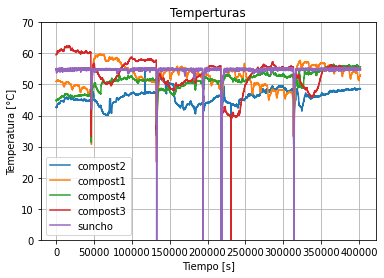

In [9]:
plt.figure("Temperaturas")
plt.title("Temperturas")
plt.plot(tiempos, temp_suncho, '-', markersize=1, label='compost2')
plt.plot(tiempos, temp_compost_1, '-', markersize=1, label='compost1')
plt.plot(tiempos, temp_compost_2, '-', markersize=1, label='compost4')
plt.plot(tiempos, temp_compost_3, '-', markersize=1, label='compost3')
plt.plot(tiempos, temp_compost_4, '-', markersize=1, label='suncho')
plt.legend()
plt.grid()
plt.ylim(0,70)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/{DATE}/figuras/Temperatura.png")
plt.show()

No handles with labels found to put in legend.


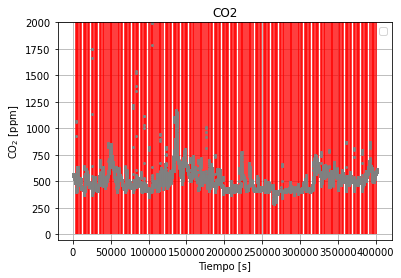

In [10]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", color="grey", markersize=4)
#plt.plot(tiempos, co2, "o", color="blue", label="TPS")
#plt.plot(tiempos, co2, "o", color="orange", label="Celulosa")
#plt.plot(tiempos, co2, "o", color="green", label=r"TPS/NP-$\mathrm{TiO_2}$")
#plt.plot(tiempos, co2, "o", color="red", label="Blanco")
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=5000, color="red")
plt.grid()
plt.legend()
plt.xlabel("Tiempo [s]")
plt.ylabel(r"$\mathrm{CO_2}$ [ppm]")

plt.ylim(-50,2000)
#plt.xlim(0,75000)

plt.savefig(f"{PATH}/{DATE}/figuras/CO2_completo.png")
plt.show()

# Integración

In [11]:
inicio = [] # Posición para empezar a medir el área
fin = []
for i in range(len(pos) - 1):
    if pos[i + 1] - pos[i] < 500:
        inicio.append(pos[i] + 60) # Dejamos 60 posiciones (5 minutos aprox) de espera
#        inicio.append(pos[i])
        fin.append(pos[i + 1])

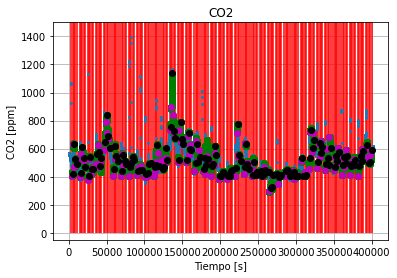

In [12]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", markersize=4)
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=3000, color="r")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")

#plt.xlim(175000,200000)
plt.ylim(-50,1500)
#plt.xlim(300000,400000)

plt.scatter(tiempos[inicio], co2[inicio], color="m", zorder=4) #marco el inicio de cada área en color magenta
plt.scatter(tiempos[fin], co2[fin], color="k", zorder=5) #marco el fin de cada área en color negro
for i in range(len(inicio)):
    plt.scatter(tiempos[inicio[i]:fin[i]], co2[inicio[i]:fin[i]], color="g", zorder=3)

plt.savefig(f"{PATH}/{DATE}/figuras/areas_pintadas.png")
plt.show()

In [13]:
#CALCULO UN VALOR PROMEDIO, Y SU ERROR
promedio=[]
promedio_std=[]
for i in range(len(inicio)):
    promedio.append(np.mean(co2[inicio[i]:fin[i]].astype(float)))
    promedio_std.append(np.std(co2[inicio[i]:fin[i]].astype(float)))

In [14]:
promedio1 = []
promedio2 = []
promedio3 = []
promedio4 = []

promedio_std1 = []
promedio_std2 = []
promedio_std3 = []
promedio_std4 = []

for i in range(int(len(promedio) / 4)):
    promedio1.append(promedio[4 * i])
    promedio2.append(promedio[4 * i + 1])
    promedio3.append(promedio[4 * i + 2])
    promedio4.append(promedio[4 * i + 3])
    
    promedio_std1.append(promedio_std[4 * i])
    promedio_std2.append(promedio_std[4 * i + 1])
    promedio_std3.append(promedio_std[4 * i + 2])
    promedio_std4.append(promedio_std[4 * i + 3])

a=np.transpose(np.array([np.arange(1,(int(len(promedio1)))+1,1),promedio1,promedio2,promedio3,promedio4]))
np.savetxt(f'{PATH}/{DATE}/figuras/promedio.csv', a, delimiter=', ', newline='\n', header='nro,promedio1,promedio2,promedio3,promedio4')

b=np.transpose(np.array([np.arange(1,(int(len(promedio_std1)))+1,1),promedio_std1,promedio_std2,promedio_std3,promedio_std4]))
np.savetxt(f'{PATH}/{DATE}/figuras/promedio_std.csv', b, delimiter=', ', newline='\n', header='nro,promedio_std1,promedio_std2,promedio_std3,promedio_std4')


In [15]:
promedio

[416.57894736842104,
 622.8623481781376,
 497.5182186234818,
 518.4696356275304,
 408.8137651821862,
 575.080971659919,
 557.506072874494,
 483.6072874493927,
 402.2914979757085,
 539.1012145748988,
 452.0080971659919,
 448.6194331983806,
 526.0566801619433,
 619.17004048583,
 469.085020242915,
 477.4817813765182,
 664.7368421052631,
 802.6356275303643,
 720.3238866396761,
 631.7085020242915,
 456.06477732793525,
 618.1174089068826,
 546.6963562753036,
 518.2834008097166,
 432.54655870445345,
 558.2267206477733,
 506.45344129554655,
 488.73279352226723,
 441.55465587044534,
 494.97165991902835,
 533.3765182186235,
 526.8623481781376,
 437.8987854251012,
 449.57894736842104,
 466.60323886639674,
 456.7570850202429,
 415.1497975708502,
 413.54655870445345,
 468.4655870445344,
 491.81781376518217,
 457.5182186234818,
 464.0769230769231,
 602.5182186234817,
 549.591093117409,
 476.21457489878543,
 468.4008097165992,
 550.7813765182186,
 535.2267206477733,
 762.6315789473684,
 982.700404858

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [17]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): # Meter el área
    return F * x * 44 / (den * 60)

In [ ]:
gramos(np.array(promedio))

In [ ]:
from datetime import datetime  
from datetime import timedelta  
  
#Add 1 day  
print(datetime.now() + timedelta(days=1))
  
#Subtract 60 seconds  
print (datetime.now() - timedelta(seconds=60)) 
  
#Add 2 years  
print (datetime.now() + timedelta(days=730) ) 
  
#Other Parameters you can pass in to timedelta:  
# days, seconds, microseconds,   
# milliseconds, minutes, hours, weeks  
  
#Pass multiple parameters (1 day and 5 minutes)  
print (datetime.now() + timedelta(days=1,minutes=5)  )

In [ ]:
DATE

In [ ]:
from datetime import date
date.fromisoformat(f'{DATE[0:10]}')

In [ ]:
datetime.time(f'{DATE[11:]}')

In [ ]:
DATE[11:].replace('"','\\' )

In [ ]:
replace(DATE[0:10],'"','\\"')